# Reinforce & Actor-Critic

## Importing modules and packages

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd

import module_Reinforce_ActorCritic as rac

## Reinforce

In [2]:
seeds = [42, 35, 254, 78, 91, 53, 22, 341, 117, 86]
episodes =500

### Load training details from csv

In [3]:
csv_name='reportFiles/reinforce.csv'

In [4]:
loaded_reinforce = pd.read_csv(csv_name, index_col='model_name')
display(loaded_reinforce)

,type_alg,hopper,n_episodes,trained_model,baseline,gamma,optim_lr,layer_size,save_every,random_state,returns,returns_AvgLast,returns_AvgBeginning,times,times_AvgLast,times_AvgBeginning,tot_time
model_name,,,,,,,,,,,,,,,,,
Reinforce_100_b0_hS_rs42_250528_23-48-57,0,S,100,NaN,0,0.99,0.001,64,75,42,[np.float64(12.971176556385156)],[np.float64(1.8640813160115919)],[np.float64(3.7281626320231847)],[0.007197856903076172],[np.float64(0.0028545411427815756)],[0.005709082285563152],0.547797
Reinforce_100_b0_hS_rs42_250528_23-50-02,0,S,100,NaN,0,0.99,0.001,64,75,42,[np.float64(12.971176556385156)],[np.float64(1.8640813160115919)],[np.float64(3.7281626320231847)],[0.00842595100402832],[np.float64(0.0035107994079589845)],[0.007021598815917966],0.673093
Reinforce_100_b100_hS_rs42_250528_23-50-02,0,S,100,NaN,100,0.99,0.001,64,75,42,[np.float64(9.451880411972564)],[np.float64(7.010564837243589)],[np.float64(14.021129674487176)],[0.022516727447509766],[np.float64(0.005759936968485514)],[0.01151987393697103],1.187745
Reinforce_100_b250_hS_rs42_250528_23-50-03,0,S,100,NaN,250,0.99,0.001,64,75,42,[np.float64(5.623177909402488)],[np.float64(4.714179449324146)],[np.float64(9.42835889864829)],[0.004372596740722656],[np.float64(0.0035147492090861)],[0.007029498418172202],0.713469
Reinforce_100_b0_hS_rs35_250528_23-50-04,0,S,100,NaN,0,0.99,0.001,64,75,35,[np.float64(14.52552455948101)],[np.float64(3.817939823103213)],[np.float64(7.635879646206428)],[0.013810873031616211],[np.float64(0.00651580015818278)],[0.013031600316365565],1.334311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reinforce_50000_b20_hS_rs117_250531_19-28-23,0,S,50000,NaN,20,0.99,0.001,64,75,117,"[6.754736269801503, 5.240355882548177, 2.28652...","[4.406650441308719, 8.094915993447765, 7.96288...","[8.81330088261744, 8.094915993447774, 8.246355...","[0.004128456115722656, 0.0027060508728027344, ...","[0.0020571025212605793, 0.003941152890523275, ...","[0.004114205042521159, 0.003941152890523275, 0...",714.596055
Reinforce_50000_b50_hS_rs117_250531_19-40-18,0,S,50000,NaN,50,0.99,0.001,64,75,117,"[5.703831834248161, 8.884767109061391, 12.5600...","[5.264962554451855, 11.055883154278584, 10.743...","[10.529925108903713, 11.055883154278588, 10.67...","[0.004235029220581055, 0.0042400360107421875, ...","[0.002128756841023763, 0.004428904851277669, 0...","[0.004257513682047526, 0.0044289048512776725, ...",774.416593
Reinforce_50000_b10_hS_rs86_250531_19-53-12,0,S,50000,NaN,10,0.99,0.001,64,75,86,"[3.877951276293658, 5.3024396442734325, 9.5653...","[2.3848562611390087, 5.370863293856637, 6.0229...","[4.769712522278016, 5.370863293856634, 5.60518...","[0.0018379688262939453, 0.0021800994873046875,...","[0.001375287373860677, 0.002612144152323405, 0...","[0.0027505747477213544, 0.002612144152323404, ...",758.574873


### Plot training returns - Different baselines

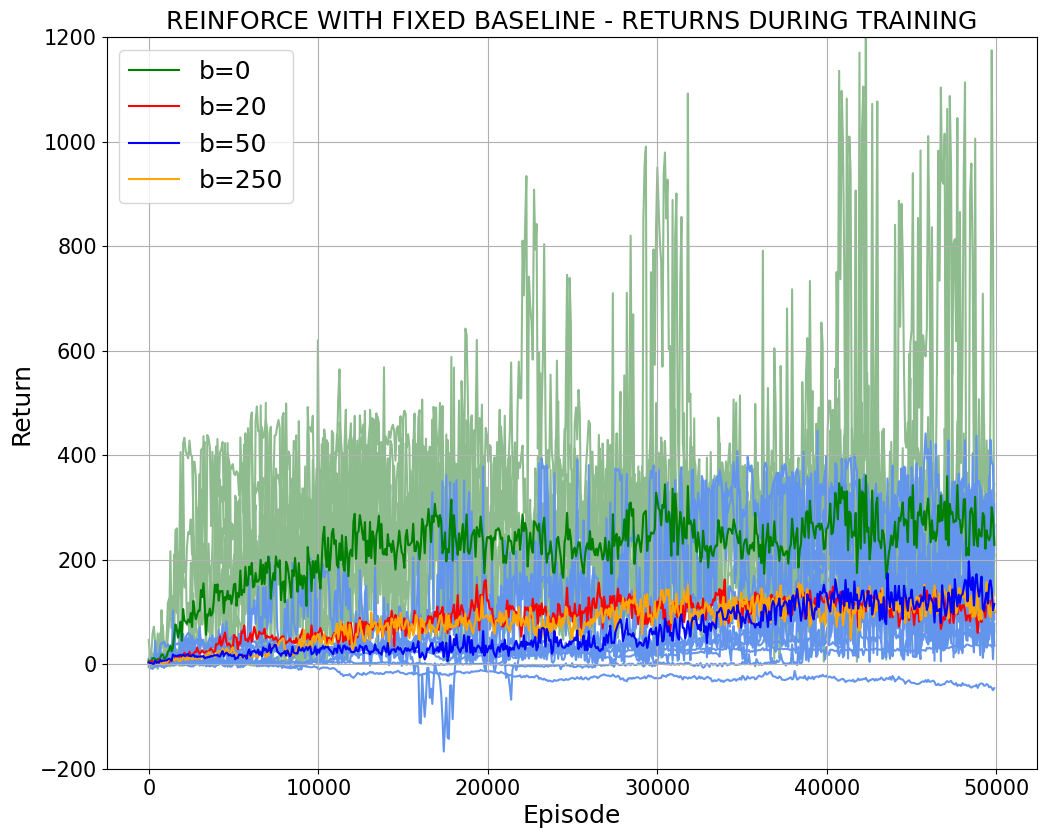

In [ ]:
n_episodes=50000
baselines=[0, 20, 50, 250]
save_every=75

colors=['darkseagreen','plum','cornflowerblue','cornflowerblue','plum']
colors_dark=['green','red','blue','orange','darkviolet','orange']

plt.figure(figsize=(12,9.5))
plt.title('REINFORCE WITH FIXED BASELINE - RETURNS DURING TRAINING', fontsize=18)
for b in range(len(baselines)):
    avg_baseline=np.zeros((666,))
    sub_df = loaded_reinforce[(loaded_reinforce['n_episodes']==n_episodes) & (loaded_reinforce['baseline']==baselines[b])]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['returns']))
        avg_baseline+=return_array
        if baselines[b]==0 or baselines[b]==50:
            line_b0 = plt.plot(np.arange(len(return_array))*save_every, return_array, c=colors[b], zorder=0,label='_nolegend_')
    if baselines[b]==50: z=3
    else: z=2
    line_b0 = plt.plot(np.arange(len(avg_baseline))*save_every, avg_baseline/len(sub_df), c=colors_dark[b], zorder=z, label=f'b={baselines[b]}')
ax = plt.gca()
ax.set_ylim([-200, 1200])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
#plt.savefig('plots/Reinforce_FixedBaselines.png', dpi=300)
plt.show()


### Plot training times - Baselines b=0 and b=50

In [6]:
n_episodes=50000
save_every=75
sub_df_b0 = loaded_reinforce[(loaded_reinforce['n_episodes']==n_episodes) & (loaded_reinforce['baseline']==0)]
sub_df_b50 = loaded_reinforce[(loaded_reinforce['n_episodes']==n_episodes) & (loaded_reinforce['baseline']==50)]
dfs=[sub_df_b0,sub_df_b50]
mod_names=['Reinforce baseline 0', 'Reinforce baseline 50']
baselines=[0,50]

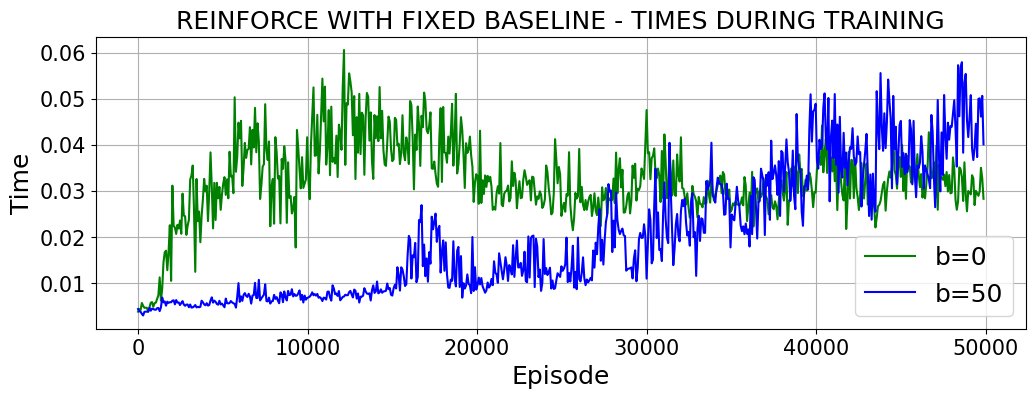

In [ ]:
colors=['darkseagreen','mistyrose','plum','cornflowerblue','cornflowerblue','plum'] #thistle']
colors_dark=['green','blue','blue','orange','darkviolet','orange']

plt.figure(figsize=(12,3.5))
plt.tight_layout()
plt.title('REINFORCE WITH FIXED BASELINE - TIMES DURING TRAINING', fontsize=18)
for b, df in enumerate(dfs):
    avg_time=np.zeros((666,))
    for index, row in df.iterrows():
        time_array = np.array(eval(row['times']))
        time_array[time_array < 0] = 0
        avg_time+=time_array
    if baselines[b]==50: z=3
    else: z=2
    line_b0 = plt.plot(np.arange(len(avg_time))*save_every, avg_time/len(df), c=colors_dark[b], zorder=z, label=f'b={baselines[b]}')
ax = plt.gca()
#ax.set_ylim([0, 0.1])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('plots/Reinforce_FixedBaselines_times.png', dpi=300)
plt.show()


### Test - Baselines b=0 and b=50

Average metrics over 10 seeds

In [8]:
means=[]
stds=[]
for i, df in enumerate(dfs):
    tot_returns=[]
    for index, row in df.iterrows():
        model_name=index+'.mdl'
        print(model_name)
        random_seed = row['random_state']
        returns = rac.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, random_state=random_seed, device='cpu')
        tot_returns.append(returns)
    means.append(np.array(tot_returns).mean())
    stds.append(np.array(tot_returns).std(axis=1).mean())
print(type(returns))

Reinforce_50000_b0_hS_rs42_250529_07-31-19.mdl
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 205.8559759195592
Episode: 1 | Return: 207.10484463937016
Episode: 2 | Return: 291.04149469651355
Episode: 3 | Return: 303.451894147447
Episode: 4 | Return: 259.74915779842047
Episode: 5 | Return: 259.8167821438943
Episode: 6 | Return: 220.67085899140736
Episode: 7 | Return: 251.59315723009473
Episode: 8 | Return: 318.72053860994174
Episode: 9 | Return: 299.62320029683633
Episode: 10 | Return: 174.835160571227
Episode: 11 | Return: 334.02552811015084
Episode: 12 | Return: 202.1501457971136
Episode: 13 | Return: 288.12113373594286
Episode: 14 | Return: 242.29491944373652
Episode: 15 | Return: 426.77658319652403
Episode: 16 | Return: 165.11779337737144
Episode:

In [9]:
for i, df in enumerate(dfs):
    print(mod_names[i])
    print('Mean:', means[i])
    print('Std:', stds[i])
    print()

Reinforce baseline 0
Mean: 288.57008477828794
Std: 77.97903018917087

Reinforce baseline 50
Mean: 131.8794734068859
Std: 41.81030253743474



## Actor-Critic

### Load training details from csvs

In [10]:
csv_alpha05 = 'reportFiles/actorcritic_alpha0.5.csv'
csv_alpha025 = 'reportFiles/actorcritic_alpha0.25.csv'
csv_alpha075 = 'reportFiles/actorcritic_alpha0.75.csv'

loaded_alpha05 = pd.read_csv(csv_alpha05, index_col='model_name')
loaded_alpha025 = pd.read_csv(csv_alpha025, index_col='model_name')
loaded_alpha075 = pd.read_csv(csv_alpha075, index_col='model_name')

csvs=[loaded_alpha025, loaded_alpha05, loaded_alpha075]

### Plot training returns - Different alphas

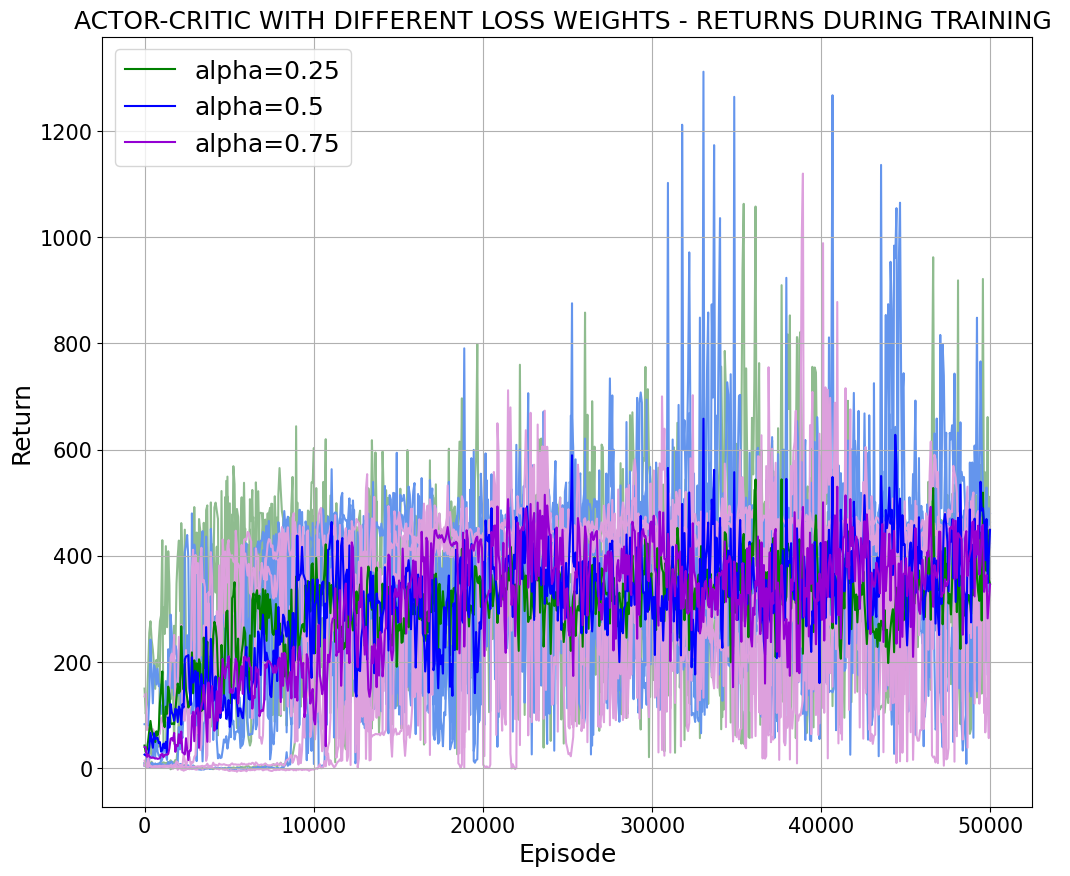

In [11]:
n_episodes=50_000
save_every= 70

type_names=['alpha=0.25','alpha=0.5', 'alpha=0.75']
colors=['darkseagreen','cornflowerblue','plum','darkseagreen','cornflowerblue','plum']
colors_dark=['green','blue','darkviolet','red','cyan','orange']

plt.figure(figsize=(12,10))
plt.title('ACTOR-CRITIC WITH DIFFERENT LOSS WEIGHTS - RETURNS DURING TRAINING ', fontsize=18)
for n_csv in range(len(csvs)):
    avg_type=np.zeros((715,))
    df = csvs[n_csv]
    sub_df = df[(df['n_episodes']==n_episodes)]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['returns']))[0::7]
        avg_type+=return_array
        line = plt.plot(np.arange(len(return_array))*save_every, return_array, c=colors[n_csv], zorder=0,label='_nolegend_')
    line = plt.plot(np.arange(len(avg_type))*save_every, avg_type/len(sub_df), c=colors_dark[n_csv], zorder=2, label=type_names[n_csv])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
#plt.savefig('plots/actorcritic2_alpha_comparison_se70_onlyMean.png', dpi=300, bbox_inches='tight')
plt.show()


### Plot training times - Different alphas

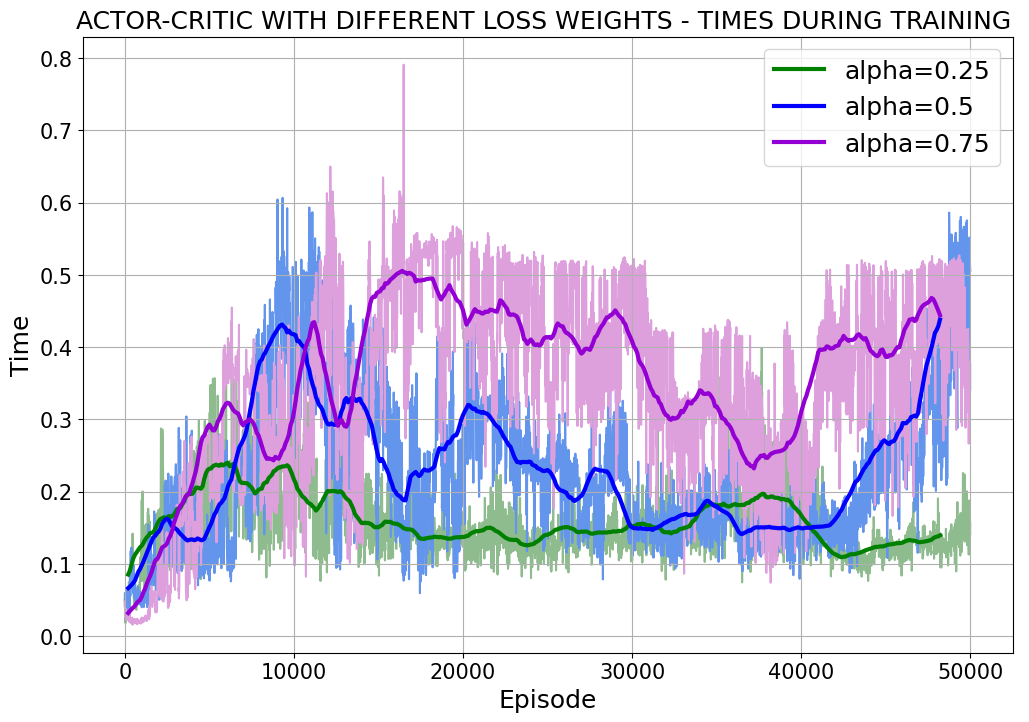

In [12]:
plt.figure(figsize=(12,8))
plt.title('ACTOR-CRITIC WITH DIFFERENT LOSS WEIGHTS - TIMES DURING TRAINING ', fontsize=18)
for n_csv in range(len(csvs)):
    avg_type=np.zeros((5000,))
    avg_time=np.zeros((481,))
    df = csvs[n_csv]
    sub_df = df[(df['n_episodes']==n_episodes)]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['times'])).reshape(-1,10).mean(axis=1)
        moving_avg = (np.convolve(return_array, np.ones(20), 'valid') / 20)
        return_array = np.array(eval(row['times']))
        #times_array = np.array(eval(row['times_AvgLast']))[0::2]#.reshape(7,-1).mean(axis=0)
        avg_type+=return_array
        avg_time+=moving_avg
        #line = plt.plot(np.arange(len(return_array))*save_every, return_array, c=colors[n_csv], zorder=0,label='_nolegend_')
    line = plt.plot(np.arange(len(avg_type))*10, avg_type/len(sub_df), c=colors[n_csv], zorder=0, label='_nolegend_')
    line = plt.plot(np.arange(len(avg_time))*100+200, avg_time/len(sub_df), c=colors_dark[n_csv], zorder=2, label=type_names[n_csv], linewidth=3)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
#plt.savefig('plots/actorcritic2_alpha_comparison_onlyMean_times.png', dpi=300, bbox_inches='tight')
plt.show()

### Test

#### $\alpha=0.25$

In [13]:
random_states = loaded_alpha025['random_state'].tolist()
model_names = loaded_alpha025.index.tolist()
returns = []

for i, model_name in enumerate(model_names):
    print(f"Testing model {i+1}/{len(model_names)}: {model_name}")
    returns.append(rac.test(type_alg=2, model=model_name+'.mdl', hopper='S', n_episodes=50, random_state=random_states[i], render=False))

mean_returns = np.mean(returns)
std_returns = np.std(returns, axis=1).mean()

#with open("Alpha025.txt", "a") as f:
#  f.write(f"\nMean Returns: {mean_returns}")
#  f.write(f"\nStd: {std_returns}")

print("Mean Returns:", mean_returns)
print("Std:", std_returns)

Testing model 1/4: ActorCritic2_50000_b0_hS_rs35_250620_15-47-59
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 346.96164903470606
Episode: 1 | Return: 353.5745289330403
Episode: 2 | Return: 349.43636576663
Episode: 3 | Return: 357.180067000945
Episode: 4 | Return: 349.4691696989275
Episode: 5 | Return: 349.16413756716105
Episode: 6 | Return: 351.09482358864256
Episode: 7 | Return: 339.98931219448866
Episode: 8 | Return: 345.24315064591514
Episode: 9 | Return: 352.795597116499
Episode: 10 | Return: 355.1146518269237
Episode: 11 | Return: 357.7723967476
Episode: 12 | Return: 356.98573998026416
Episode: 13 | Return: 346.68692214443433
Episode: 14 | Return: 349.3256804272807
Episode: 15 | Return: 342.7661112009538
Episode: 16 | Return: 350.5535656668492


#### $\alpha=0.5$

In [14]:
random_states = loaded_alpha05['random_state'].tolist()
model_names = loaded_alpha05.index.tolist()
returns = []

for i, model_name in enumerate(model_names):
    print(f"Testing model {i+1}/{len(model_names)}: {model_name}")
    returns.append(rac.test(type_alg=2, model=model_name+'.mdl', hopper='S', n_episodes=50, random_state=random_states[i], render=False))

mean_returns = np.mean(returns) #, axis=0) 
std_returns = np.std(returns, axis=1).mean()

#with open("Alpha05.txt", "a") as f:
#  f.write(f"\nMean Returns: {mean_returns}")
#  f.write(f"\nStd: {std_returns}")

print("Mean Returns:", mean_returns)
print("Std:", std_returns)

Testing model 1/4: ActorCritic2_50000_b0_hS_rs35_250621_00-39-57
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 365.74575307485725
Episode: 1 | Return: 417.45374774859533
Episode: 2 | Return: 363.17723982112835
Episode: 3 | Return: 347.00152333542366
Episode: 4 | Return: 363.42218059694335
Episode: 5 | Return: 383.97234242659414
Episode: 6 | Return: 406.98916154554286
Episode: 7 | Return: 360.46177282851943
Episode: 8 | Return: 381.24296323282283
Episode: 9 | Return: 389.03675959995917
Episode: 10 | Return: 378.8607889685977
Episode: 11 | Return: 336.4789319970245
Episode: 12 | Return: 367.6194134822785
Episode: 13 | Return: 366.22994814837523
Episode: 14 | Return: 397.87588834372536
Episode: 15 | Return: 356.6348280815117
Episode: 16 | Return: 381.57

#### $\alpha=0.75$

In [16]:
random_states = loaded_alpha075['random_state'].tolist()
model_names = loaded_alpha075.index.tolist()
returns = []

for i, model_name in enumerate(model_names):
    print(f"Testing model {i+1}/{len(model_names)}: {model_name}")
    returns.append(rac.test(type_alg=2, model=model_name+'.mdl', hopper='S', n_episodes=50, random_state=random_states[i], render=False))

mean_returns = np.mean(returns)#, axis=0) 
std_returns = np.std(returns, axis=1).mean()

#with open("Alpha075.txt", "a") as f:
#    f.write(f"\nMean Returns: {mean_returns}")
#    f.write(f"\nStd: {std_returns}")

print("Mean Returns:", mean_returns)
print("Std:", std_returns)

Testing model 1/4: ActorCritic2_50000_b0_hS_rs35_250621_13-31-03
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 431.6280924664526
Episode: 1 | Return: 434.50875952464764
Episode: 2 | Return: 433.1826443828129
Episode: 3 | Return: 440.5880334141216
Episode: 4 | Return: 439.4454302549952
Episode: 5 | Return: 441.78331476766976
Episode: 6 | Return: 429.9642009318802
Episode: 7 | Return: 439.4799100267435
Episode: 8 | Return: 429.95034187825945
Episode: 9 | Return: 432.46422607105313
Episode: 10 | Return: 435.0281875231782
Episode: 11 | Return: 431.09901122449185
Episode: 12 | Return: 428.823841305146
Episode: 13 | Return: 421.2850695959739
Episode: 14 | Return: 428.80489060677877
Episode: 15 | Return: 435.27127225883123
Episode: 16 | Return: 428.10263151

## Comparison with reinforce

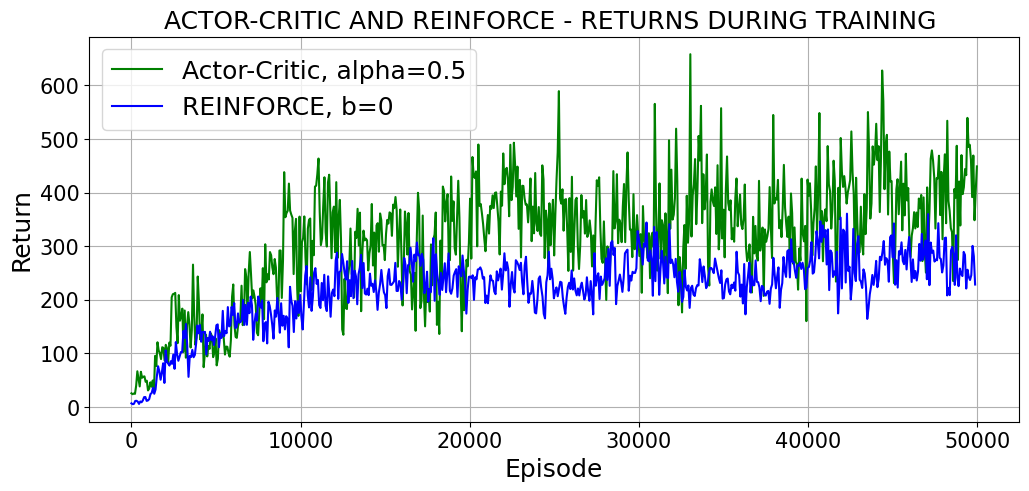

In [18]:
n_episodes=50_000
csvs=[loaded_alpha05]
save_every_ac= 70
baselines=[0] #0, 10, 20, 50, 100, 250
save_every_r=75

type_names=['alpha=0.25','alpha=0.5', 'alpha=0.75']
colors=['darkseagreen','cornflowerblue','plum','darkseagreen','cornflowerblue','plum'] #darkseagreen, cornflowerblue
colors_dark=['green','blue','darkviolet','red','cyan','orange']

plt.figure(figsize=(12,5))
plt.title('ACTOR-CRITIC AND REINFORCE - RETURNS DURING TRAINING ', fontsize=18)
for n_csv in range(len(csvs)):
    avg_type=np.zeros((715,))
    df = csvs[n_csv]
    sub_df = df[(df['n_episodes']==n_episodes)]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['returns']))[0::7]
        avg_type+=return_array
    line = plt.plot(np.arange(len(avg_type))*save_every_ac, avg_type/len(sub_df), c=colors_dark[n_csv], zorder=3, label='Actor-Critic, alpha=0.5')
for b in range(len(baselines)):
    avg_baseline=np.zeros((666,))
    sub_df = loaded_reinforce[(loaded_reinforce['n_episodes']==n_episodes) & (loaded_reinforce['baseline']==baselines[b])]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['returns']))
        avg_baseline+=return_array
    line_b0 = plt.plot(np.arange(len(avg_baseline))*save_every_r, avg_baseline/len(sub_df), c=colors_dark[b+1], zorder=3, label=f'REINFORCE, b=0')
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
#plt.savefig('plots/actorcriticVSreinforce_onlyMean.png', dpi=300, bbox_inches='tight')
plt.show()

## Appendix

### Actor-critic trainings with different alphas

#### $\alpha=0.1$

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


 20%|██        | 10002/50000 [04:34<37:43, 17.67it/s] 

Training episode: 10000
Episode return: 21.581861129155573


 40%|████      | 20000/50000 [40:04<3:14:11,  2.57it/s]

Training episode: 20000
Episode return: 380.3098160599583


 60%|██████    | 30001/50000 [1:14:53<49:02,  6.80it/s]  

Training episode: 30000
Episode return: 74.13808343528927


 80%|████████  | 40001/50000 [1:47:52<24:51,  6.70it/s]  

Training episode: 40000
Episode return: 435.3415776002317


100%|██████████| 50000/50000 [2:10:43<00:00,  6.37it/s]

Training episode: 50000
Episode return: 506.463236024461
Average of the last 150 returns: 394.1227352674374

MODEL NAME: ActorCritic2_50000_b0_hS_rs42_250618_14-31-22.mdl



(array([[-2.70740799e+00,  3.47673163e-01,  5.52474814e-01, ...,
          4.70646927e+02,  3.30495919e+02,  8.89801031e+01],
        [-1.08956378e+00, -1.53346153e+00, -2.12123636e-01, ...,
          4.49739099e+02,  4.42919143e+02,  3.94122735e+02],
        [-2.17912756e+00, -1.53346153e+00, -8.67791609e-01, ...,
          2.16275350e+02,  2.16587234e+02,  2.16809427e+02]]),
 array([[0.01543164, 0.03285241, 0.00952816, ..., 0.19469714, 0.13536048,
         0.05095053],
        [0.01001847, 0.01827455, 0.01638263, ..., 0.19780598, 0.19609468,
         0.16800035],
        [0.02003695, 0.01827455, 0.01760073, ..., 0.15610049, 0.15614474,
         0.15613623]]),
 7843.453293561935,
 'ActorCritic2_50000_b0_hS_rs42_250618_14-31-22.mdl')

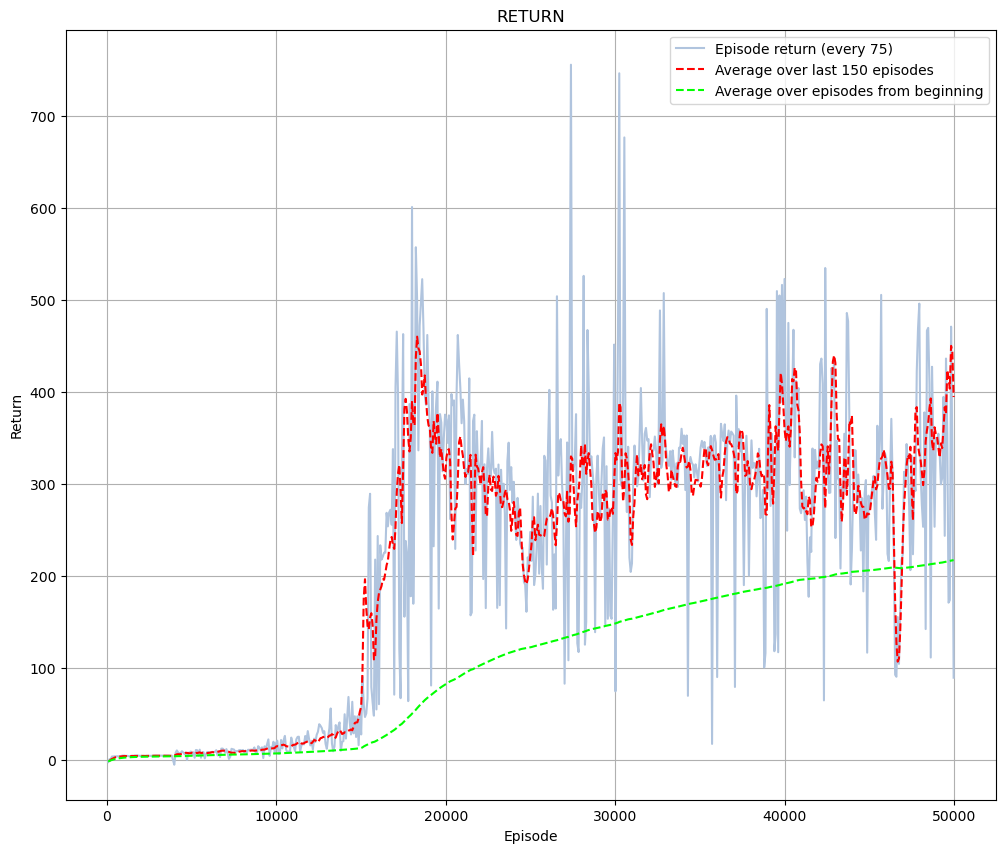

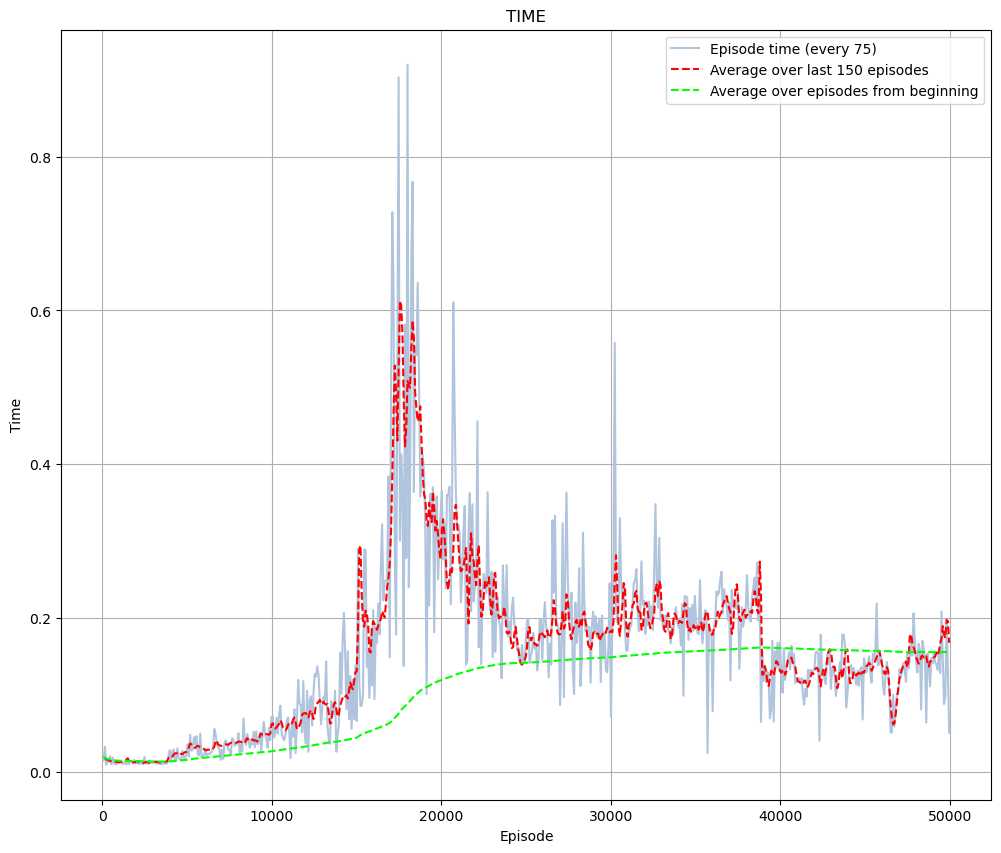

In [ ]:
rac.train(type_alg=2,
        hopper='S',
        n_episodes=50000,
        csv_name='actorcritic_alpha0.1.csv', 
        print_every=10000,
        optim_lr=1e-4,
        alpha=0.1,
        plot=True,
        random_state=42,
        )

**Test on 50 episodes**

In [ ]:
model =  'ActorCritic2_50000_b0_hS_rs42_250618_14-31-22.mdl'

test_returns= rac.test(type_alg=2,
                hopper='S',
                n_episodes=50,
                model=model,
                random_state=42) 
mean_return = np.mean(test_returns)
std_return = np.std(test_returns)
print(f'Mean return: {mean_return:.3f} ± {std_return:.3f}')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 306.27160531644626
Episode: 1 | Return: 675.7636860633527
Episode: 2 | Return: 410.39237325557707
Episode: 3 | Return: 436.57420206795206
Episode: 4 | Return: 447.9974564347418
Episode: 5 | Return: 418.5412141594993
Episode: 6 | Return: 514.175132365351
Episode: 7 | Return: 520.0108491397932
Episode: 8 | Return: 76.3268503063577
Episode: 9 | Return: 340.1165825947542
Episode: 10 | Return: 109.14346039248281
Episode: 11 | Return: 135.87850243602813
Episode: 12 | Return: 157.47820946301786
Episode: 13 | Return: 75.0473693177702
Episode: 14 | Return: 515.5279962308763
Episode: 15 | Return: 406.27610460098435
Episode: 16 | Return: 509.90810278301853
Episode: 17 | Return: 315.9411366910094
Episode: 18 | Return

#### $\alpha=0.25$

Creation of new CSV file actorcritic_alpha0.25.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  0%|          | 0/50000 [00:00<?, ?it/s]

 20%|██        | 10001/50000 [06:33<1:40:28,  6.63it/s]

Training episode: 10000
Episode return: 121.82206488291821


 40%|████      | 20001/50000 [42:14<58:50,  8.50it/s]  

Training episode: 20000
Episode return: 156.74450934468607


 60%|██████    | 30001/50000 [1:04:19<46:46,  7.13it/s]  

Training episode: 30000
Episode return: 349.3403031686068


 80%|████████  | 40001/50000 [1:28:05<25:48,  6.46it/s]

Training episode: 40000
Episode return: 411.0961778099211


100%|██████████| 50000/50000 [1:55:21<00:00,  7.22it/s]

Training episode: 50000
Episode return: 458.14580012345345
Average of the last 150 returns: 392.55986626247045

MODEL NAME: ActorCritic2_50000_b0_hS_rs42_250618_16-48-24.mdl



(array([[ -1.00979745,  -1.18481743,  -2.49871157, ..., 229.0381666 ,
         174.15628258, 250.05192755],
        [ -1.0256617 ,  -1.91169901,  -1.65042903, ..., 351.07888887,
         345.38626088, 392.55986626],
        [ -2.0513234 ,  -1.91169901,  -1.78406049, ..., 269.993153  ,
         270.11695506, 270.36122121]]),
 array([[0.01409554, 0.00956774, 0.00983715, ..., 0.10237312, 0.08711243,
         0.12635922],
        [0.0057292 , 0.01120656, 0.01089677, ..., 0.13692808, 0.13558841,
         0.15050742],
        [0.01145841, 0.01120656, 0.01108398, ..., 0.13773383, 0.13773423,
         0.13777219]]),
 6921.0993621349335,
 'ActorCritic2_50000_b0_hS_rs42_250618_16-48-24.mdl')

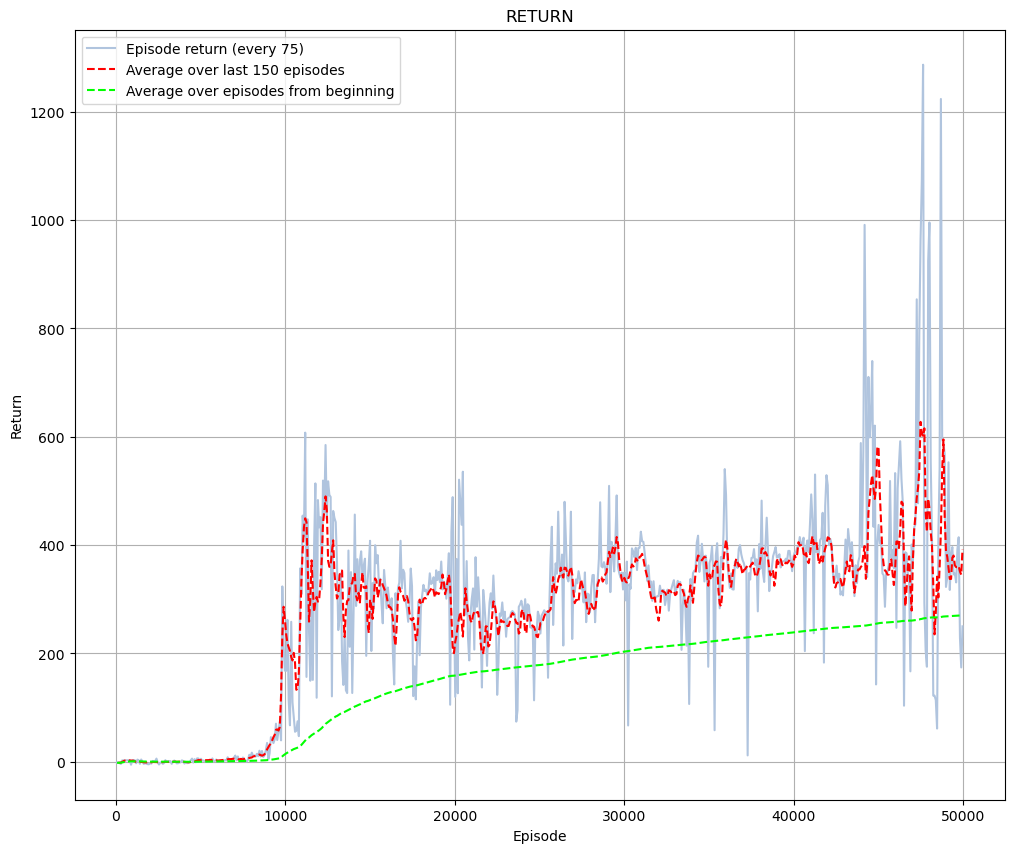

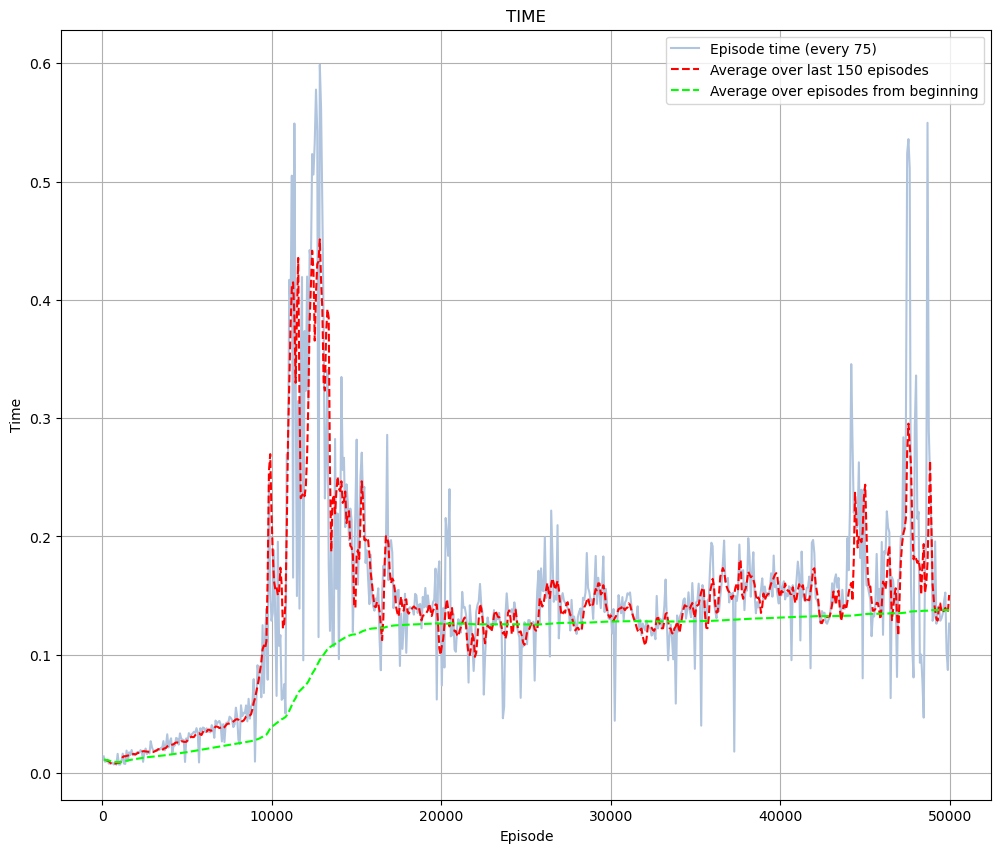

In [ ]:
rac.train(type_alg=2,
        hopper='S',
        n_episodes=50000,
        csv_name='actorcritic_alpha0.25.csv', 
        print_every=10000,
        optim_lr=1e-4,
        alpha=0.25,
        plot=True,
        random_state=42,
        )

**Test on 50 episodes**

In [ ]:
model = 'ActorCritic2_50000_b0_hS_rs42_250618_16-48-24.mdl'

test_returns= rac.test(type_alg=2,
                hopper='S',
                n_episodes=50,
                model=model,
                random_state=42) 
mean_return = np.mean(test_returns)
std_return = np.std(test_returns)
print(f'Mean return: {mean_return:.3f} ± {std_return:.3f}')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 491.92207647998197
Episode: 1 | Return: 217.23542187784392
Episode: 2 | Return: 610.3405313447826
Episode: 3 | Return: 513.7436387292752
Episode: 4 | Return: 560.0694557587427
Episode: 5 | Return: 223.37633247361046
Episode: 6 | Return: 493.4172206951329
Episode: 7 | Return: 294.15916361784235
Episode: 8 | Return: 182.8442794731521
Episode: 9 | Return: 215.4673135148162
Episode: 10 | Return: 256.8472540428153
Episode: 11 | Return: 543.4163155903703
Episode: 12 | Return: 239.10883396350943
Episode: 13 | Return: 585.701102120123
Episode: 14 | Return: 309.7465933809921
Episode: 15 | Return: 501.8963535180334
Episode: 16 | Return: 204.65721611723455
Episode: 17 | Return: 581.5636193711523
Episode: 18 | Return

#### $\alpha=0.5$

Creation of new CSV file actorcritic_alpha0.5.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


 20%|██        | 10002/50000 [04:27<33:39, 19.81it/s]

Training episode: 10000
Episode return: 9.06002373451227


 40%|████      | 20000/50000 [1:15:39<4:23:21,  1.90it/s]

Training episode: 20000
Episode return: 466.44479434707375


 60%|██████    | 30001/50000 [1:46:24<57:48,  5.77it/s]  

Training episode: 30000
Episode return: 682.3978238018931


 80%|████████  | 40001/50000 [2:09:50<24:22,  6.84it/s]  

Training episode: 40000
Episode return: 353.64897407690256


100%|██████████| 50000/50000 [2:32:14<00:00,  5.47it/s]


Training episode: 50000
Episode return: 366.3239704998504
Average of the last 150 returns: 355.14153723169824

MODEL NAME: ActorCritic2_50000_b0_hS_rs42_250618_18-46-08.mdl



(array([[-1.01029516e+00, -2.37389151e+00,  2.08718047e-01, ...,
          4.22419493e+02,  4.11476684e+02,  3.66183907e+02],
        [-9.18208633e-01, -2.01029287e+00, -1.41727605e+00, ...,
          4.08068456e+02,  3.89867955e+02,  3.55141537e+02],
        [-1.83641727e+00, -2.01029287e+00, -1.55698979e+00, ...,
          2.70328231e+02,  2.70478702e+02,  2.70582926e+02]]),
 array([[0.00911832, 0.01000309, 0.00713825, ..., 0.15907574, 0.15007567,
         0.14038682],
        [0.00557774, 0.0109617 , 0.00970731, ..., 0.15147875, 0.14352123,
         0.13534421],
        [0.01115548, 0.0109617 , 0.01019004, ..., 0.18226339, 0.1821974 ,
         0.18212249]]),
 9134.836290359497,
 'ActorCritic2_50000_b0_hS_rs42_250618_18-46-08.mdl')

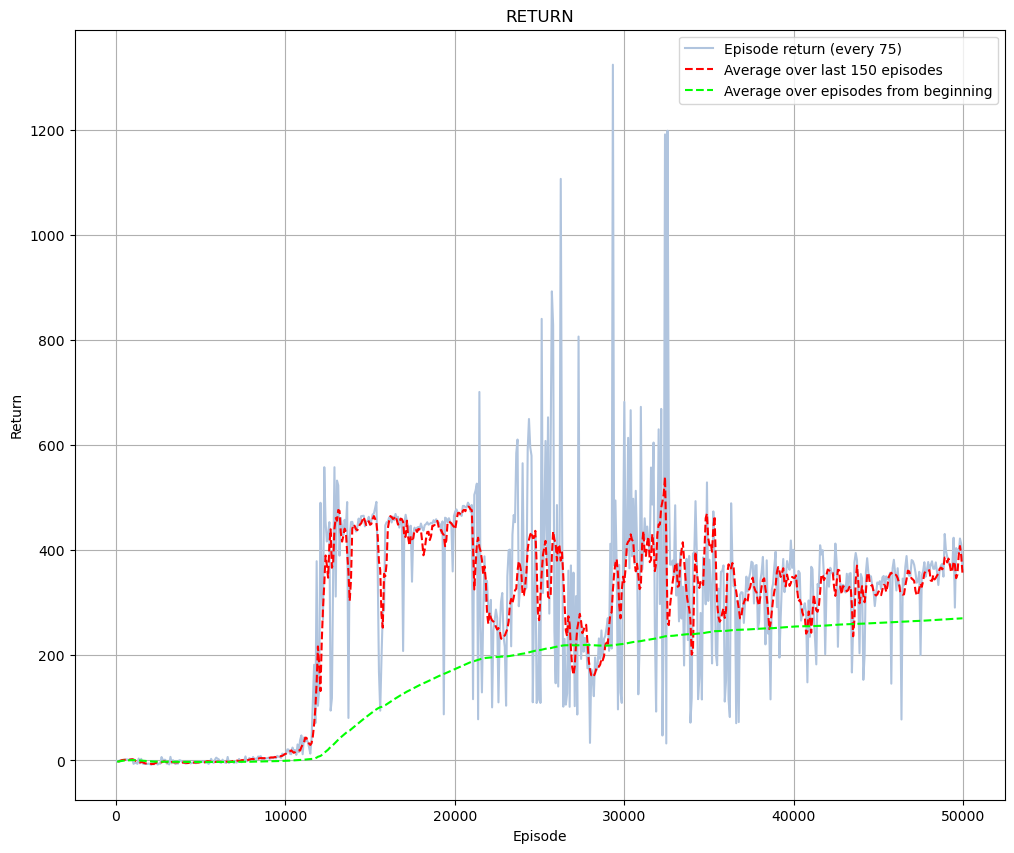

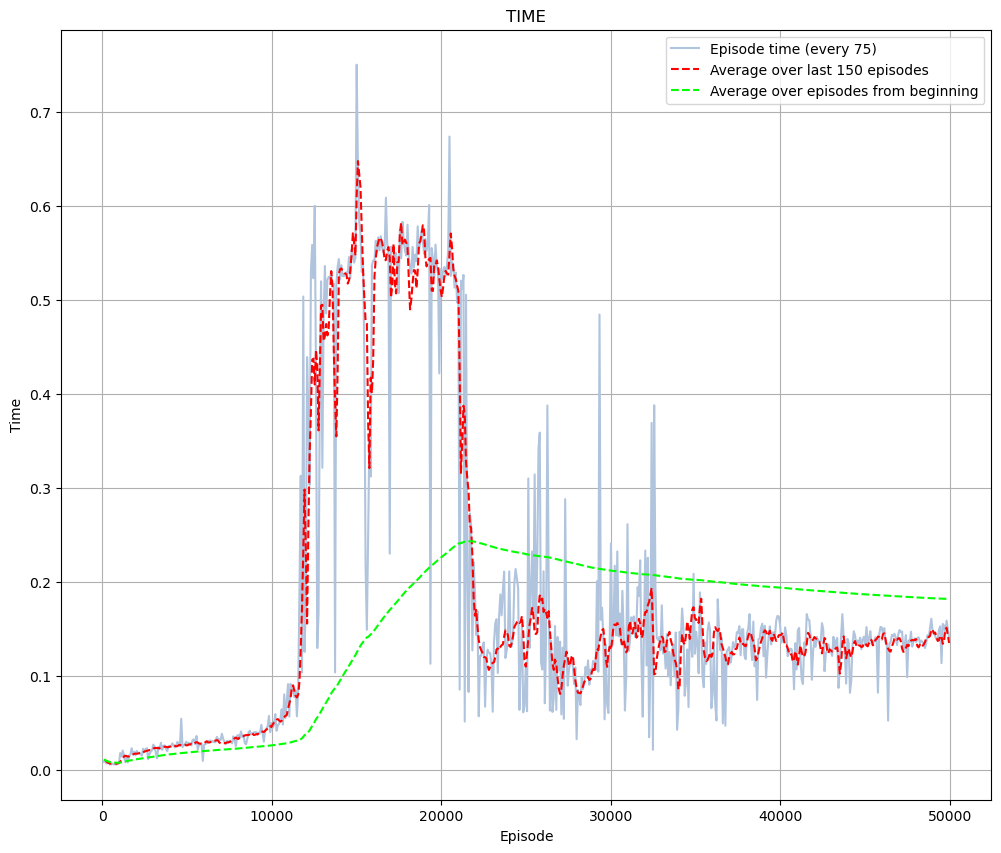

In [ ]:
rac.train(type_alg=2,
        hopper='S',
        n_episodes=50000,
        csv_name='actorcritic_alpha0.5.csv', 
        print_every=10000,
        optim_lr=1e-4,
        alpha=0.5,
        plot=True,
        random_state=42,
        )

**Test on 50 episodes**

In [ ]:
model =  'ActorCritic2_50000_b0_hS_rs42_250618_18-46-08.mdl'

test_returns= rac.test(type_alg=2,
                hopper='S',
                n_episodes=50,
                model=model,
                random_state=42) 
mean_return = np.mean(test_returns)
std_return = np.std(test_returns)
print(f'Mean return: {mean_return:.3f} ± {std_return:.3f}')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 376.9436759928926
Episode: 1 | Return: 381.57788363159017
Episode: 2 | Return: 378.42585635498176
Episode: 3 | Return: 375.35444294861736
Episode: 4 | Return: 385.7716252388413
Episode: 5 | Return: 376.69716816506116
Episode: 6 | Return: 375.5059484111976
Episode: 7 | Return: 380.83696622547734
Episode: 8 | Return: 376.379992690974
Episode: 9 | Return: 357.6128929193479
Episode: 10 | Return: 365.5186800665851
Episode: 11 | Return: 377.46833631205556
Episode: 12 | Return: 381.74758383153045
Episode: 13 | Return: 386.0980998249904
Episode: 14 | Return: 371.5380767045615
Episode: 15 | Return: 371.82686491303565
Episode: 16 | Return: 406.2693081707691
Episode: 17 | Return: 388.3667342762387
Episode: 18 | Retu

#### $\alpha=0.75$

Creation of new CSV file actorcritic_alpha0.75.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  0%|          | 0/50000 [00:00<?, ?it/s]

 20%|██        | 10003/50000 [02:58<20:12, 32.99it/s]

Training episode: 10000
Episode return: -4.566397269129478


 40%|████      | 20000/50000 [42:00<3:08:01,  2.66it/s]

Training episode: 20000
Episode return: 463.0601779529956


 60%|██████    | 30001/50000 [1:49:05<58:14,  5.72it/s]  

Training episode: 30000
Episode return: 258.3795679177394


 80%|████████  | 40000/50000 [2:21:38<1:25:08,  1.96it/s]

Training episode: 40000
Episode return: 488.03061086318655


100%|██████████| 50000/50000 [3:28:49<00:00,  3.99it/s]  

Training episode: 50000
Episode return: 485.07696439341976
Average of the last 150 returns: 486.42050972503375

MODEL NAME: ActorCritic2_50000_b0_hS_rs42_250618_21-19-09.mdl



(array([[-1.42706502e+00,  3.42140541e-01,  4.63528393e-01, ...,
          5.06913181e+02,  4.91742563e+02,  4.66334266e+02],
        [-1.04182136e+00, -1.31690417e+00, -1.47133585e-01, ...,
          4.76839488e+02,  4.85144494e+02,  4.86420510e+02],
        [-2.08364271e+00, -1.31690417e+00, -7.92636628e-01, ...,
          2.53775880e+02,  2.54140500e+02,  2.54474513e+02]]),
 array([[0.0109911 , 0.00640559, 0.00594616, ..., 0.50192475, 0.51419377,
         0.52122879],
        [0.00538118, 0.00946724, 0.00750242, ..., 0.49962905, 0.50075602,
         0.50961756],
        [0.01076237, 0.00946724, 0.00858907, ..., 0.24892111, 0.24930718,
         0.24970398]]),
 12529.384969472885,
 'ActorCritic2_50000_b0_hS_rs42_250618_21-19-09.mdl')

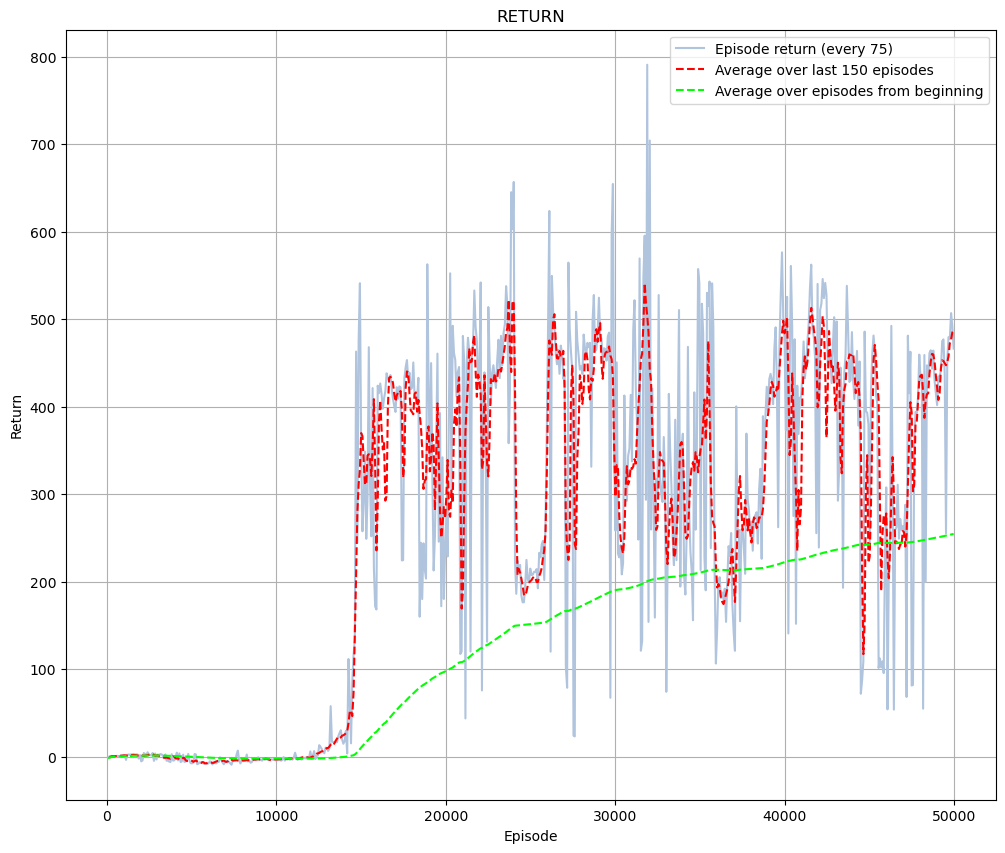

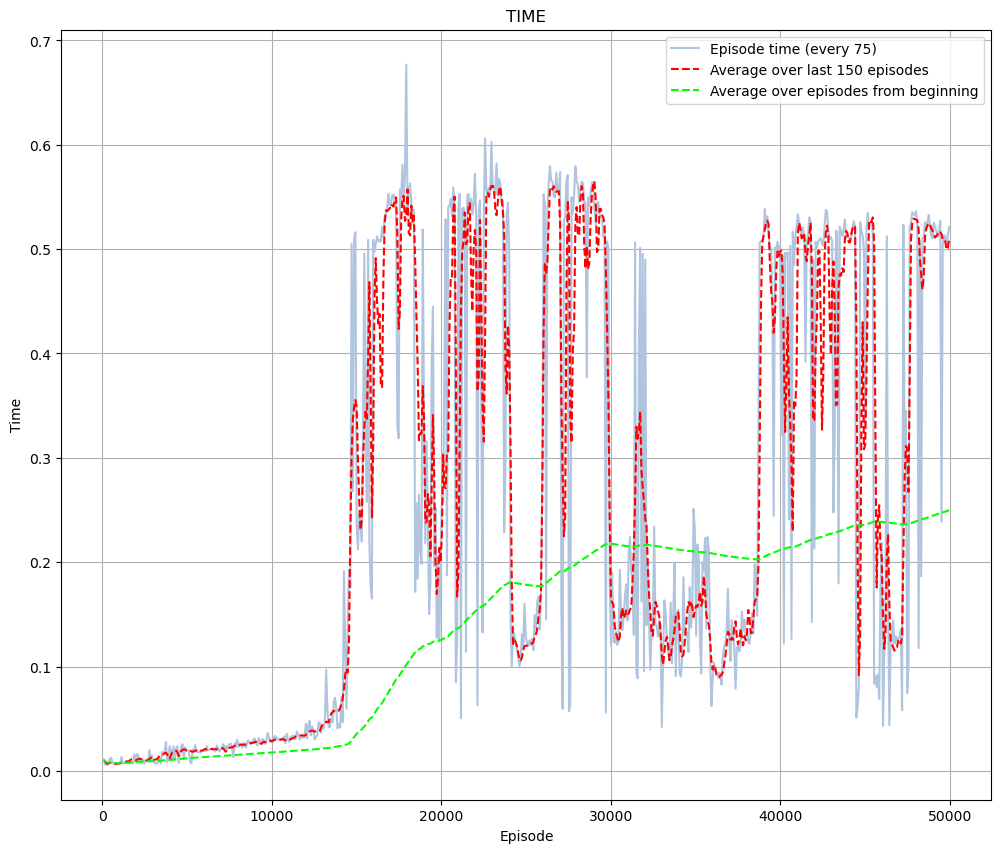

In [ ]:
rac.train(type_alg=2,
        hopper='S',
        n_episodes=50000,
        csv_name='actorcritic_alpha0.75.csv', 
        print_every=10000,
        optim_lr=1e-4,
        alpha=0.75,
        plot=True,
        random_state=42,
        )

**Test on 50 episodes**

In [ ]:
model =  'ActorCritic2_50000_b0_hS_rs42_250618_21-19-09.mdl'


test_returns= rac.test(type_alg=2,
                hopper='S',
                n_episodes=50,
                model=model,
                random_state=42) 
mean_return = np.mean(test_returns)
std_return = np.std(test_returns)
print(f'Mean return: {mean_return:.3f} ± {std_return:.3f}')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 514.201398271154
Episode: 1 | Return: 494.1858082731815
Episode: 2 | Return: 514.1723870790859
Episode: 3 | Return: 499.8886028002437
Episode: 4 | Return: 503.5628167750308
Episode: 5 | Return: 504.5665204890241
Episode: 6 | Return: 494.4326424679732
Episode: 7 | Return: 508.628787377184
Episode: 8 | Return: 515.0038416540023
Episode: 9 | Return: 520.2208106182333
Episode: 10 | Return: 507.18382078014525
Episode: 11 | Return: 492.9742016999129
Episode: 12 | Return: 524.1887255617643
Episode: 13 | Return: 518.4556935571738
Episode: 14 | Return: 495.64700249506046
Episode: 15 | Return: 493.9142758429432
Episode: 16 | Return: 516.0583263008128
Episode: 17 | Return: 493.9405816881691
Episode: 18 | Return: 486

#### $\alpha=0.9$

Creation of new CSV file actorcritic_alpha0.9.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  8%|▊         | 4115/50000 [00:38<10:42, 71.37it/s] 

 20%|██        | 10010/50000 [02:11<11:26, 58.26it/s]

Training episode: 10000
Episode return: -11.18382158728153


 40%|████      | 20005/50000 [05:49<16:36, 30.12it/s]

Training episode: 20000
Episode return: -2.390172840701425


 60%|██████    | 30000/50000 [52:16<2:44:17,  2.03it/s]

Training episode: 30000
Episode return: 379.24527613213564


 80%|███████▉  | 39999/50000 [1:58:26<27:13,  6.12it/s]  

Training episode: 40000
Episode return: 41.48040118243249


100%|██████████| 50000/50000 [2:25:06<00:00,  5.74it/s]


Training episode: 50000
Episode return: 250.71204840678976
Average of the last 150 returns: 209.08287560148554

MODEL NAME: ActorCritic2_50000_b0_hS_rs42_250619_00-48-00.mdl



(array([[-9.17213838e-01, -3.02662294e-01, -1.28113303e-01, ...,
          2.69930300e+02,  2.35181516e+02,  9.58865262e+00],
        [-1.09358924e+00, -1.61216304e+00, -5.34181526e-01, ...,
          2.47450623e+02,  2.42689660e+02,  2.09082876e+02],
        [-2.18717848e+00, -1.61216304e+00, -1.08518051e+00, ...,
          1.68193830e+02,  1.68302861e+02,  1.68316620e+02]]),
 array([[0.00993681, 0.00706625, 0.00702929, ..., 0.14766717, 0.12988138,
         0.01812482],
        [0.00499894, 0.00893332, 0.00729741, ..., 0.14388735, 0.14365815,
         0.12320271],
        [0.00999787, 0.00893332, 0.00819756, ..., 0.17388566, 0.17383926,
         0.17373345]]),
 8706.545081853867,
 'ActorCritic2_50000_b0_hS_rs42_250619_00-48-00.mdl')

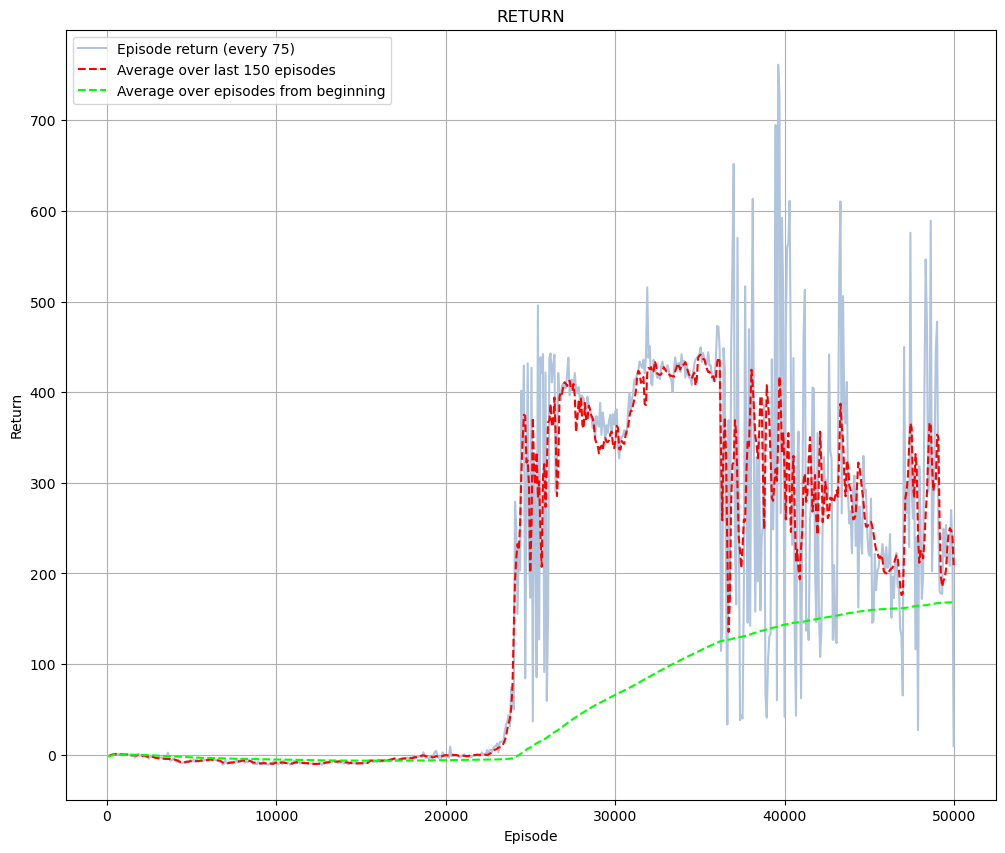

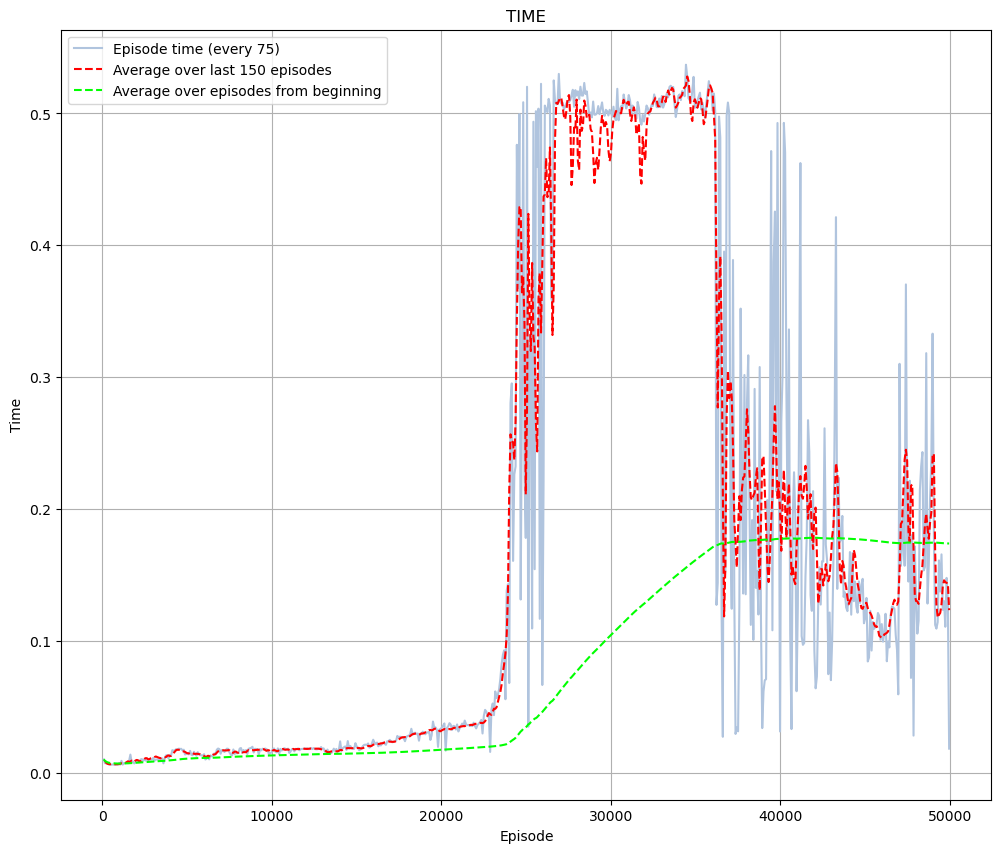

In [ ]:
rac.train(type_alg=2,
        hopper='S',
        n_episodes=50000,
        csv_name='actorcritic_alpha0.9.csv', 
        print_every=10000,
        optim_lr=1e-4,
        alpha=0.9,
        plot=True,
        random_state=42,
        )

**Test on 50 episodes**

In [ ]:
model =  'ActorCritic2_50000_b0_hS_rs42_250619_00-48-00.mdl'

test_returns= rac.test(type_alg=2,
                hopper='S',
                n_episodes=50,
                model=model,
                random_state=42) 
mean_return = np.mean(test_returns)
std_return = np.std(test_returns)
print(f'Mean return: {mean_return:.3f} ± {std_return:.3f}')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 178.76478990650472
Episode: 1 | Return: 190.11588624229591
Episode: 2 | Return: 260.131001625806
Episode: 3 | Return: 211.21676226807102
Episode: 4 | Return: 283.34945585151826
Episode: 5 | Return: 254.00640996726776
Episode: 6 | Return: 245.54450962381907
Episode: 7 | Return: 210.48730820391427
Episode: 8 | Return: 230.96161486859233
Episode: 9 | Return: 263.1663574206644
Episode: 10 | Return: 154.40837607696784
Episode: 11 | Return: 213.20642960681494
Episode: 12 | Return: 316.2338780328866
Episode: 13 | Return: 210.80733884262733
Episode: 14 | Return: 178.05419885666151
Episode: 15 | Return: 177.14508609947296
Episode: 16 | Return: 208.3296608742874
Episode: 17 | Return: 160.7284748422366
Episode: 18 |

### Actor-critic trainings with different alphas and seeds

In [ ]:
seeds = [35, 254, 78, 91] 
alpha = [0.25, 0.5, 0.75] 

test_returns = {}

for a in alpha:
    test_returns[f'alpha:{a}'] = {}
    for seed in seeds:
        _, _, _, model_name = rac.train(type_alg=2,
                            hopper='S',
                            n_episodes=50_000,
                            csv_name=f'actorcritic2_alpha{a}.csv', 
                            print_every=500,
                            optim_lr=1e-4,
                            alpha=a,
                            save_every=10,
                            random_state=seed,
                            plot=False,
                            )
    
        returns = rac.test(type_alg=2,
                           model = model_name,
                           hopper='S',
                           n_episodes=6, 
                           random_state=seed)

        test_returns[f'alpha:{a}'][f'seed:{seed}'] = returns

      

Creation of new CSV file actorcritic2_alpha0.25.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  0%|          | 0/50000 [00:00<?, ?it/s]

  1%|          | 505/50000 [00:18<34:31, 23.90it/s]

Training episode: 500
Episode return: 20.893253843262677


  2%|▏         | 999/50000 [00:52<2:36:41,  5.21it/s]

Training episode: 1000
Episode return: 55.73364917646986


  3%|▎         | 1501/50000 [01:50<1:26:30,  9.34it/s]

Training episode: 1500
Episode return: 185.0764603630908


  4%|▍         | 2001/50000 [02:43<1:24:51,  9.43it/s]

Training episode: 2000
Episode return: 195.22963234107306


  5%|▌         | 2502/50000 [03:32<1:23:04,  9.53it/s]

Training episode: 2500
Episode return: 195.5494230904949


  6%|▌         | 3001/50000 [04:20<1:23:13,  9.41it/s]

Training episode: 3000
Episode return: 185.18690231952715


  7%|▋         | 3501/50000 [05:13<1:33:40,  8.27it/s]

Training episode: 3500
Episode return: 189.5749555189892


  8%|▊         | 4002/50000 [06:12<1:04:20, 11.92it/s]

Training episode: 4000
Episode return: 78.16752241916411


  9%|▉         | 4502/50000 [07:21<1:27:08,  8.70it/s]

Training episode: 4500
Episode return: 217.17679805864466


 10%|█         | 5000/50000 [09:09<3:41:45,  3.38it/s]

Training episode: 5000
Episode return: 304.44422493167485


 11%|█         | 5501/50000 [11:57<4:48:22,  2.57it/s]

Training episode: 5500
Episode return: 462.8717593879288


 12%|█▏        | 6000/50000 [15:03<5:10:14,  2.36it/s]

Training episode: 6000
Episode return: 486.5839707191853


 13%|█▎        | 6500/50000 [18:20<6:09:33,  1.96it/s]

Training episode: 6500
Episode return: 455.83953112359114


 14%|█▍        | 7000/50000 [21:43<5:31:24,  2.16it/s]

Training episode: 7000
Episode return: 462.879600058254


 15%|█▌        | 7500/50000 [25:37<3:53:16,  3.04it/s]

Training episode: 7500
Episode return: 349.63275138218887


 16%|█▌        | 8002/50000 [27:06<2:11:18,  5.33it/s]

Training episode: 8000
Episode return: 394.0229547393595


 17%|█▋        | 8500/50000 [28:51<2:18:50,  4.98it/s]

Training episode: 8500
Episode return: 167.2554393304436


 18%|█▊        | 9000/50000 [31:24<2:05:34,  5.44it/s]

Training episode: 9000
Episode return: 383.00224328892494


 19%|█▉        | 9501/50000 [32:33<1:46:59,  6.31it/s]

Training episode: 9500
Episode return: 315.697706804198


 20%|██        | 10001/50000 [33:53<1:46:44,  6.25it/s]

Training episode: 10000
Episode return: 261.543035076219


 21%|██        | 10501/50000 [35:03<1:22:30,  7.98it/s]

Training episode: 10500
Episode return: 279.19486954949485


 22%|██▏       | 11001/50000 [36:11<1:21:22,  7.99it/s]

Training episode: 11000
Episode return: 310.4348838387811


 23%|██▎       | 11501/50000 [37:18<1:20:27,  7.97it/s]

Training episode: 11500
Episode return: 185.83861730598306


 24%|██▍       | 12001/50000 [38:20<1:11:14,  8.89it/s]

Training episode: 12000
Episode return: 267.65196708876005


 25%|██▌       | 12501/50000 [39:22<1:24:06,  7.43it/s]

Training episode: 12500
Episode return: 316.00131496783166


 26%|██▌       | 13001/50000 [41:00<2:25:36,  4.23it/s]

Training episode: 13000
Episode return: 403.93359661843544


 27%|██▋       | 13501/50000 [44:01<1:57:15,  5.19it/s]

Training episode: 13500
Episode return: 148.76594558376803


 28%|██▊       | 14002/50000 [46:01<56:04, 10.70it/s]  

Training episode: 14000
Episode return: 85.07578239970532


 29%|██▉       | 14501/50000 [46:55<57:27, 10.30it/s]  

Training episode: 14500
Episode return: 200.83870241964775


 30%|███       | 15001/50000 [47:52<1:09:40,  8.37it/s]

Training episode: 15000
Episode return: 317.85190448961396


 31%|███       | 15501/50000 [48:50<59:43,  9.63it/s]  

Training episode: 15500
Episode return: 203.80373944068222


 32%|███▏      | 16001/50000 [49:47<1:04:48,  8.74it/s]

Training episode: 16000
Episode return: 285.18705627575446


 33%|███▎      | 16501/50000 [50:52<1:20:44,  6.91it/s]

Training episode: 16500
Episode return: 292.8261172083552


 34%|███▍      | 17001/50000 [52:01<1:15:17,  7.31it/s]

Training episode: 17000
Episode return: 288.81409950337206


 35%|███▌      | 17501/50000 [53:07<1:18:16,  6.92it/s]

Training episode: 17500
Episode return: 305.90826215075555


 36%|███▌      | 18001/50000 [54:16<1:05:30,  8.14it/s]

Training episode: 18000
Episode return: 283.3447895767371


 37%|███▋      | 18501/50000 [55:19<1:01:43,  8.50it/s]

Training episode: 18500
Episode return: 335.57627054770916


 38%|███▊      | 19001/50000 [56:33<1:15:03,  6.88it/s]

Training episode: 19000
Episode return: 334.82353571540403


 39%|███▉      | 19501/50000 [57:42<1:13:00,  6.96it/s]

Training episode: 19500
Episode return: 333.7457504968763


 40%|████      | 20001/50000 [58:54<1:14:19,  6.73it/s]

Training episode: 20000
Episode return: 375.91973836819847


 41%|████      | 20501/50000 [1:00:04<1:07:53,  7.24it/s]

Training episode: 20500
Episode return: 356.72671295877086


 42%|████▏     | 21001/50000 [1:01:08<1:02:01,  7.79it/s]

Training episode: 21000
Episode return: 323.75348934882544


 43%|████▎     | 21501/50000 [1:02:15<1:03:38,  7.46it/s]

Training episode: 21500
Episode return: 347.6902891885708


 44%|████▍     | 22001/50000 [1:03:25<1:08:49,  6.78it/s]

Training episode: 22000
Episode return: 340.7838207887854


 45%|████▌     | 22501/50000 [1:04:33<1:02:14,  7.36it/s]

Training episode: 22500
Episode return: 383.0258819660671


 46%|████▌     | 23001/50000 [1:05:37<51:56,  8.66it/s]  

Training episode: 23000
Episode return: 220.32949681699796


 47%|████▋     | 23502/50000 [1:06:39<48:35,  9.09it/s]  

Training episode: 23500
Episode return: 367.90089312875466


 48%|████▊     | 24001/50000 [1:07:45<57:44,  7.51it/s]  

Training episode: 24000
Episode return: 298.4724623027556


 49%|████▉     | 24501/50000 [1:08:49<57:49,  7.35it/s]  

Training episode: 24500
Episode return: 384.1791411605609


 50%|█████     | 25001/50000 [1:09:57<54:36,  7.63it/s]  

Training episode: 25000
Episode return: 364.25369059895485


 51%|█████     | 25501/50000 [1:10:59<52:40,  7.75it/s]

Training episode: 25500
Episode return: 324.29892085942225


 52%|█████▏    | 26001/50000 [1:12:04<47:32,  8.41it/s]  

Training episode: 26000
Episode return: 224.51091812005077


 53%|█████▎    | 26501/50000 [1:13:15<1:00:07,  6.51it/s]

Training episode: 26500
Episode return: 350.8139784935629


 54%|█████▍    | 27001/50000 [1:14:27<50:11,  7.64it/s]  

Training episode: 27000
Episode return: 364.78139013951505


 55%|█████▌    | 27501/50000 [1:15:34<52:47,  7.10it/s]

Training episode: 27500
Episode return: 367.9367287871593


 56%|█████▌    | 28001/50000 [1:16:44<47:08,  7.78it/s]  

Training episode: 28000
Episode return: 359.2608818373181


 57%|█████▋    | 28501/50000 [1:17:51<40:53,  8.76it/s]

Training episode: 28500
Episode return: 149.63072871987373


 58%|█████▊    | 29001/50000 [1:18:58<51:12,  6.83it/s]

Training episode: 29000
Episode return: 382.78703164531345


 59%|█████▉    | 29501/50000 [1:20:06<40:18,  8.48it/s]

Training episode: 29500
Episode return: 364.0700169557063


 60%|██████    | 30002/50000 [1:21:14<33:38,  9.91it/s]  

Training episode: 30000
Episode return: 376.90041557987036


 61%|██████    | 30503/50000 [1:22:13<21:13, 15.32it/s]

Training episode: 30500
Episode return: 74.2164521467677


 62%|██████▏   | 31001/50000 [1:23:13<44:45,  7.07it/s]

Training episode: 31000
Episode return: 331.46700684691325


 63%|██████▎   | 31501/50000 [1:24:22<42:41,  7.22it/s]

Training episode: 31500
Episode return: 377.4322114385115


 64%|██████▍   | 32001/50000 [1:25:30<36:11,  8.29it/s]

Training episode: 32000
Episode return: 79.885182870026


 65%|██████▌   | 32501/50000 [1:26:38<41:18,  7.06it/s]

Training episode: 32500
Episode return: 358.92615610455283


 66%|██████▌   | 33001/50000 [1:27:49<38:18,  7.40it/s]

Training episode: 33000
Episode return: 347.7431013955255


 67%|██████▋   | 33501/50000 [1:28:56<39:11,  7.02it/s]

Training episode: 33500
Episode return: 354.69842117230866


 68%|██████▊   | 34001/50000 [1:30:05<35:17,  7.55it/s]

Training episode: 34000
Episode return: 179.56740612049612


 69%|██████▉   | 34501/50000 [1:31:13<37:44,  6.84it/s]

Training episode: 34500
Episode return: 376.8378833034339


 70%|███████   | 35001/50000 [1:32:25<35:28,  7.05it/s]

Training episode: 35000
Episode return: 348.05866237968166


 71%|███████   | 35501/50000 [1:33:34<32:31,  7.43it/s]

Training episode: 35500
Episode return: 322.02082591386784


 72%|███████▏  | 36001/50000 [1:34:40<30:11,  7.73it/s]

Training episode: 36000
Episode return: 355.02919319115773


 73%|███████▎  | 36501/50000 [1:35:45<24:08,  9.32it/s]

Training episode: 36500
Episode return: 360.3175538433404


 74%|███████▍  | 37000/50000 [1:36:51<21:49,  9.93it/s]

Training episode: 37000
Episode return: 153.81683092395448


 75%|███████▌  | 37501/50000 [1:37:54<27:26,  7.59it/s]

Training episode: 37500
Episode return: 353.22884817833386


 76%|███████▌  | 38001/50000 [1:38:56<24:19,  8.22it/s]

Training episode: 38000
Episode return: 360.8081080594075


 77%|███████▋  | 38501/50000 [1:39:54<19:13,  9.97it/s]

Training episode: 38500
Episode return: 152.20740157430262


 78%|███████▊  | 39001/50000 [1:40:55<22:58,  7.98it/s]

Training episode: 39000
Episode return: 355.8699169495785


 79%|███████▉  | 39501/50000 [1:42:01<21:35,  8.11it/s]

Training episode: 39500
Episode return: 337.6052449039419


 80%|████████  | 40001/50000 [1:43:08<22:16,  7.48it/s]

Training episode: 40000
Episode return: 341.72280372318


 81%|████████  | 40501/50000 [1:44:19<19:37,  8.07it/s]

Training episode: 40500
Episode return: 372.071421908327


 82%|████████▏ | 41001/50000 [1:45:23<20:06,  7.46it/s]

Training episode: 41000
Episode return: 375.5517609783347


 83%|████████▎ | 41501/50000 [1:46:24<20:01,  7.07it/s]

Training episode: 41500
Episode return: 371.70064506780466


 84%|████████▍ | 42001/50000 [1:47:30<17:12,  7.74it/s]

Training episode: 42000
Episode return: 338.8959142311334


 85%|████████▌ | 42501/50000 [1:48:34<16:23,  7.63it/s]

Training episode: 42500
Episode return: 383.54336797651797


 86%|████████▌ | 43001/50000 [1:49:33<12:59,  8.98it/s]

Training episode: 43000
Episode return: 315.59778630670553


 87%|████████▋ | 43501/50000 [1:50:29<12:56,  8.37it/s]

Training episode: 43500
Episode return: 198.24681070737716


 88%|████████▊ | 44001/50000 [1:51:27<11:53,  8.41it/s]

Training episode: 44000
Episode return: 322.2019048689751


 89%|████████▉ | 44501/50000 [1:52:24<11:10,  8.21it/s]

Training episode: 44500
Episode return: 308.61917636631443


 90%|█████████ | 45001/50000 [1:53:25<10:30,  7.93it/s]

Training episode: 45000
Episode return: 335.3615145064348


 91%|█████████ | 45501/50000 [1:54:23<08:37,  8.69it/s]

Training episode: 45500
Episode return: 324.741095026431


 92%|█████████▏| 46001/50000 [1:55:21<07:55,  8.40it/s]

Training episode: 46000
Episode return: 304.0996877389153


 93%|█████████▎| 46501/50000 [1:56:20<06:08,  9.50it/s]

Training episode: 46500
Episode return: 168.14842591545914


 94%|█████████▍| 47001/50000 [1:57:20<06:18,  7.92it/s]

Training episode: 47000
Episode return: 326.3838141229714


 95%|█████████▌| 47501/50000 [1:58:23<05:18,  7.86it/s]

Training episode: 47500
Episode return: 360.5717971634871


 96%|█████████▌| 48001/50000 [1:59:26<04:12,  7.90it/s]

Training episode: 48000
Episode return: 356.6029447857097


 97%|█████████▋| 48501/50000 [2:00:27<03:08,  7.94it/s]

Training episode: 48500
Episode return: 364.5043438706668


 98%|█████████▊| 49000/50000 [2:01:29<01:58,  8.43it/s]

Training episode: 49000
Episode return: 308.0145027820255


 99%|█████████▉| 49501/50000 [2:02:29<01:01,  8.07it/s]

Training episode: 49500
Episode return: 326.00493508837945


100%|██████████| 50000/50000 [2:03:31<00:00,  6.75it/s]


Training episode: 50000
Episode return: 351.47062414060497
Average of the last 20 returns: 348.30431611601614

MODEL NAME: ActorCritic2_50000_b0_hS_rs35_250620_15-47-59.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 345.8620366911832
Episode: 1 | Return: 354.7965470194119
Episode: 2 | Return: 353.61243965067564
Episode: 3 | Return: 341.4378357606616
Episode: 4 | Return: 350.81630718632124
Episode: 5 | Return: 356.85597804462464
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 510/50000 [00:07<14:42, 56.05it/s]

Training episode: 500
Episode return: 5.248228405541578


  2%|▏         | 1007/50000 [00:17<17:49, 45.79it/s]

Training episode: 1000
Episode return: 9.783220017351308


  3%|▎         | 1505/50000 [00:28<17:31, 46.12it/s]

Training episode: 1500
Episode return: 12.271262981799762


  4%|▍         | 2002/50000 [00:40<31:07, 25.70it/s]

Training episode: 2000
Episode return: 20.746522843634306


  5%|▌         | 2502/50000 [02:40<1:24:39,  9.35it/s]

Training episode: 2500
Episode return: 125.11371794406806


  6%|▌         | 3000/50000 [03:34<1:49:43,  7.14it/s]

Training episode: 3000
Episode return: 210.79510372198365


  7%|▋         | 3501/50000 [04:45<2:03:57,  6.25it/s]

Training episode: 3500
Episode return: 211.5544575710303


  8%|▊         | 4000/50000 [06:26<3:31:02,  3.63it/s]

Training episode: 4000
Episode return: 421.94587808844534


  9%|▉         | 4501/50000 [08:16<1:58:21,  6.41it/s]

Training episode: 4500
Episode return: 67.87489289342533


 10%|█         | 5001/50000 [10:33<2:49:28,  4.43it/s]

Training episode: 5000
Episode return: 264.3306069266898


 11%|█         | 5501/50000 [12:52<2:48:40,  4.40it/s]

Training episode: 5500
Episode return: 325.4622437831816


 12%|█▏        | 6000/50000 [15:01<2:36:51,  4.67it/s]

Training episode: 6000
Episode return: 441.7835857984774


 13%|█▎        | 6501/50000 [17:15<2:42:10,  4.47it/s]

Training episode: 6500
Episode return: 463.52049851072945


 14%|█▍        | 7000/50000 [19:16<2:24:44,  4.95it/s]

Training episode: 7000
Episode return: 197.55734920937996


 15%|█▌        | 7500/50000 [21:31<5:04:43,  2.32it/s]

Training episode: 7500
Episode return: 498.01439828668873


 16%|█▌        | 8000/50000 [24:43<2:13:49,  5.23it/s]

Training episode: 8000
Episode return: 352.9118565750468


 17%|█▋        | 8500/50000 [26:00<2:03:26,  5.60it/s]

Training episode: 8500
Episode return: 367.61414917010535


 18%|█▊        | 9000/50000 [27:43<3:47:38,  3.00it/s]

Training episode: 9000
Episode return: 475.43250484094943


 19%|█▉        | 9501/50000 [29:22<1:47:08,  6.30it/s]

Training episode: 9500
Episode return: 337.4896862855582


 20%|██        | 10001/50000 [30:19<59:07, 11.28it/s] 

Training episode: 10000
Episode return: 270.87051188592676


 21%|██        | 10501/50000 [31:13<1:15:16,  8.75it/s]

Training episode: 10500
Episode return: 243.45835998476525


 22%|██▏       | 11001/50000 [32:09<1:11:55,  9.04it/s]

Training episode: 11000
Episode return: 239.69916909859376


 23%|██▎       | 11501/50000 [33:02<1:08:31,  9.36it/s]

Training episode: 11500
Episode return: 265.2506296672547


 24%|██▍       | 12001/50000 [33:52<1:07:53,  9.33it/s]

Training episode: 12000
Episode return: 255.5338107611022


 25%|██▌       | 12502/50000 [34:43<1:02:39,  9.97it/s]

Training episode: 12500
Episode return: 231.515051176466


 26%|██▌       | 13002/50000 [35:33<59:28, 10.37it/s]  

Training episode: 13000
Episode return: 209.72939980610795


 27%|██▋       | 13501/50000 [36:25<1:05:47,  9.25it/s]

Training episode: 13500
Episode return: 249.2179234127533


 28%|██▊       | 14001/50000 [37:20<1:08:07,  8.81it/s]

Training episode: 14000
Episode return: 274.85968142204723


 29%|██▉       | 14501/50000 [38:23<1:27:34,  6.76it/s]

Training episode: 14500
Episode return: 336.57438881057755


 30%|███       | 15002/50000 [39:35<53:13, 10.96it/s]  

Training episode: 15000
Episode return: 205.36258162120922


 31%|███       | 15501/50000 [40:33<1:00:55,  9.44it/s]

Training episode: 15500
Episode return: 265.7761949812502


 32%|███▏      | 16001/50000 [41:31<1:10:04,  8.09it/s]

Training episode: 16000
Episode return: 244.00760146929719


 33%|███▎      | 16501/50000 [42:36<1:09:27,  8.04it/s]

Training episode: 16500
Episode return: 290.5796046918595


 34%|███▍      | 17001/50000 [43:54<2:18:27,  3.97it/s]

Training episode: 17000
Episode return: 527.3246100005966


 35%|███▌      | 17501/50000 [45:29<1:24:01,  6.45it/s]

Training episode: 17500
Episode return: 416.28271060147523


 36%|███▌      | 18001/50000 [46:53<1:33:53,  5.68it/s]

Training episode: 18000
Episode return: 601.7025150900047


 37%|███▋      | 18501/50000 [48:27<1:24:54,  6.18it/s]

Training episode: 18500
Episode return: 292.31912939612937


 38%|███▊      | 19001/50000 [49:57<1:14:34,  6.93it/s]

Training episode: 19000
Episode return: 266.52660265303774


 39%|███▉      | 19501/50000 [51:16<2:18:05,  3.68it/s]

Training episode: 19500
Episode return: 506.40705878925297


 40%|████      | 20000/50000 [53:03<1:34:23,  5.30it/s]

Training episode: 20000
Episode return: 350.3860621923675


 41%|████      | 20500/50000 [54:25<36:37, 13.42it/s]  

Training episode: 20500
Episode return: 88.85629699258354


 42%|████▏     | 21001/50000 [55:30<1:17:18,  6.25it/s]

Training episode: 21000
Episode return: 467.1474033754251


 43%|████▎     | 21501/50000 [56:42<1:02:22,  7.61it/s]

Training episode: 21500
Episode return: 272.7054399350064


 44%|████▍     | 22000/50000 [58:11<1:51:54,  4.17it/s]

Training episode: 22000
Episode return: 466.63049456794283


 45%|████▌     | 22501/50000 [1:00:06<1:32:19,  4.96it/s]

Training episode: 22500
Episode return: 361.4776392412999


 46%|████▌     | 23001/50000 [1:01:34<1:02:43,  7.17it/s]

Training episode: 23000
Episode return: 331.2425502792298


 47%|████▋     | 23500/50000 [1:03:01<1:13:20,  6.02it/s]

Training episode: 23500
Episode return: 369.45091392069196


 48%|████▊     | 24001/50000 [1:04:09<54:07,  8.01it/s]  

Training episode: 24000
Episode return: 311.67222113312204


 49%|████▉     | 24501/50000 [1:05:21<1:11:53,  5.91it/s]

Training episode: 24500
Episode return: 265.7572618189748


 50%|█████     | 25001/50000 [1:06:44<1:19:10,  5.26it/s]

Training episode: 25000
Episode return: 448.1578854428923


 51%|█████     | 25501/50000 [1:07:57<48:52,  8.35it/s]  

Training episode: 25500
Episode return: 261.6301969545338


 52%|█████▏    | 26001/50000 [1:09:20<1:26:27,  4.63it/s]

Training episode: 26000
Episode return: 919.2626329125922


 52%|█████▏    | 26109/50000 [1:09:46<2:23:54,  2.77it/s]

Threshold reached


 53%|█████▎    | 26500/50000 [1:11:27<1:48:02,  3.63it/s]

Training episode: 26500
Episode return: 1109.208790949843


 54%|█████▍    | 27001/50000 [1:13:05<1:15:12,  5.10it/s]

Training episode: 27000
Episode return: 739.8049170920167


 55%|█████▌    | 27501/50000 [1:14:41<39:03,  9.60it/s]  

Training episode: 27500
Episode return: 214.14324828924427


 56%|█████▌    | 28001/50000 [1:15:44<40:01,  9.16it/s]  

Training episode: 28000
Episode return: 143.6404486491102


 57%|█████▋    | 28501/50000 [1:16:54<47:57,  7.47it/s]  

Training episode: 28500
Episode return: 388.8618066635461


 58%|█████▊    | 29000/50000 [1:18:25<57:32,  6.08it/s]  

Training episode: 29000
Episode return: 434.1661296036564


 59%|█████▉    | 29501/50000 [1:19:51<1:07:20,  5.07it/s]

Training episode: 29500
Episode return: 729.3176646291238


 60%|██████    | 30001/50000 [1:21:30<56:03,  5.95it/s]  

Training episode: 30000
Episode return: 448.9109233508201


 61%|██████    | 30500/50000 [1:22:59<57:43,  5.63it/s]  

Training episode: 30500
Episode return: 451.24334457910015


 62%|██████▏   | 31001/50000 [1:24:25<53:23,  5.93it/s]  

Training episode: 31000
Episode return: 473.8055305130669


 63%|██████▎   | 31500/50000 [1:25:53<2:30:35,  2.05it/s]

Training episode: 31500
Episode return: 638.1070048272444


 64%|██████▍   | 32001/50000 [1:27:23<53:26,  5.61it/s]  

Training episode: 32000
Episode return: 544.48640296161


 65%|██████▌   | 32502/50000 [1:28:35<28:46, 10.14it/s]

Training episode: 32500
Episode return: 296.21066954560285


 66%|██████▌   | 33001/50000 [1:29:49<46:29,  6.09it/s]

Training episode: 33000
Episode return: 389.8813339904068


 67%|██████▋   | 33501/50000 [1:31:03<42:20,  6.49it/s]

Training episode: 33500
Episode return: 395.96400396198305


 68%|██████▊   | 34001/50000 [1:32:21<51:06,  5.22it/s]  

Training episode: 34000
Episode return: 442.4253585309445


 69%|██████▉   | 34500/50000 [1:34:22<54:15,  4.76it/s]  

Training episode: 34500
Episode return: 607.0610344076518


 70%|███████   | 35001/50000 [1:35:48<47:07,  5.31it/s]

Training episode: 35000
Episode return: 313.89221841079495


 71%|███████   | 35501/50000 [1:38:06<56:51,  4.25it/s]  

Training episode: 35500
Episode return: 351.6869583091294


 72%|███████▏  | 36000/50000 [1:39:51<45:56,  5.08it/s]  

Training episode: 36000
Episode return: 649.9653259298552


 73%|███████▎  | 36501/50000 [1:41:54<28:26,  7.91it/s]  

Training episode: 36500
Episode return: 136.39678174679202


 74%|███████▍  | 37001/50000 [1:43:05<29:56,  7.24it/s]

Training episode: 37000
Episode return: 389.9299328147523


 75%|███████▌  | 37501/50000 [1:44:08<29:14,  7.12it/s]

Training episode: 37500
Episode return: 362.43405815358


 76%|███████▌  | 38000/50000 [1:45:53<47:29,  4.21it/s]  

Training episode: 38000
Episode return: 1046.8767168720462


 77%|███████▋  | 38501/50000 [1:48:15<37:23,  5.13it/s]  

Training episode: 38500
Episode return: 302.2772482404174


 78%|███████▊  | 39000/50000 [1:50:24<1:11:46,  2.55it/s]

Training episode: 39000
Episode return: 492.05425538114133


 79%|███████▉  | 39501/50000 [1:53:00<21:49,  8.02it/s]  

Training episode: 39500
Episode return: 679.875726080697


 80%|████████  | 40001/50000 [1:55:00<30:15,  5.51it/s]  

Training episode: 40000
Episode return: 538.5784691045676


 81%|████████  | 40501/50000 [1:56:30<25:49,  6.13it/s]

Training episode: 40500
Episode return: 500.1220420577263


 82%|████████▏ | 41001/50000 [1:57:46<21:29,  6.98it/s]

Training episode: 41000
Episode return: 222.1300456550653


 83%|████████▎ | 41501/50000 [1:59:18<28:05,  5.04it/s]

Training episode: 41500
Episode return: 445.5005768376779


 84%|████████▍ | 42001/50000 [2:00:38<16:50,  7.91it/s]

Training episode: 42000
Episode return: 336.0382579501164


 85%|████████▌ | 42501/50000 [2:01:36<14:50,  8.42it/s]

Training episode: 42500
Episode return: 311.1184427418733


 86%|████████▌ | 43002/50000 [2:02:29<08:30, 13.72it/s]

Training episode: 43000
Episode return: 137.49901907486247


 87%|████████▋ | 43503/50000 [2:03:03<06:47, 15.94it/s]

Training episode: 43500
Episode return: 121.8376656744047


 88%|████████▊ | 44002/50000 [2:03:36<08:13, 12.15it/s]

Training episode: 44000
Episode return: 158.42852376703303


 89%|████████▉ | 44501/50000 [2:04:49<16:56,  5.41it/s]

Training episode: 44500
Episode return: 440.51354093472304


 90%|█████████ | 45001/50000 [2:05:58<10:48,  7.71it/s]

Training episode: 45000
Episode return: 356.12434919732226


 91%|█████████ | 45501/50000 [2:07:01<10:02,  7.46it/s]

Training episode: 45500
Episode return: 364.69702961389356


 92%|█████████▏| 46001/50000 [2:08:05<08:33,  7.79it/s]

Training episode: 46000
Episode return: 344.52636535905526


 93%|█████████▎| 46501/50000 [2:09:10<07:24,  7.88it/s]

Training episode: 46500
Episode return: 327.58547020427864


 94%|█████████▍| 47001/50000 [2:10:16<06:38,  7.53it/s]

Training episode: 47000
Episode return: 354.9084386458861


 95%|█████████▌| 47501/50000 [2:11:23<05:31,  7.54it/s]

Training episode: 47500
Episode return: 384.0793333768011


 96%|█████████▌| 48001/50000 [2:12:31<04:24,  7.56it/s]

Training episode: 48000
Episode return: 388.35588155219676


 97%|█████████▋| 48501/50000 [2:13:42<03:49,  6.53it/s]

Training episode: 48500
Episode return: 421.18270474593


 98%|█████████▊| 49001/50000 [2:14:52<02:14,  7.44it/s]

Training episode: 49000
Episode return: 394.28255767270593


 99%|█████████▉| 49501/50000 [2:16:02<01:11,  7.01it/s]

Training episode: 49500
Episode return: 140.48587143822044


100%|██████████| 50000/50000 [2:17:12<00:00,  6.07it/s]


Training episode: 50000
Episode return: 351.58842445800167
Average of the last 20 returns: 322.4601849002602

MODEL NAME: ActorCritic2_50000_b0_hS_rs254_250620_17-51-31.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 361.09158858501854
Episode: 1 | Return: 342.1302641165323
Episode: 2 | Return: 105.31965412080594
Episode: 3 | Return: 388.7198112189484
Episode: 4 | Return: 375.4179291786465
Episode: 5 | Return: 112.6373470582606
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 514/50000 [00:06<10:22, 79.48it/s]

Training episode: 500
Episode return: 5.479173547721844


  2%|▏         | 1010/50000 [00:12<13:30, 60.46it/s]

Training episode: 1000
Episode return: 5.478155212658521


  3%|▎         | 1506/50000 [00:22<20:02, 40.34it/s]

Training episode: 1500
Episode return: 4.286954843739098


  4%|▍         | 2003/50000 [00:36<25:04, 31.90it/s]

Training episode: 2000
Episode return: -0.783357414182988


  5%|▌         | 2502/50000 [00:54<45:46, 17.30it/s]

Training episode: 2500
Episode return: -2.0231957424065463


  6%|▌         | 3005/50000 [01:15<25:41, 30.49it/s]

Training episode: 3000
Episode return: -1.7397068073934554


  7%|▋         | 3504/50000 [01:31<26:38, 29.09it/s]

Training episode: 3500
Episode return: 1.4184168770153227


  8%|▊         | 4004/50000 [01:48<25:07, 30.51it/s]

Training episode: 4000
Episode return: -1.2249000595588808


  9%|▉         | 4505/50000 [02:05<26:23, 28.73it/s]

Training episode: 4500
Episode return: 0.3280735294606737


 10%|█         | 5004/50000 [02:23<26:09, 28.67it/s]

Training episode: 5000
Episode return: -0.13161609337401525


 11%|█         | 5504/50000 [02:40<26:44, 27.73it/s]

Training episode: 5500
Episode return: 2.409717537481657


 12%|█▏        | 6003/50000 [02:58<25:55, 28.29it/s]

Training episode: 6000
Episode return: 1.5605974159273215


 13%|█▎        | 6504/50000 [03:16<25:51, 28.04it/s]

Training episode: 6500
Episode return: 2.574062492841035


 14%|█▍        | 7003/50000 [03:33<25:57, 27.60it/s]

Training episode: 7000
Episode return: 4.071231743534893


 15%|█▌        | 7504/50000 [03:51<24:55, 28.41it/s]

Training episode: 7500
Episode return: 3.6927418377415817


 16%|█▌        | 8004/50000 [04:11<29:38, 23.62it/s]

Training episode: 8000
Episode return: 5.87805448807658


 17%|█▋        | 8502/50000 [04:32<32:55, 21.01it/s]

Training episode: 8500
Episode return: 14.219145179953138


 18%|█▊        | 9001/50000 [05:07<1:21:04,  8.43it/s]

Training episode: 9000
Episode return: 72.09904605504154


 19%|█▉        | 9500/50000 [07:04<5:22:44,  2.09it/s]

Training episode: 9500
Episode return: 438.1761795226584


 20%|██        | 10000/50000 [11:00<5:38:53,  1.97it/s]

Training episode: 10000
Episode return: 461.1672559083769


 21%|██        | 10500/50000 [14:26<5:15:55,  2.08it/s]

Training episode: 10500
Episode return: 482.2964588390481


 22%|██▏       | 11001/50000 [18:07<1:38:10,  6.62it/s]

Training episode: 11000
Episode return: 103.76023491355993


 23%|██▎       | 11501/50000 [21:11<1:02:33, 10.26it/s]

Training episode: 11500
Episode return: 22.625716553724672


 24%|██▍       | 12003/50000 [22:18<1:03:45,  9.93it/s]

Training episode: 12000
Episode return: 58.41879865234222


 25%|██▌       | 12501/50000 [24:23<2:31:49,  4.12it/s]

Training episode: 12500
Episode return: 347.84810528587866


 26%|██▌       | 13000/50000 [26:24<3:34:12,  2.88it/s]

Training episode: 13000
Episode return: 211.7175889857827


 27%|██▋       | 13500/50000 [29:11<4:07:33,  2.46it/s]

Training episode: 13500
Episode return: 560.750938518026


 28%|██▊       | 14000/50000 [31:51<2:57:46,  3.38it/s]

Training episode: 14000
Episode return: 447.1953492430811


 29%|██▉       | 14499/50000 [34:31<2:29:22,  3.96it/s]

Training episode: 14500
Episode return: 113.73033099227425


 30%|███       | 15000/50000 [36:30<2:29:17,  3.91it/s]

Training episode: 15000
Episode return: 281.17792217456275


 31%|███       | 15500/50000 [38:37<2:25:05,  3.96it/s]

Training episode: 15500
Episode return: 467.6875972329428


 32%|███▏      | 16001/50000 [40:59<1:56:10,  4.88it/s]

Training episode: 16000
Episode return: 372.2390948326692


 33%|███▎      | 16501/50000 [43:08<1:34:03,  5.94it/s]

Training episode: 16500
Episode return: 291.1540757575923


 34%|███▍      | 17001/50000 [44:57<1:38:40,  5.57it/s]

Training episode: 17000
Episode return: 126.54577965069782


 35%|███▌      | 17501/50000 [46:48<1:20:53,  6.70it/s]

Training episode: 17500
Episode return: 307.1021804651265


 36%|███▌      | 18001/50000 [47:52<53:04, 10.05it/s]  

Training episode: 18000
Episode return: 147.05152311668576


 37%|███▋      | 18501/50000 [48:44<1:00:29,  8.68it/s]

Training episode: 18500
Episode return: 236.77439108867299


 38%|███▊      | 19001/50000 [49:38<59:47,  8.64it/s]  

Training episode: 19000
Episode return: 245.90706600534583


 39%|███▉      | 19501/50000 [50:33<1:04:16,  7.91it/s]

Training episode: 19500
Episode return: 265.75409206310394


 40%|████      | 20001/50000 [51:32<57:31,  8.69it/s]  

Training episode: 20000
Episode return: 282.11769991664335


 41%|████      | 20501/50000 [52:23<55:21,  8.88it/s]  

Training episode: 20500
Episode return: 161.35063961459457


 42%|████▏     | 21001/50000 [53:32<1:01:27,  7.86it/s]

Training episode: 21000
Episode return: 279.3418379107818


 43%|████▎     | 21501/50000 [54:50<1:22:27,  5.76it/s]

Training episode: 21500
Episode return: 519.5672077754833


 44%|████▍     | 21999/50000 [56:09<49:14,  9.48it/s]  

Training episode: 22000
Episode return: 59.26551490775268


 45%|████▌     | 22501/50000 [57:12<1:15:35,  6.06it/s]

Training episode: 22500
Episode return: 317.54811249602704


 46%|████▌     | 23000/50000 [58:13<1:00:27,  7.44it/s]

Training episode: 23000
Episode return: 164.75135854494005


 47%|████▋     | 23501/50000 [59:28<1:01:04,  7.23it/s]

Training episode: 23500
Episode return: 263.12856862020533


 48%|████▊     | 24001/50000 [1:00:21<41:58, 10.32it/s]

Training episode: 24000
Episode return: 196.4668596302864


 49%|████▉     | 24501/50000 [1:01:16<43:23,  9.80it/s]

Training episode: 24500
Episode return: 122.22214584869045


 50%|█████     | 25001/50000 [1:02:09<43:54,  9.49it/s]

Training episode: 25000
Episode return: 231.296727100871


 51%|█████     | 25501/50000 [1:03:01<39:11, 10.42it/s]

Training episode: 25500
Episode return: 256.7950928454745


 52%|█████▏    | 26001/50000 [1:03:48<37:43, 10.60it/s]

Training episode: 26000
Episode return: 246.26459242558735


 53%|█████▎    | 26501/50000 [1:04:44<34:15, 11.43it/s]

Training episode: 26500
Episode return: 94.3371097822315


 54%|█████▍    | 27001/50000 [1:05:49<1:04:01,  5.99it/s]

Training episode: 27000
Episode return: 313.7679798130686


 55%|█████▌    | 27500/50000 [1:07:06<1:07:55,  5.52it/s]

Training episode: 27500
Episode return: 346.0711613663161


 56%|█████▌    | 28001/50000 [1:08:30<57:50,  6.34it/s]  

Training episode: 28000
Episode return: 298.61701034442626


 57%|█████▋    | 28501/50000 [1:09:53<1:03:09,  5.67it/s]

Training episode: 28500
Episode return: 350.0073310558057


 58%|█████▊    | 29001/50000 [1:11:12<46:59,  7.45it/s]  

Training episode: 29000
Episode return: 260.79498100988695


 59%|█████▉    | 29501/50000 [1:12:17<50:03,  6.83it/s]  

Training episode: 29500
Episode return: 295.6510254941766


 60%|██████    | 30001/50000 [1:13:21<39:52,  8.36it/s]  

Training episode: 30000
Episode return: 269.4227847057922


 61%|██████    | 30500/50000 [1:14:46<56:57,  5.71it/s]  

Training episode: 30500
Episode return: 338.81018360561586


 62%|██████▏   | 31000/50000 [1:16:34<1:08:49,  4.60it/s]

Training episode: 31000
Episode return: 411.00960365517915


 63%|██████▎   | 31500/50000 [1:18:17<55:57,  5.51it/s]  

Training episode: 31500
Episode return: 353.3731634768182


 64%|██████▍   | 32000/50000 [1:19:54<1:06:53,  4.49it/s]

Training episode: 32000
Episode return: 402.47649808049295


 65%|██████▌   | 32501/50000 [1:21:35<47:32,  6.14it/s]  

Training episode: 32500
Episode return: 346.7760584373589


 66%|██████▌   | 33001/50000 [1:22:56<49:35,  5.71it/s]  

Training episode: 33000
Episode return: 317.381426203804


 67%|██████▋   | 33501/50000 [1:24:23<26:43, 10.29it/s]  

Training episode: 33500
Episode return: 185.47984752079716


 68%|██████▊   | 34001/50000 [1:25:22<31:19,  8.51it/s]

Training episode: 34000
Episode return: 287.6761850138788


 69%|██████▉   | 34501/50000 [1:26:28<47:09,  5.48it/s]  

Training episode: 34500
Episode return: 227.81220205207296


 70%|███████   | 35000/50000 [1:28:10<53:51,  4.64it/s]  

Training episode: 35000
Episode return: 487.68081406875604


 71%|███████   | 35500/50000 [1:30:06<41:57,  5.76it/s]  

Training episode: 35500
Episode return: 107.34467133377879


 72%|███████▏  | 36000/50000 [1:32:56<1:13:07,  3.19it/s]

Training episode: 36000
Episode return: 111.37701795641551


 73%|███████▎  | 36501/50000 [1:34:49<44:43,  5.03it/s]  

Training episode: 36500
Episode return: 210.49218203021186


 74%|███████▍  | 37001/50000 [1:36:21<49:53,  4.34it/s]  

Training episode: 37000
Episode return: 248.68924593756265


 75%|███████▌  | 37501/50000 [1:39:06<35:04,  5.94it/s]  

Training episode: 37500
Episode return: 142.56811564050503


 76%|███████▌  | 38001/50000 [1:42:16<27:11,  7.35it/s]  

Training episode: 38000
Episode return: 11.03881440356497


 77%|███████▋  | 38500/50000 [1:44:27<51:27,  3.73it/s]  

Training episode: 38500
Episode return: 290.07078278377617


 78%|███████▊  | 39000/50000 [1:46:09<43:31,  4.21it/s]

Training episode: 39000
Episode return: 284.5465137034487


 79%|███████▉  | 39500/50000 [1:48:16<52:18,  3.35it/s]  

Training episode: 39500
Episode return: 365.17626175855634


 80%|████████  | 40001/50000 [1:50:28<39:36,  4.21it/s]  

Training episode: 40000
Episode return: 265.4043561479423


 81%|████████  | 40500/50000 [1:52:45<37:28,  4.22it/s]  

Training episode: 40500
Episode return: 342.35678170857676


 82%|████████▏ | 41000/50000 [1:55:00<32:44,  4.58it/s]  

Training episode: 41000
Episode return: 186.78402277672498


 83%|████████▎ | 41501/50000 [1:57:02<27:46,  5.10it/s]  

Training episode: 41500
Episode return: 602.1148583383105


 84%|████████▍ | 42001/50000 [1:58:17<21:09,  6.30it/s]

Training episode: 42000
Episode return: 484.37673453176376


 85%|████████▌ | 42501/50000 [1:59:25<16:35,  7.54it/s]

Training episode: 42500
Episode return: 339.9052623785044


 86%|████████▌ | 43001/50000 [2:00:26<15:24,  7.57it/s]

Training episode: 43000
Episode return: 348.25446360719974


 87%|████████▋ | 43501/50000 [2:01:40<13:59,  7.74it/s]

Training episode: 43500
Episode return: 466.73000704657727


 88%|████████▊ | 44001/50000 [2:02:41<11:41,  8.56it/s]

Training episode: 44000
Episode return: 290.2428525338889


 89%|████████▉ | 44501/50000 [2:03:38<11:27,  8.00it/s]

Training episode: 44500
Episode return: 321.9621471719761


 90%|█████████ | 45001/50000 [2:04:41<07:52, 10.57it/s]

Training episode: 45000
Episode return: 88.35238492155214


 91%|█████████ | 45501/50000 [2:05:46<09:09,  8.18it/s]

Training episode: 45500
Episode return: 311.5787329937487


 92%|█████████▏| 46001/50000 [2:06:43<07:23,  9.02it/s]

Training episode: 46000
Episode return: 326.2667631542412


 93%|█████████▎| 46501/50000 [2:07:52<10:00,  5.83it/s]

Training episode: 46500
Episode return: 543.8052739784432


 94%|█████████▍| 47001/50000 [2:09:13<07:07,  7.01it/s]

Training episode: 47000
Episode return: 401.7088690564723


 95%|█████████▌| 47501/50000 [2:10:19<05:23,  7.73it/s]

Training episode: 47500
Episode return: 355.11860986828947


 96%|█████████▌| 48001/50000 [2:11:31<04:59,  6.67it/s]

Training episode: 48000
Episode return: 305.42632217601914


 97%|█████████▋| 48501/50000 [2:12:33<03:25,  7.28it/s]

Training episode: 48500
Episode return: 372.1204153721185


 98%|█████████▊| 49001/50000 [2:13:44<02:43,  6.09it/s]

Training episode: 49000
Episode return: 425.7224311612455


 99%|█████████▉| 49501/50000 [2:15:04<01:02,  7.97it/s]

Training episode: 49500
Episode return: 222.4830096463587


100%|██████████| 50000/50000 [2:16:16<00:00,  6.12it/s]


Training episode: 50000
Episode return: 438.25126129122634
Average of the last 20 returns: 390.23732061511924

MODEL NAME: ActorCritic2_50000_b0_hS_rs78_250620_20-08-44.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 580.5786599762043
Episode: 1 | Return: 495.9752299716898
Episode: 2 | Return: 553.6769702430458
Episode: 3 | Return: 496.09252997439734
Episode: 4 | Return: 625.9528606393051
Episode: 5 | Return: 535.7448957543771
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 501/50000 [01:22<2:56:11,  4.68it/s]

Training episode: 500
Episode return: 223.67436085025756


  2%|▏         | 1000/50000 [02:39<2:57:20,  4.60it/s]

Training episode: 1000
Episode return: 276.8194722297409


  3%|▎         | 1500/50000 [05:07<3:40:48,  3.66it/s]

Training episode: 1500
Episode return: 248.9449976684023


  4%|▍         | 2000/50000 [07:20<6:38:06,  2.01it/s]

Training episode: 2000
Episode return: 382.937827125329


  5%|▌         | 2500/50000 [10:24<3:00:10,  4.39it/s]

Training episode: 2500
Episode return: 246.3048547500588


  6%|▌         | 3000/50000 [12:46<4:52:51,  2.67it/s]

Training episode: 3000
Episode return: 355.910672035768


  7%|▋         | 3500/50000 [15:49<6:30:23,  1.99it/s]

Training episode: 3500
Episode return: 455.54713845548696


  8%|▊         | 4001/50000 [18:55<2:37:25,  4.87it/s]

Training episode: 4000
Episode return: 237.84253963986788


  9%|▉         | 4501/50000 [21:55<1:28:56,  8.53it/s]

Training episode: 4500
Episode return: 97.48606063632835


 10%|█         | 5000/50000 [23:30<2:45:07,  4.54it/s]

Training episode: 5000
Episode return: 141.10117608578258


 11%|█         | 5500/50000 [26:11<6:00:05,  2.06it/s]

Training episode: 5500
Episode return: 420.77379656009236


 12%|█▏        | 6000/50000 [27:40<5:23:35,  2.27it/s]

Training episode: 6000
Episode return: 426.1289305561773


 13%|█▎        | 6500/50000 [29:46<5:19:36,  2.27it/s]

Training episode: 6500
Episode return: 346.94945253912806


 14%|█▍        | 7000/50000 [32:23<3:43:29,  3.21it/s]

Training episode: 7000
Episode return: 475.44665469381636


 15%|█▌        | 7501/50000 [34:24<2:16:07,  5.20it/s]

Training episode: 7500
Episode return: 312.5618188668628


 16%|█▌        | 8000/50000 [36:34<3:42:07,  3.15it/s]

Training episode: 8000
Episode return: 490.0544578574358


 17%|█▋        | 8500/50000 [39:09<1:37:50,  7.07it/s]

Training episode: 8500
Episode return: 173.44708150111518


 18%|█▊        | 9000/50000 [41:33<4:12:14,  2.71it/s]

Training episode: 9000
Episode return: 462.92440170630715


 19%|█▉        | 9501/50000 [43:19<2:04:07,  5.44it/s]

Training episode: 9500
Episode return: 178.5141453952519


 20%|██        | 10000/50000 [45:41<4:36:42,  2.41it/s]

Training episode: 10000
Episode return: 582.3507369481423


 21%|██        | 10501/50000 [48:00<2:03:58,  5.31it/s]

Training episode: 10500
Episode return: 401.72353405827613


 22%|██▏       | 11001/50000 [50:41<2:45:50,  3.92it/s]

Training episode: 11000
Episode return: 513.5215054003436


 23%|██▎       | 11501/50000 [52:27<2:12:05,  4.86it/s]

Training episode: 11500
Episode return: 391.33243031498733


 24%|██▍       | 12000/50000 [54:06<2:04:32,  5.09it/s]

Training episode: 12000
Episode return: 428.0260122428769


 25%|██▌       | 12500/50000 [55:45<1:49:41,  5.70it/s]

Training episode: 12500
Episode return: 159.109392483639


 26%|██▌       | 13001/50000 [58:05<1:33:16,  6.61it/s]

Training episode: 13000
Episode return: 333.6101081990009


 27%|██▋       | 13501/50000 [59:08<1:07:04,  9.07it/s]

Training episode: 13500
Episode return: 280.72831282647047


 28%|██▊       | 14001/50000 [1:00:10<1:20:39,  7.44it/s]

Training episode: 14000
Episode return: 287.5353601606


 29%|██▉       | 14501/50000 [1:01:16<1:17:15,  7.66it/s]

Training episode: 14500
Episode return: 320.38729958143216


 30%|███       | 15001/50000 [1:02:16<1:11:22,  8.17it/s]

Training episode: 15000
Episode return: 283.8188057552208


 31%|███       | 15501/50000 [1:03:14<1:08:20,  8.41it/s]

Training episode: 15500
Episode return: 285.1172974843574


 32%|███▏      | 16001/50000 [1:04:11<1:06:48,  8.48it/s]

Training episode: 16000
Episode return: 301.2364030830645


 33%|███▎      | 16501/50000 [1:05:07<1:08:21,  8.17it/s]

Training episode: 16500
Episode return: 314.8464842873184


 34%|███▍      | 17001/50000 [1:06:04<1:05:18,  8.42it/s]

Training episode: 17000
Episode return: 297.6181986943325


 35%|███▌      | 17501/50000 [1:06:55<58:19,  9.29it/s]  

Training episode: 17500
Episode return: 301.53662843831256


 36%|███▌      | 18001/50000 [1:07:53<1:04:32,  8.26it/s]

Training episode: 18000
Episode return: 349.1749286732442


 37%|███▋      | 18501/50000 [1:08:49<1:05:11,  8.05it/s]

Training episode: 18500
Episode return: 348.67045804827734


 38%|███▊      | 19001/50000 [1:09:50<1:03:46,  8.10it/s]

Training episode: 19000
Episode return: 338.3510300868679


 39%|███▉      | 19501/50000 [1:10:51<1:04:23,  7.89it/s]

Training episode: 19500
Episode return: 363.368280081604


 40%|████      | 20001/50000 [1:11:53<1:02:42,  7.97it/s]

Training episode: 20000
Episode return: 278.38315336000323


 41%|████      | 20501/50000 [1:12:57<1:03:18,  7.77it/s]

Training episode: 20500
Episode return: 366.89179181139036


 42%|████▏     | 21001/50000 [1:14:01<1:04:02,  7.55it/s]

Training episode: 21000
Episode return: 379.4686823289253


 43%|████▎     | 21502/50000 [1:15:03<48:55,  9.71it/s]  

Training episode: 21500
Episode return: 369.0424006667536


 44%|████▍     | 22001/50000 [1:16:03<55:18,  8.44it/s]  

Training episode: 22000
Episode return: 371.50968423535284


 45%|████▌     | 22501/50000 [1:17:07<59:09,  7.75it/s]  

Training episode: 22500
Episode return: 376.1439644966952


 46%|████▌     | 23001/50000 [1:18:09<57:22,  7.84it/s]  

Training episode: 23000
Episode return: 384.72429194732223


 47%|████▋     | 23501/50000 [1:19:21<1:00:27,  7.30it/s]

Training episode: 23500
Episode return: 379.2956156668753


 48%|████▊     | 24001/50000 [1:20:21<51:04,  8.48it/s]  

Training episode: 24000
Episode return: 248.59058063106664


 49%|████▉     | 24501/50000 [1:21:21<53:43,  7.91it/s]

Training episode: 24500
Episode return: 362.9071658778758


 50%|█████     | 25001/50000 [1:22:22<51:51,  8.04it/s]

Training episode: 25000
Episode return: 353.0297993315062


 51%|█████     | 25501/50000 [1:23:24<53:23,  7.65it/s]

Training episode: 25500
Episode return: 371.66777407054747


 52%|█████▏    | 26001/50000 [1:24:29<53:37,  7.46it/s]  

Training episode: 26000
Episode return: 357.52441045039836


 53%|█████▎    | 26501/50000 [1:25:34<52:29,  7.46it/s]

Training episode: 26500
Episode return: 371.51682202360956


 54%|█████▍    | 27001/50000 [1:26:38<51:28,  7.45it/s]

Training episode: 27000
Episode return: 344.9645584598976


 55%|█████▌    | 27501/50000 [1:27:41<39:27,  9.50it/s]

Training episode: 27500
Episode return: 125.40751663226479


 56%|█████▌    | 28001/50000 [1:28:43<43:21,  8.46it/s]

Training episode: 28000
Episode return: 204.44343812798263


 57%|█████▋    | 28501/50000 [1:29:45<39:29,  9.07it/s]

Training episode: 28500
Episode return: 94.2924686469916


 58%|█████▊    | 29001/50000 [1:30:46<50:09,  6.98it/s]

Training episode: 29000
Episode return: 305.7991730426202


 59%|█████▉    | 29501/50000 [1:31:47<42:16,  8.08it/s]

Training episode: 29500
Episode return: 298.1178309674678


 60%|██████    | 30001/50000 [1:32:45<39:21,  8.47it/s]

Training episode: 30000
Episode return: 285.62020723398604


 61%|██████    | 30501/50000 [1:33:44<40:37,  8.00it/s]

Training episode: 30500
Episode return: 338.5302332219802


 62%|██████▏   | 31002/50000 [1:34:42<33:43,  9.39it/s]

Training episode: 31000
Episode return: 357.2661564830492


 63%|██████▎   | 31501/50000 [1:35:36<36:44,  8.39it/s]

Training episode: 31500
Episode return: 231.24944856992562


 64%|██████▍   | 32001/50000 [1:36:32<36:07,  8.30it/s]

Training episode: 32000
Episode return: 238.84462762584067


 65%|██████▌   | 32501/50000 [1:37:35<37:15,  7.83it/s]

Training episode: 32500
Episode return: 264.2246378056898


 66%|██████▌   | 33001/50000 [1:38:37<42:38,  6.64it/s]

Training episode: 33000
Episode return: 486.5602095248241


 67%|██████▋   | 33501/50000 [1:39:41<34:23,  7.99it/s]

Training episode: 33500
Episode return: 457.3886243863889


 68%|██████▊   | 34001/50000 [1:40:51<28:32,  9.34it/s]

Training episode: 34000
Episode return: 65.22442841035826


 69%|██████▉   | 34502/50000 [1:41:56<28:59,  8.91it/s]

Training episode: 34500
Episode return: 410.36518994620985


 70%|███████   | 35001/50000 [1:43:03<31:41,  7.89it/s]

Training episode: 35000
Episode return: 372.72106623575195


 71%|███████   | 35501/50000 [1:44:11<34:14,  7.06it/s]

Training episode: 35500
Episode return: 320.41496349219227


 72%|███████▏  | 36001/50000 [1:45:14<30:45,  7.58it/s]

Training episode: 36000
Episode return: 339.0348319123892


 73%|███████▎  | 36501/50000 [1:46:21<36:52,  6.10it/s]

Training episode: 36500
Episode return: 483.46174870897653


 74%|███████▍  | 37001/50000 [1:47:36<27:20,  7.93it/s]

Training episode: 37000
Episode return: 513.9786978337746


 75%|███████▌  | 37501/50000 [1:48:39<28:32,  7.30it/s]

Training episode: 37500
Episode return: 256.0031471664038


 76%|███████▌  | 38001/50000 [1:49:37<19:48, 10.09it/s]

Training episode: 38000
Episode return: 289.1374845697417


 77%|███████▋  | 38501/50000 [1:50:30<19:09, 10.00it/s]

Training episode: 38500
Episode return: 107.01531558792948


 78%|███████▊  | 39001/50000 [1:51:30<19:41,  9.31it/s]

Training episode: 39000
Episode return: 369.13728300119016


 79%|███████▉  | 39501/50000 [1:52:34<19:22,  9.03it/s]

Training episode: 39500
Episode return: 277.1261137567714


 80%|████████  | 40001/50000 [1:53:38<22:31,  7.40it/s]

Training episode: 40000
Episode return: 360.5409646170109


 81%|████████  | 40501/50000 [1:54:42<19:59,  7.92it/s]

Training episode: 40500
Episode return: 325.87913237821334


 82%|████████▏ | 41001/50000 [1:55:47<18:15,  8.21it/s]

Training episode: 41000
Episode return: 311.8908328611026


 83%|████████▎ | 41500/50000 [1:56:41<15:28,  9.15it/s]

Training episode: 41500
Episode return: 348.46515555778257


 84%|████████▍ | 42001/50000 [1:57:33<16:40,  7.99it/s]

Training episode: 42000
Episode return: 297.98306573532113


 85%|████████▌ | 42501/50000 [1:58:27<15:45,  7.93it/s]

Training episode: 42500
Episode return: 447.79109986247363


 86%|████████▌ | 43001/50000 [1:59:23<14:30,  8.04it/s]

Training episode: 43000
Episode return: 396.18663289960136


 87%|████████▋ | 43501/50000 [2:00:21<12:51,  8.42it/s]

Training episode: 43500
Episode return: 288.5359880157422


 88%|████████▊ | 44001/50000 [2:01:16<11:51,  8.43it/s]

Training episode: 44000
Episode return: 278.0178047792217


 89%|████████▉ | 44501/50000 [2:02:13<09:51,  9.29it/s]

Training episode: 44500
Episode return: 260.09067121062003


 90%|█████████ | 45001/50000 [2:03:11<11:27,  7.27it/s]

Training episode: 45000
Episode return: 403.9803922265893


 91%|█████████ | 45501/50000 [2:04:16<10:04,  7.45it/s]

Training episode: 45500
Episode return: 300.9661391189678


 92%|█████████▏| 46000/50000 [2:05:21<07:27,  8.95it/s]

Training episode: 46000
Episode return: 288.2700379996743


 93%|█████████▎| 46501/50000 [2:06:25<08:52,  6.57it/s]

Training episode: 46500
Episode return: 378.581234458463


 94%|█████████▍| 47001/50000 [2:07:32<06:08,  8.14it/s]

Training episode: 47000
Episode return: 418.5578996154206


 95%|█████████▌| 47501/50000 [2:08:43<05:39,  7.36it/s]

Training episode: 47500
Episode return: 218.97634985987384


 96%|█████████▌| 48002/50000 [2:09:46<04:06,  8.12it/s]

Training episode: 48000
Episode return: 469.33908865645463


 97%|█████████▋| 48501/50000 [2:10:46<02:44,  9.11it/s]

Training episode: 48500
Episode return: 231.90770082023414


 98%|█████████▊| 49001/50000 [2:11:45<02:35,  6.42it/s]

Training episode: 49000
Episode return: 400.3703910468485


 99%|█████████▉| 49501/50000 [2:13:04<01:21,  6.11it/s]

Training episode: 49500
Episode return: 423.5386458630584


 99%|█████████▉| 49713/50000 [2:13:57<01:21,  3.52it/s]

Threshold reached


100%|██████████| 50000/50000 [2:14:56<00:00,  6.18it/s]


Training episode: 50000
Episode return: 434.3643469420515
Average of the last 20 returns: 414.7121061974505

MODEL NAME: ActorCritic2_50000_b0_hS_rs91_250620_22-25-00.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 375.92395655946177
Episode: 1 | Return: 350.7157143909779
Episode: 2 | Return: 356.00686147680955
Episode: 3 | Return: 358.04504023994474
Episode: 4 | Return: 456.84651845917074
Episode: 5 | Return: 575.7044669417638
Creation of new CSV file actorcritic2_alpha0.5.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 504/50000 [00:17<24:38, 33.48it/s]

Training episode: 500
Episode return: 20.14194546524478


  2%|▏         | 1004/50000 [00:39<37:18, 21.89it/s]

Training episode: 1000
Episode return: 36.16895793885744


  3%|▎         | 1500/50000 [01:21<1:28:31,  9.13it/s]

Training episode: 1500
Episode return: 83.06406784953828


  4%|▍         | 2001/50000 [02:37<1:10:59, 11.27it/s]

Training episode: 2000
Episode return: 59.05478058675634


  5%|▌         | 2500/50000 [03:26<1:04:23, 12.30it/s]

Training episode: 2500
Episode return: 155.33636453657607


  6%|▌         | 3000/50000 [05:19<3:55:19,  3.33it/s]

Training episode: 3000
Episode return: 313.7881526818424


  7%|▋         | 3501/50000 [08:15<1:56:34,  6.65it/s]

Training episode: 3500
Episode return: 147.09033998163457


  8%|▊         | 4001/50000 [10:21<2:30:32,  5.09it/s]

Training episode: 4000
Episode return: 179.84900770449516


  9%|▉         | 4501/50000 [11:43<1:36:17,  7.88it/s]

Training episode: 4500
Episode return: 150.69273532794074


 10%|█         | 5001/50000 [12:58<1:43:46,  7.23it/s]

Training episode: 5000
Episode return: 134.40649966771178


 11%|█         | 5500/50000 [14:22<2:42:16,  4.57it/s]

Training episode: 5500
Episode return: 208.49424212207015


 12%|█▏        | 6001/50000 [16:07<1:57:17,  6.25it/s]

Training episode: 6000
Episode return: 162.0471446112536


 13%|█▎        | 6500/50000 [17:33<2:07:59,  5.66it/s]

Training episode: 6500
Episode return: 277.661308425461


 14%|█▍        | 7001/50000 [19:00<2:18:36,  5.17it/s]

Training episode: 7000
Episode return: 386.34821877377004


 15%|█▌        | 7501/50000 [20:38<2:33:00,  4.63it/s]

Training episode: 7500
Episode return: 418.54594484749816


 16%|█▌        | 8000/50000 [22:26<2:32:30,  4.59it/s]

Training episode: 8000
Episode return: 394.9683944331244


 17%|█▋        | 8500/50000 [24:39<5:07:51,  2.25it/s]

Training episode: 8500
Episode return: 293.3458702833196


 18%|█▊        | 9000/50000 [27:44<3:15:26,  3.50it/s]

Training episode: 9000
Episode return: 192.038618396896


 19%|█▉        | 9500/50000 [31:34<4:32:43,  2.48it/s]

Training episode: 9500
Episode return: 281.63317528965985


 20%|██        | 10001/50000 [34:02<1:42:07,  6.53it/s]

Training episode: 10000
Episode return: 169.74402303837803


 21%|██        | 10500/50000 [35:45<5:44:15,  1.91it/s]

Training episode: 10500
Episode return: 455.1365379027621


 22%|██▏       | 11001/50000 [39:59<3:25:43,  3.16it/s]

Training episode: 11000
Episode return: 412.51365395146445


 23%|██▎       | 11501/50000 [43:15<3:12:38,  3.33it/s]

Training episode: 11500
Episode return: 45.070402946864256


 24%|██▍       | 12001/50000 [45:41<1:19:34,  7.96it/s]

Training episode: 12000
Episode return: 244.95613678836816


 25%|██▌       | 12501/50000 [46:42<1:21:46,  7.64it/s]

Training episode: 12500
Episode return: 315.30438052498107


 26%|██▌       | 13001/50000 [47:49<1:32:35,  6.66it/s]

Training episode: 13000
Episode return: 322.3444415653734


 27%|██▋       | 13500/50000 [49:20<1:32:29,  6.58it/s]

Training episode: 13500
Episode return: 333.57074482026957


 28%|██▊       | 14001/50000 [50:37<1:27:41,  6.84it/s]

Training episode: 14000
Episode return: 328.09631323145356


 29%|██▉       | 14501/50000 [51:34<1:10:37,  8.38it/s]

Training episode: 14500
Episode return: 268.0760745424433


 30%|███       | 15001/50000 [52:31<1:11:54,  8.11it/s]

Training episode: 15000
Episode return: 285.5055339262802


 31%|███       | 15500/50000 [53:47<3:46:31,  2.54it/s]

Training episode: 15500
Episode return: 465.3030029820411


 32%|███▏      | 16000/50000 [55:13<1:14:05,  7.65it/s]

Training episode: 16000
Episode return: 308.5560751942439


 33%|███▎      | 16501/50000 [56:16<52:52, 10.56it/s]  

Training episode: 16500
Episode return: 207.7645139875805


 34%|███▍      | 17002/50000 [57:13<1:02:52,  8.75it/s]

Training episode: 17000
Episode return: 319.8888721957094


 35%|███▌      | 17501/50000 [58:14<57:31,  9.42it/s]  

Training episode: 17500
Episode return: 128.77737960650796


 36%|███▌      | 18001/50000 [59:16<1:07:11,  7.94it/s]

Training episode: 18000
Episode return: 341.8195165805771


 37%|███▋      | 18501/50000 [1:00:19<1:04:31,  8.14it/s]

Training episode: 18500
Episode return: 335.40846762334127


 38%|███▊      | 19001/50000 [1:01:28<1:21:27,  6.34it/s]

Training episode: 19000
Episode return: 480.8382332020847


 39%|███▉      | 19500/50000 [1:02:35<1:11:54,  7.07it/s]

Training episode: 19500
Episode return: 399.1184567659544


 40%|████      | 20001/50000 [1:03:49<1:21:54,  6.10it/s]

Training episode: 20000
Episode return: 436.1726787771268


 41%|████      | 20501/50000 [1:05:04<1:13:40,  6.67it/s]

Training episode: 20500
Episode return: 423.1704396664422


 42%|████▏     | 21001/50000 [1:06:14<57:22,  8.42it/s]  

Training episode: 21000
Episode return: 273.0866055282578


 43%|████▎     | 21500/50000 [1:07:03<47:34,  9.99it/s]

Training episode: 21500
Episode return: 280.95240353609995


 44%|████▍     | 22001/50000 [1:08:04<1:09:07,  6.75it/s]

Training episode: 22000
Episode return: 334.41144895465897


 45%|████▌     | 22502/50000 [1:09:22<41:48, 10.96it/s]  

Training episode: 22500
Episode return: 147.90418272273106


 46%|████▌     | 23001/50000 [1:10:49<58:03,  7.75it/s]  

Training episode: 23000
Episode return: 290.6434201872589


 47%|████▋     | 23501/50000 [1:12:03<1:08:33,  6.44it/s]

Training episode: 23500
Episode return: 360.44199516312585


 48%|████▊     | 24001/50000 [1:13:11<56:46,  7.63it/s]  

Training episode: 24000
Episode return: 295.666344226957


 49%|████▉     | 24501/50000 [1:14:21<1:06:03,  6.43it/s]

Training episode: 24500
Episode return: 432.85971472184434


 50%|█████     | 25001/50000 [1:15:36<1:00:59,  6.83it/s]

Training episode: 25000
Episode return: 310.99881100368384


 51%|█████     | 25501/50000 [1:17:00<1:11:19,  5.72it/s]

Training episode: 25500
Episode return: 378.05128236723164


 52%|█████▏    | 26001/50000 [1:18:21<1:09:20,  5.77it/s]

Training episode: 26000
Episode return: 476.8723634483088


 53%|█████▎    | 26501/50000 [1:19:34<56:25,  6.94it/s]  

Training episode: 26500
Episode return: 399.34972101298973


 54%|█████▍    | 27001/50000 [1:20:53<57:20,  6.69it/s]  

Training episode: 27000
Episode return: 358.2984482582189


 55%|█████▍    | 27482/50000 [1:22:36<2:53:43,  2.16it/s]

Threshold reached


 55%|█████▌    | 27501/50000 [1:22:45<2:17:49,  2.72it/s]

Training episode: 27500
Episode return: 820.8241924962366


 56%|█████▌    | 28000/50000 [1:25:21<1:00:10,  6.09it/s]

Training episode: 28000
Episode return: 238.9572882853011


 57%|█████▋    | 28501/50000 [1:26:31<57:16,  6.26it/s]  

Training episode: 28500
Episode return: 651.8583703952964


 58%|█████▊    | 29000/50000 [1:28:19<1:50:15,  3.17it/s]

Training episode: 29000
Episode return: 494.76586984256744


 59%|█████▉    | 29501/50000 [1:31:06<1:08:54,  4.96it/s]

Training episode: 29500
Episode return: 250.38673046891168


 60%|██████    | 30001/50000 [1:32:58<1:05:03,  5.12it/s]

Training episode: 30000
Episode return: 238.03676714555888


 61%|██████    | 30501/50000 [1:34:39<1:02:55,  5.16it/s]

Training episode: 30500
Episode return: 510.30300396174255


 62%|██████▏   | 31001/50000 [1:36:00<51:38,  6.13it/s]  

Training episode: 31000
Episode return: 513.1419708060341


 63%|██████▎   | 31500/50000 [1:37:09<30:05, 10.24it/s]

Training episode: 31500
Episode return: 153.80502764286442


 64%|██████▍   | 32001/50000 [1:38:11<41:35,  7.21it/s]

Training episode: 32000
Episode return: 360.27988988958015


 65%|██████▌   | 32501/50000 [1:39:28<44:46,  6.51it/s]  

Training episode: 32500
Episode return: 415.39377279960905


 66%|██████▌   | 33000/50000 [1:40:50<43:56,  6.45it/s]  

Training episode: 33000
Episode return: 504.0769724014821


 67%|██████▋   | 33501/50000 [1:42:17<41:54,  6.56it/s]  

Training episode: 33500
Episode return: 410.1886115813271


 68%|██████▊   | 34001/50000 [1:43:39<35:47,  7.45it/s]

Training episode: 34000
Episode return: 264.9244292032153


 69%|██████▉   | 34501/50000 [1:44:45<35:39,  7.24it/s]

Training episode: 34500
Episode return: 344.19382436598175


 70%|███████   | 35001/50000 [1:45:51<40:33,  6.16it/s]

Training episode: 35000
Episode return: 398.29479700226375


 71%|███████   | 35501/50000 [1:47:11<42:04,  5.74it/s]

Training episode: 35500
Episode return: 501.74743935933617


 72%|███████▏  | 36001/50000 [1:48:35<40:32,  5.76it/s]

Training episode: 36000
Episode return: 380.5936050634331


 73%|███████▎  | 36501/50000 [1:49:55<40:04,  5.61it/s]

Training episode: 36500
Episode return: 441.59200290238687


 74%|███████▍  | 37001/50000 [1:51:23<34:28,  6.28it/s]

Training episode: 37000
Episode return: 223.97125999598225


 75%|███████▌  | 37500/50000 [1:52:46<36:57,  5.64it/s]

Training episode: 37500
Episode return: 492.39304867685894


 76%|███████▌  | 38001/50000 [1:54:11<35:02,  5.71it/s]

Training episode: 38000
Episode return: 374.18430931932056


 77%|███████▋  | 38501/50000 [1:55:35<32:45,  5.85it/s]

Training episode: 38500
Episode return: 347.4183015075396


 78%|███████▊  | 39001/50000 [1:57:11<32:31,  5.64it/s]

Training episode: 39000
Episode return: 568.3862359756307


 79%|███████▉  | 39500/50000 [1:58:45<27:40,  6.33it/s]

Training episode: 39500
Episode return: 578.509791730092


 80%|████████  | 40000/50000 [2:00:27<32:13,  5.17it/s]

Training episode: 40000
Episode return: 558.656195494127


 81%|████████  | 40501/50000 [2:02:01<29:45,  5.32it/s]

Training episode: 40500
Episode return: 517.9238035933963


 82%|████████▏ | 41001/50000 [2:03:25<26:40,  5.62it/s]

Training episode: 41000
Episode return: 540.8757868564383


 83%|████████▎ | 41500/50000 [2:04:50<28:48,  4.92it/s]

Training episode: 41500
Episode return: 547.4177879696647


 84%|████████▍ | 42001/50000 [2:06:23<25:12,  5.29it/s]

Training episode: 42000
Episode return: 496.805396289789


 85%|████████▌ | 42501/50000 [2:07:51<20:54,  5.98it/s]

Training episode: 42500
Episode return: 519.162051066772


 86%|████████▌ | 43001/50000 [2:09:14<18:08,  6.43it/s]

Training episode: 43000
Episode return: 362.37393119742893


 87%|████████▋ | 43501/50000 [2:10:31<19:36,  5.52it/s]

Training episode: 43500
Episode return: 582.2456384281187


 88%|████████▊ | 44001/50000 [2:11:48<11:37,  8.60it/s]

Training episode: 44000
Episode return: 87.47316394949762


 89%|████████▉ | 44501/50000 [2:13:04<14:38,  6.26it/s]

Training episode: 44500
Episode return: 560.1654419151452


 90%|█████████ | 45001/50000 [2:14:21<12:35,  6.62it/s]

Training episode: 45000
Episode return: 404.08392917452966


 91%|█████████ | 45500/50000 [2:15:44<14:03,  5.34it/s]

Training episode: 45500
Episode return: 524.7146099267454


 92%|█████████▏| 46001/50000 [2:17:02<07:45,  8.59it/s]

Training episode: 46000
Episode return: 278.51277308705414


 93%|█████████▎| 46501/50000 [2:18:12<08:25,  6.92it/s]

Training episode: 46500
Episode return: 338.76794674848725


 94%|█████████▍| 47000/50000 [2:19:33<09:50,  5.08it/s]

Training episode: 47000
Episode return: 461.63235181316963


 95%|█████████▌| 47500/50000 [2:21:13<08:15,  5.05it/s]

Training episode: 47500
Episode return: 597.6585687122135


 96%|█████████▌| 48001/50000 [2:22:44<05:38,  5.90it/s]

Training episode: 48000
Episode return: 382.7323206129161


 97%|█████████▋| 48500/50000 [2:24:11<04:15,  5.87it/s]

Training episode: 48500
Episode return: 543.7971677518688


 98%|█████████▊| 49000/50000 [2:25:35<03:39,  4.56it/s]

Training episode: 49000
Episode return: 851.5705531808215


 99%|█████████▉| 49501/50000 [2:27:07<01:40,  4.97it/s]

Training episode: 49500
Episode return: 609.3488482999562


100%|██████████| 50000/50000 [2:28:28<00:00,  5.61it/s]


Training episode: 50000
Episode return: 398.73174111934173
Average of the last 20 returns: 365.8946839415452

MODEL NAME: ActorCritic2_50000_b0_hS_rs35_250621_00-39-57.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 322.1030324101814
Episode: 1 | Return: 485.1269463506367
Episode: 2 | Return: 364.71787273988156
Episode: 3 | Return: 346.6909810376814
Episode: 4 | Return: 368.5154552435677
Episode: 5 | Return: 343.0506260350257
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 512/50000 [00:05<12:20, 66.86it/s] 

Training episode: 500
Episode return: 9.165501810457448


  2%|▏         | 1008/50000 [00:14<17:00, 48.00it/s]

Training episode: 1000
Episode return: 7.52866828053877


  3%|▎         | 1505/50000 [00:26<18:58, 42.61it/s]

Training episode: 1500
Episode return: 5.381889198048417


  4%|▍         | 2001/50000 [00:40<56:05, 14.26it/s]

Training episode: 2000
Episode return: 10.766242124032164


  5%|▌         | 2500/50000 [02:21<6:31:58,  2.02it/s]

Training episode: 2500
Episode return: 437.78057436894073


  6%|▌         | 3002/50000 [03:56<1:22:24,  9.50it/s]

Training episode: 3000
Episode return: 96.86776913172893


  7%|▋         | 3502/50000 [05:08<59:43, 12.98it/s]  

Training episode: 3500
Episode return: 79.8048083648913


  8%|▊         | 4000/50000 [06:53<5:23:09,  2.37it/s]

Training episode: 4000
Episode return: 392.9069881317491


  9%|▉         | 4502/50000 [08:06<49:51, 15.21it/s]  

Training episode: 4500
Episode return: 20.017353978701795


 10%|█         | 5001/50000 [08:48<1:24:30,  8.87it/s]

Training episode: 5000
Episode return: 67.24647517454876


 11%|█         | 5501/50000 [09:54<1:17:38,  9.55it/s]

Training episode: 5500
Episode return: 60.283883120145525


 12%|█▏        | 6000/50000 [11:35<6:12:07,  1.97it/s]

Training episode: 6000
Episode return: 394.88906437682357


 13%|█▎        | 6500/50000 [12:43<6:04:37,  1.99it/s]

Training episode: 6500
Episode return: 388.93019303614096


 14%|█▍        | 7000/50000 [16:47<6:00:51,  1.99it/s]

Training episode: 7000
Episode return: 443.87583901399535


 15%|█▌        | 7502/50000 [19:43<42:18, 16.74it/s]  

Training episode: 7500
Episode return: 35.42923719979079


 16%|█▌        | 8000/50000 [23:04<5:55:40,  1.97it/s]

Training episode: 8000
Episode return: 447.12657439506313


 17%|█▋        | 8500/50000 [26:29<4:00:21,  2.88it/s]

Training episode: 8500
Episode return: 460.8367118260425


 18%|█▊        | 9000/50000 [28:58<5:36:19,  2.03it/s]

Training episode: 9000
Episode return: 443.166748600177


 19%|█▉        | 9500/50000 [30:39<1:07:20, 10.02it/s]

Training episode: 9500
Episode return: 88.6277512806187


 20%|██        | 10000/50000 [33:06<3:00:09,  3.70it/s]

Training episode: 10000
Episode return: 23.229008136040267


 21%|██        | 10504/50000 [34:26<23:54, 27.54it/s]  

Training episode: 10500
Episode return: 4.2938407930232945


 22%|██▏       | 11000/50000 [36:01<5:05:36,  2.13it/s]

Training episode: 11000
Episode return: 440.72427037546106


 23%|██▎       | 11500/50000 [39:39<5:23:45,  1.98it/s]

Training episode: 11500
Episode return: 463.6892333808704


 24%|██▍       | 12000/50000 [42:59<5:21:35,  1.97it/s]

Training episode: 12000
Episode return: 432.86123846308294


 25%|██▌       | 12501/50000 [45:45<1:16:14,  8.20it/s]

Training episode: 12500
Episode return: 127.15375463548511


 26%|██▌       | 13002/50000 [46:38<36:42, 16.79it/s]  

Training episode: 13000
Episode return: 122.91858029955723


 27%|██▋       | 13502/50000 [47:13<57:35, 10.56it/s]

Training episode: 13500
Episode return: 200.26872640880106


 28%|██▊       | 14001/50000 [48:01<1:02:33,  9.59it/s]

Training episode: 14000
Episode return: 225.65651987590456


 29%|██▉       | 14500/50000 [48:52<54:26, 10.87it/s]  

Training episode: 14500
Episode return: 119.17335241943326


 30%|███       | 15003/50000 [49:37<39:51, 14.64it/s]  

Training episode: 15000
Episode return: 56.59633989991765


 31%|███       | 15501/50000 [50:19<53:59, 10.65it/s]  

Training episode: 15500
Episode return: 157.04013206685676


 32%|███▏      | 16000/50000 [51:19<1:29:15,  6.35it/s]

Training episode: 16000
Episode return: 301.42019676824935


 33%|███▎      | 16501/50000 [52:33<1:00:35,  9.21it/s]

Training episode: 16500
Episode return: 57.37493787522635


 34%|███▍      | 17000/50000 [53:40<1:31:59,  5.98it/s]

Training episode: 17000
Episode return: 439.36895080869675


 35%|███▍      | 17499/50000 [54:48<1:14:52,  7.23it/s]

Training episode: 17500
Episode return: 56.92379364693192


 36%|███▌      | 18001/50000 [55:50<1:20:45,  6.60it/s]

Training episode: 18000
Episode return: 539.241112216249


 37%|███▋      | 18500/50000 [57:04<2:19:14,  3.77it/s]

Training episode: 18500
Episode return: 557.5179932692688


 38%|███▊      | 19001/50000 [58:55<1:47:22,  4.81it/s]

Training episode: 19000
Episode return: 187.3678463185743


 39%|███▉      | 19501/50000 [1:01:23<41:29, 12.25it/s]  

Training episode: 19500
Episode return: 40.45334650215922


 40%|████      | 20001/50000 [1:02:59<1:15:31,  6.62it/s]

Training episode: 20000
Episode return: 157.96333074895796


 41%|████      | 20500/50000 [1:06:05<1:34:52,  5.18it/s]

Training episode: 20500
Episode return: 218.36941032661872


 42%|████▏     | 21000/50000 [1:10:09<4:05:53,  1.97it/s]

Training episode: 21000
Episode return: 465.46229447355637


 43%|████▎     | 21500/50000 [1:14:20<3:57:04,  2.00it/s]

Training episode: 21500
Episode return: 487.1098626058056


 44%|████▍     | 22000/50000 [1:18:08<3:52:21,  2.01it/s]

Training episode: 22000
Episode return: 449.5178089987074


 45%|████▌     | 22500/50000 [1:22:12<3:50:04,  1.99it/s]

Training episode: 22500
Episode return: 520.8569662279092


 46%|████▌     | 23000/50000 [1:25:52<51:38,  8.71it/s]  

Training episode: 23000
Episode return: 433.6166705707527


 47%|████▋     | 23501/50000 [1:28:01<1:25:16,  5.18it/s]

Training episode: 23500
Episode return: 265.9952811222013


 48%|████▊     | 24001/50000 [1:30:01<1:01:48,  7.01it/s]

Training episode: 24000
Episode return: 287.5501783014921


 49%|████▉     | 24501/50000 [1:31:26<58:41,  7.24it/s]  

Training episode: 24500
Episode return: 312.1853684328196


 50%|█████     | 25001/50000 [1:32:38<1:15:05,  5.55it/s]

Training episode: 25000
Episode return: 393.1304562186133


 51%|█████     | 25501/50000 [1:34:58<1:16:01,  5.37it/s]

Training episode: 25500
Episode return: 353.678045573398


 52%|█████▏    | 26000/50000 [1:36:59<1:05:10,  6.14it/s]

Training episode: 26000
Episode return: 146.74702750999532


 53%|█████▎    | 26501/50000 [1:38:28<50:50,  7.70it/s]  

Training episode: 26500
Episode return: 258.99341042052373


 54%|█████▍    | 27001/50000 [1:39:36<59:12,  6.47it/s]  

Training episode: 27000
Episode return: 326.9036902259207


 55%|█████▌    | 27501/50000 [1:41:10<59:17,  6.32it/s]  

Training episode: 27500
Episode return: 266.46765032898173


 56%|█████▌    | 28001/50000 [1:42:55<39:39,  9.24it/s]  

Training episode: 28000
Episode return: 261.15763025890016


 57%|█████▋    | 28500/50000 [1:44:09<1:07:55,  5.28it/s]

Training episode: 28500
Episode return: 366.0925037016015


 58%|█████▊    | 29000/50000 [1:45:41<52:09,  6.71it/s]  

Training episode: 29000
Episode return: 266.06286065364924


 59%|█████▉    | 29501/50000 [1:46:57<58:31,  5.84it/s]  

Training episode: 29500
Episode return: 531.5202749074647


 60%|██████    | 30001/50000 [1:48:02<44:11,  7.54it/s]  

Training episode: 30000
Episode return: 426.7809415059811


 61%|██████    | 30501/50000 [1:48:56<35:52,  9.06it/s]

Training episode: 30500
Episode return: 253.03314113974594


 62%|██████▏   | 31000/50000 [1:50:09<1:03:49,  4.96it/s]

Training episode: 31000
Episode return: 419.462895317387


 63%|██████▎   | 31501/50000 [1:51:36<51:09,  6.03it/s]  

Training episode: 31500
Episode return: 586.2810399167349


 64%|██████▎   | 31782/50000 [1:52:30<1:52:23,  2.70it/s]

Threshold reached


 64%|██████▍   | 32001/50000 [1:53:13<53:32,  5.60it/s]  

Training episode: 32000
Episode return: 519.5469784034897


 65%|██████▌   | 32500/50000 [1:55:01<1:21:33,  3.58it/s]

Training episode: 32500
Episode return: 408.8363028351673


 66%|██████▌   | 33000/50000 [1:56:37<1:16:23,  3.71it/s]

Training episode: 33000
Episode return: 1092.0618166824438


 67%|██████▋   | 33500/50000 [1:58:38<1:20:43,  3.41it/s]

Training episode: 33500
Episode return: 800.2920508757117


 68%|██████▊   | 34001/50000 [2:00:33<56:50,  4.69it/s]  

Training episode: 34000
Episode return: 222.2879814748865


 69%|██████▉   | 34501/50000 [2:02:39<52:33,  4.92it/s]  

Training episode: 34500
Episode return: 579.205813565419


 70%|███████   | 35001/50000 [2:04:22<41:50,  5.97it/s]  

Training episode: 35000
Episode return: 380.9804008989726


 71%|███████   | 35500/50000 [2:06:20<33:13,  7.28it/s]  

Training episode: 35500
Episode return: 56.189527978278214


 72%|███████▏  | 36000/50000 [2:10:02<1:57:16,  1.99it/s]

Training episode: 36000
Episode return: 463.8560334307893


 73%|███████▎  | 36501/50000 [2:12:17<28:47,  7.81it/s]  

Training episode: 36500
Episode return: 268.30899286778845


 74%|███████▍  | 37001/50000 [2:13:24<32:38,  6.64it/s]

Training episode: 37000
Episode return: 376.06854305115746


 75%|███████▌  | 37502/50000 [2:14:31<21:16,  9.79it/s]

Training episode: 37500
Episode return: 339.2297418846588


 76%|███████▌  | 38001/50000 [2:15:44<27:24,  7.30it/s]

Training episode: 38000
Episode return: 384.5433159939269


 77%|███████▋  | 38501/50000 [2:16:50<24:53,  7.70it/s]

Training episode: 38500
Episode return: 103.89375628454617


 78%|███████▊  | 39001/50000 [2:18:01<26:21,  6.95it/s]

Training episode: 39000
Episode return: 498.2722955649509


 79%|███████▉  | 39500/50000 [2:18:58<17:20, 10.09it/s]

Training episode: 39500
Episode return: 151.56893318977686


 80%|████████  | 40001/50000 [2:19:51<20:29,  8.13it/s]

Training episode: 40000
Episode return: 303.43508547182546


 81%|████████  | 40501/50000 [2:20:52<13:58, 11.33it/s]

Training episode: 40500
Episode return: 146.98402593387584


 82%|████████▏ | 41002/50000 [2:21:48<12:14, 12.24it/s]

Training episode: 41000
Episode return: 150.74168391944877


 83%|████████▎ | 41501/50000 [2:22:54<20:33,  6.89it/s]

Training episode: 41500
Episode return: 357.76545453203613


 84%|████████▍ | 42001/50000 [2:23:54<15:47,  8.44it/s]

Training episode: 42000
Episode return: 466.08929039304513


 85%|████████▌ | 42501/50000 [2:25:01<15:52,  7.87it/s]

Training episode: 42500
Episode return: 396.2386745953758


 86%|████████▌ | 43001/50000 [2:26:04<11:34, 10.08it/s]

Training episode: 43000
Episode return: 184.8582970837739


 87%|████████▋ | 43500/50000 [2:27:54<24:33,  4.41it/s]

Training episode: 43500
Episode return: 496.4378608683242


 88%|████████▊ | 44000/50000 [2:30:45<36:33,  2.73it/s]

Training episode: 44000
Episode return: 622.6860946289864


 89%|████████▉ | 44500/50000 [2:33:57<38:38,  2.37it/s]

Training episode: 44500
Episode return: 822.0616675578242


 90%|█████████ | 45000/50000 [2:37:50<40:53,  2.04it/s]

Training episode: 45000
Episode return: 458.9331970086138


 91%|█████████ | 45500/50000 [2:41:37<37:29,  2.00it/s]

Training episode: 45500
Episode return: 446.5418991085077


 92%|█████████▏| 46000/50000 [2:45:39<28:57,  2.30it/s]

Training episode: 46000
Episode return: 262.3256946188346


 93%|█████████▎| 46500/50000 [2:49:37<29:11,  2.00it/s]

Training episode: 46500
Episode return: 462.46881865480515


 94%|█████████▍| 47000/50000 [2:53:12<25:16,  1.98it/s]

Training episode: 47000
Episode return: 465.24413355682776


 95%|█████████▌| 47500/50000 [2:57:25<21:04,  1.98it/s]

Training episode: 47500
Episode return: 458.96436374942084


 96%|█████████▌| 48000/50000 [3:01:31<16:58,  1.96it/s]

Training episode: 48000
Episode return: 471.7386321878488


 97%|█████████▋| 48500/50000 [3:05:47<12:40,  1.97it/s]

Training episode: 48500
Episode return: 481.4547884057015


 98%|█████████▊| 49000/50000 [3:09:22<08:20,  2.00it/s]

Training episode: 49000
Episode return: 448.080245343483


 99%|█████████▉| 49500/50000 [3:13:04<04:12,  1.98it/s]

Training episode: 49500
Episode return: 414.37570902515426


100%|██████████| 50000/50000 [3:17:14<00:00,  4.22it/s]

Training episode: 50000
Episode return: 475.4172471599975
Average of the last 20 returns: 454.40502696706096

MODEL NAME: ActorCritic2_50000_b0_hS_rs254_250621_03-08-26.mdl

Action space: 

Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 460.8087678328302
Episode: 1 | Return: 471.5840262320608
Episode: 2 | Return: 486.3028276223434
Episode: 3 | Return: 491.83650164544616
Episode: 4 | Return: 491.59349831263575
Episode: 5 | Return: 479.1889582859944
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 518/50000 [00:04<06:34, 125.37it/s]

Training episode: 500
Episode return: 2.1284299276586682


  2%|▏         | 1021/50000 [00:08<06:56, 117.68it/s]

Training episode: 1000
Episode return: 3.4909285507472982


  3%|▎         | 1519/50000 [00:13<07:08, 113.12it/s]

Training episode: 1500
Episode return: 4.9208275914375


  4%|▍         | 2008/50000 [00:18<09:53, 80.87it/s] 

Training episode: 2000
Episode return: 6.4816941730459146


  5%|▌         | 2508/50000 [00:28<19:28, 40.65it/s]

Training episode: 2500
Episode return: 4.09243426943395


  6%|▌         | 3003/50000 [00:43<25:29, 30.72it/s]

Training episode: 3000
Episode return: -1.5964720763711733


  7%|▋         | 3504/50000 [00:59<25:13, 30.73it/s]

Training episode: 3500
Episode return: -2.2568171300421263


  8%|▊         | 4003/50000 [01:16<25:20, 30.25it/s]

Training episode: 4000
Episode return: -0.2707132563129183


  9%|▉         | 4503/50000 [01:32<26:03, 29.09it/s]

Training episode: 4500
Episode return: 1.8001483213676217


 10%|█         | 5005/50000 [01:49<26:03, 28.77it/s]

Training episode: 5000
Episode return: -0.6449051825836201


 11%|█         | 5504/50000 [02:07<25:52, 28.66it/s]

Training episode: 5500
Episode return: 0.16272505859929298


 12%|█▏        | 6004/50000 [02:24<25:26, 28.82it/s]

Training episode: 6000
Episode return: -1.977816413766598


 13%|█▎        | 6506/50000 [02:42<24:22, 29.75it/s]

Training episode: 6500
Episode return: 1.4357854428218815


 14%|█▍        | 7004/50000 [02:59<26:23, 27.15it/s]

Training episode: 7000
Episode return: 0.4040052890440322


 15%|█▌        | 7503/50000 [03:17<26:33, 26.67it/s]

Training episode: 7500
Episode return: 1.121921665302573


 16%|█▌        | 8004/50000 [03:36<26:12, 26.70it/s]

Training episode: 8000
Episode return: -0.20086024244188283


 17%|█▋        | 8503/50000 [03:58<33:15, 20.80it/s]

Training episode: 8500
Episode return: 3.4396617701503747


 18%|█▊        | 9000/50000 [05:24<5:43:39,  1.99it/s]

Training episode: 9000
Episode return: 425.83007299716166


 19%|█▉        | 9500/50000 [08:37<4:15:37,  2.64it/s]

Training episode: 9500
Episode return: 286.1142172517052


 20%|██        | 10000/50000 [11:07<2:37:58,  4.22it/s]

Training episode: 10000
Episode return: 193.79861427664642


 21%|██        | 10501/50000 [13:58<2:40:57,  4.09it/s]

Training episode: 10500
Episode return: 291.0131937230567


 22%|██▏       | 11000/50000 [17:40<5:34:06,  1.95it/s]

Training episode: 11000
Episode return: 464.0149203903579


 23%|██▎       | 11500/50000 [21:43<5:26:36,  1.96it/s]

Training episode: 11500
Episode return: 462.09239198965815


 24%|██▍       | 12002/50000 [25:29<2:59:28,  3.53it/s]

Training episode: 12000
Episode return: 468.685497239689


 25%|██▌       | 12503/50000 [27:50<34:02, 18.36it/s]  

Training episode: 12500
Episode return: 14.869120931904538


 26%|██▌       | 13000/50000 [30:37<5:18:39,  1.94it/s]

Training episode: 13000
Episode return: 468.2347556014381


 27%|██▋       | 13500/50000 [34:03<2:00:24,  5.05it/s]

Training episode: 13500
Episode return: 153.44107972545854


 28%|██▊       | 14001/50000 [35:23<1:25:56,  6.98it/s]

Training episode: 14000
Episode return: 262.7301233342907


 29%|██▉       | 14500/50000 [37:36<4:30:41,  2.19it/s]

Training episode: 14500
Episode return: 514.2756099356907


 30%|███       | 15000/50000 [40:16<3:27:07,  2.82it/s]

Training episode: 15000
Episode return: 452.3648839937968


 31%|███       | 15500/50000 [43:31<2:01:56,  4.72it/s]

Training episode: 15500
Episode return: 223.69448747985393


 32%|███▏      | 16000/50000 [45:59<3:04:23,  3.07it/s]

Training episode: 16000
Episode return: 517.8825742289016


 33%|███▎      | 16501/50000 [47:54<53:48, 10.37it/s]  

Training episode: 16500
Episode return: 165.00941222410185


 34%|███▍      | 17000/50000 [50:16<3:50:34,  2.39it/s]

Training episode: 17000
Episode return: 501.3679900552802


 35%|███▌      | 17501/50000 [53:06<1:07:39,  8.01it/s]

Training episode: 17500
Episode return: 92.14107578155128


 36%|███▌      | 18000/50000 [55:58<4:30:48,  1.97it/s]

Training episode: 18000
Episode return: 424.58643077408766


 37%|███▋      | 18500/50000 [59:19<4:25:01,  1.98it/s]

Training episode: 18500
Episode return: 473.2599693464355


 38%|███▊      | 19001/50000 [1:02:28<3:25:43,  2.51it/s]

Training episode: 19000
Episode return: 506.847304379229


 39%|███▉      | 19501/50000 [1:04:24<1:45:53,  4.80it/s]

Training episode: 19500
Episode return: 284.85709713724634


 40%|████      | 20001/50000 [1:05:34<1:20:24,  6.22it/s]

Training episode: 20000
Episode return: 275.61391865537234


 41%|████      | 20500/50000 [1:08:26<4:10:36,  1.96it/s]

Training episode: 20500
Episode return: 447.65323994435096


 42%|████▏     | 21000/50000 [1:12:13<2:36:55,  3.08it/s]

Training episode: 21000
Episode return: 250.64183983781854


 43%|████▎     | 21500/50000 [1:15:51<4:11:25,  1.89it/s]

Training episode: 21500
Episode return: 464.04894911289495


 44%|████▍     | 22000/50000 [1:20:07<3:57:14,  1.97it/s]

Training episode: 22000
Episode return: 440.8542423083892


 45%|████▌     | 22500/50000 [1:24:25<3:51:22,  1.98it/s]

Training episode: 22500
Episode return: 478.3594064958187


 46%|████▌     | 23000/50000 [1:28:23<3:45:05,  2.00it/s]

Training episode: 23000
Episode return: 453.066035556429


 47%|████▋     | 23500/50000 [1:32:27<3:42:08,  1.99it/s]

Training episode: 23500
Episode return: 467.4558611900558


 48%|████▊     | 24000/50000 [1:36:31<3:38:36,  1.98it/s]

Training episode: 24000
Episode return: 476.48120694430077


 49%|████▉     | 24500/50000 [1:40:28<2:49:20,  2.51it/s]

Training episode: 24500
Episode return: 473.78155451491364


 50%|█████     | 25000/50000 [1:43:54<2:12:57,  3.13it/s]

Training episode: 25000
Episode return: 112.73503077699623


 51%|█████     | 25500/50000 [1:47:43<3:29:34,  1.95it/s]

Training episode: 25500
Episode return: 462.0715538343518


 52%|█████▏    | 26000/50000 [1:51:17<3:22:59,  1.97it/s]

Training episode: 26000
Episode return: 522.038016663605


 53%|█████▎    | 26500/50000 [1:54:50<3:18:03,  1.98it/s]

Training episode: 26500
Episode return: 484.4672719216359


 54%|█████▍    | 27001/50000 [1:58:01<56:04,  6.84it/s]  

Training episode: 27000
Episode return: 336.9192328655732


 55%|█████▌    | 27501/50000 [1:59:16<50:03,  7.49it/s]  

Training episode: 27500
Episode return: 135.92786405379357


 56%|█████▌    | 28000/50000 [2:00:54<1:23:11,  4.41it/s]

Training episode: 28000
Episode return: 439.27066844395597


 57%|█████▋    | 28500/50000 [2:03:52<3:03:53,  1.95it/s]

Training episode: 28500
Episode return: 467.7499150488406


 58%|█████▊    | 29000/50000 [2:08:06<2:57:59,  1.97it/s]

Training episode: 29000
Episode return: 472.2647978261877


 59%|█████▉    | 29500/50000 [2:12:19<2:51:04,  2.00it/s]

Training episode: 29500
Episode return: 514.9487573670535


 60%|██████    | 30001/50000 [2:15:22<59:57,  5.56it/s]  

Training episode: 30000
Episode return: 246.9281532967713


 61%|██████    | 30500/50000 [2:17:00<57:45,  5.63it/s]  

Training episode: 30500
Episode return: 305.089781366903


 62%|██████▏   | 31001/50000 [2:18:15<46:07,  6.87it/s]  

Training episode: 31000
Episode return: 288.0898441868404


 63%|██████▎   | 31501/50000 [2:19:25<46:20,  6.65it/s]

Training episode: 31500
Episode return: 247.78115504986295


 64%|██████▍   | 32002/50000 [2:20:30<34:02,  8.81it/s]

Training episode: 32000
Episode return: 191.17088563799942


 65%|██████▌   | 32501/50000 [2:21:30<35:51,  8.13it/s]

Training episode: 32500
Episode return: 240.9190288525192


 66%|██████▌   | 33001/50000 [2:22:37<41:57,  6.75it/s]

Training episode: 33000
Episode return: 264.8576837444171


 67%|██████▋   | 33501/50000 [2:23:47<38:55,  7.07it/s]

Training episode: 33500
Episode return: 262.2196695497346


 68%|██████▊   | 34001/50000 [2:24:54<36:15,  7.35it/s]

Training episode: 34000
Episode return: 250.5287507261262


 69%|██████▉   | 34501/50000 [2:26:02<33:49,  7.64it/s]

Training episode: 34500
Episode return: 272.28361562971645


 70%|███████   | 35001/50000 [2:27:12<36:08,  6.92it/s]

Training episode: 35000
Episode return: 256.8032180736998


 71%|███████   | 35501/50000 [2:28:24<33:55,  7.12it/s]

Training episode: 35500
Episode return: 248.61978983812662


 72%|███████▏  | 36001/50000 [2:29:34<35:17,  6.61it/s]

Training episode: 36000
Episode return: 251.61882214918742


 73%|███████▎  | 36501/50000 [2:30:44<31:13,  7.21it/s]

Training episode: 36500
Episode return: 250.91010325457205


 74%|███████▍  | 37001/50000 [2:31:53<31:33,  6.86it/s]

Training episode: 37000
Episode return: 290.49491317961827


 75%|███████▌  | 37501/50000 [2:33:04<29:10,  7.14it/s]

Training episode: 37500
Episode return: 283.2972096183631


 76%|███████▌  | 38001/50000 [2:34:16<31:45,  6.30it/s]

Training episode: 38000
Episode return: 337.9169010275139


 77%|███████▋  | 38501/50000 [2:35:35<29:54,  6.41it/s]

Training episode: 38500
Episode return: 539.6460542311704


 78%|███████▊  | 39000/50000 [2:36:56<27:31,  6.66it/s]

Training episode: 39000
Episode return: 155.2350602030898


 79%|███████▉  | 39499/50000 [2:38:13<26:30,  6.60it/s]

Training episode: 39500
Episode return: 125.78157537557802


 80%|████████  | 40002/50000 [2:39:32<18:53,  8.82it/s]

Training episode: 40000
Episode return: 329.2561767741723


 81%|████████  | 40500/50000 [2:40:57<34:43,  4.56it/s]

Training episode: 40500
Episode return: 433.8513100706768


 82%|████████▏ | 41001/50000 [2:42:24<17:53,  8.39it/s]

Training episode: 41000
Episode return: 174.52067340380768


 83%|████████▎ | 41501/50000 [2:43:44<22:17,  6.36it/s]

Training episode: 41500
Episode return: 417.11954133105957


 84%|████████▍ | 42001/50000 [2:44:53<18:48,  7.09it/s]

Training episode: 42000
Episode return: 273.2898579932647


 85%|████████▌ | 42501/50000 [2:46:07<22:46,  5.49it/s]

Training episode: 42500
Episode return: 458.58926315888755


 86%|████████▌ | 43001/50000 [2:47:20<13:49,  8.44it/s]

Training episode: 43000
Episode return: 314.88624726733724


 87%|████████▋ | 43502/50000 [2:48:27<15:20,  7.06it/s]

Training episode: 43500
Episode return: 246.3273132511588


 88%|████████▊ | 44000/50000 [2:49:56<19:11,  5.21it/s]

Training episode: 44000
Episode return: 270.985591902444


 89%|████████▉ | 44501/50000 [2:51:36<15:18,  5.98it/s]

Training episode: 44500
Episode return: 407.68717586055095


 90%|█████████ | 45001/50000 [2:52:47<10:52,  7.66it/s]

Training episode: 45000
Episode return: 303.02542701010395


 91%|█████████ | 45500/50000 [2:54:14<17:58,  4.17it/s]

Training episode: 45500
Episode return: 389.23646921985926


 92%|█████████▏| 46000/50000 [2:56:46<30:38,  2.18it/s]

Training episode: 46000
Episode return: 483.59865050595175


 93%|█████████▎| 46500/50000 [3:00:27<29:48,  1.96it/s]

Training episode: 46500
Episode return: 457.96380549288455


 94%|█████████▍| 47001/50000 [3:02:19<04:38, 10.78it/s]

Training episode: 47000
Episode return: 210.10584067834196


 95%|█████████▌| 47500/50000 [3:04:51<20:58,  1.99it/s]

Training episode: 47500
Episode return: 467.9019645481864


 96%|█████████▌| 48001/50000 [3:08:17<09:12,  3.62it/s]

Training episode: 48000
Episode return: 533.0118219276325


 97%|█████████▋| 48500/50000 [3:11:03<06:13,  4.01it/s]

Training episode: 48500
Episode return: 464.85594247148174


 98%|█████████▊| 49000/50000 [3:16:21<13:25,  1.24it/s]

Training episode: 49000
Episode return: 451.5144360052496


 99%|█████████▉| 49500/50000 [3:23:11<07:28,  1.12it/s]

Training episode: 49500
Episode return: 460.8824043486987


100%|██████████| 50000/50000 [3:30:12<00:00,  3.96it/s]

Training episode: 50000
Episode return: 439.672252426398
Average of the last 20 returns: 431.99070784745055

MODEL NAME: ActorCritic2_50000_b0_hS_rs78_250621_06-25-42.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 443.20259196878254


Episode: 1 | Return: 442.292192388356
Episode: 2 | Return: 446.3162779384148
Episode: 3 | Return: 441.09012995367607
Episode: 4 | Return: 441.5633207521609
Episode: 5 | Return: 443.9867654172606
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 500/50000 [01:32<4:15:01,  3.23it/s]

Training episode: 500
Episode return: 122.11545874264812


  2%|▏         | 1001/50000 [02:56<1:41:06,  8.08it/s]

Training episode: 1000
Episode return: 94.60776334981172


  3%|▎         | 1501/50000 [04:05<2:18:37,  5.83it/s]

Training episode: 1500
Episode return: 195.95351015559385


  4%|▍         | 2001/50000 [05:27<1:43:20,  7.74it/s]

Training episode: 2000
Episode return: 131.397449987679


  5%|▌         | 2500/50000 [06:52<2:50:48,  4.64it/s]

Training episode: 2500
Episode return: 228.2497093086546


  6%|▌         | 3001/50000 [08:32<2:10:31,  6.00it/s]

Training episode: 3000
Episode return: 202.36795381364092


  7%|▋         | 3501/50000 [09:52<2:37:37,  4.92it/s]

Training episode: 3500
Episode return: 213.0266724925018


  8%|▊         | 4001/50000 [11:08<1:52:04,  6.84it/s]

Training episode: 4000
Episode return: 210.0975083460416


  9%|▉         | 4501/50000 [12:36<2:25:33,  5.21it/s]

Training episode: 4500
Episode return: 300.2014392136507


 10%|█         | 5001/50000 [14:14<2:21:37,  5.30it/s]

Training episode: 5000
Episode return: 247.81532890642578


 11%|█         | 5500/50000 [15:48<2:42:37,  4.56it/s]

Training episode: 5500
Episode return: 258.43659871323575


 12%|█▏        | 6000/50000 [17:29<2:22:26,  5.15it/s]

Training episode: 6000
Episode return: 296.0915145861294


 13%|█▎        | 6500/50000 [19:05<2:27:40,  4.91it/s]

Training episode: 6500
Episode return: 281.4011693011938


 14%|█▍        | 7000/50000 [20:36<2:58:42,  4.01it/s]

Training episode: 7000
Episode return: 301.05973885095676


 15%|█▌        | 7500/50000 [23:01<3:20:52,  3.53it/s]

Training episode: 7500
Episode return: 80.29780282621626


 16%|█▌        | 8000/50000 [26:44<2:49:04,  4.14it/s] 

Training episode: 8000
Episode return: 144.71614768544634


 17%|█▋        | 8500/50000 [30:52<4:04:38,  2.83it/s] 

Training episode: 8500
Episode return: 195.012119366346


 18%|█▊        | 9000/50000 [35:24<7:38:34,  1.49it/s] 

Training episode: 9000
Episode return: 331.3780081702702


 19%|█▉        | 9500/50000 [42:42<8:07:21,  1.39it/s] 

Training episode: 9500
Episode return: 443.9506870792792


 20%|██        | 10000/50000 [50:11<9:45:13,  1.14it/s]

Training episode: 10000
Episode return: 467.824274760701


 21%|██        | 10500/50000 [57:36<10:37:21,  1.03it/s]

Training episode: 10500
Episode return: 453.88942082041166


 22%|██▏       | 11000/50000 [1:01:53<4:54:02,  2.21it/s]

Training episode: 11000
Episode return: 419.83968689076346


 23%|██▎       | 11500/50000 [1:05:47<4:11:24,  2.55it/s]

Training episode: 11500
Episode return: 170.3857571430412


 24%|██▍       | 12000/50000 [1:08:42<3:54:35,  2.70it/s]

Training episode: 12000
Episode return: 332.0287808467864


 25%|██▌       | 12500/50000 [1:12:55<3:08:35,  3.31it/s]

Training episode: 12500
Episode return: 133.99193991366934


 26%|██▌       | 13000/50000 [1:15:39<5:14:15,  1.96it/s] 

Training episode: 13000
Episode return: 109.39268728878939


 27%|██▋       | 13500/50000 [1:21:04<9:07:44,  1.11it/s] 

Training episode: 13500
Episode return: 449.28447124504856


 28%|██▊       | 14000/50000 [1:27:57<8:13:40,  1.22it/s] 

Training episode: 14000
Episode return: 453.64508168260636


 29%|██▉       | 14500/50000 [1:35:30<9:41:55,  1.02it/s] 

Training episode: 14500
Episode return: 454.3104580383245


 30%|███       | 15000/50000 [1:41:56<6:13:14,  1.56it/s] 

Training episode: 15000
Episode return: 199.7295529275789


 31%|███       | 15500/50000 [1:47:59<5:11:00,  1.85it/s] 

Training episode: 15500
Episode return: 484.95251847830696


 32%|███▏      | 16001/50000 [1:51:31<1:03:00,  8.99it/s]

Training episode: 16000
Episode return: 116.76896987811581


 33%|███▎      | 16501/50000 [1:54:12<44:26, 12.56it/s]  

Training episode: 16500
Episode return: 120.65435552796079


 34%|███▍      | 17000/50000 [1:55:45<4:55:21,  1.86it/s]

Training episode: 17000
Episode return: 498.1691582926704


 35%|███▌      | 17503/50000 [1:58:12<27:51, 19.44it/s]  

Training episode: 17500
Episode return: 77.4555318140314


 36%|███▌      | 18000/50000 [1:58:55<52:35, 10.14it/s]  

Training episode: 18000
Episode return: 145.72325575652042


 37%|███▋      | 18501/50000 [2:00:16<3:00:01,  2.92it/s]

Training episode: 18500
Episode return: 557.5448656930987


 38%|███▊      | 19001/50000 [2:03:44<1:49:03,  4.74it/s]

Training episode: 19000
Episode return: 183.25689285335588


 39%|███▉      | 19505/50000 [2:06:13<22:24, 22.69it/s]  

Training episode: 19500
Episode return: 5.318119693382484


 40%|████      | 20000/50000 [2:08:18<4:42:39,  1.77it/s]

Training episode: 20000
Episode return: 458.1322077709443


 41%|████      | 20500/50000 [2:12:00<2:52:49,  2.84it/s]

Training episode: 20500
Episode return: 190.78420052461922


 42%|████▏     | 21001/50000 [2:13:48<1:12:05,  6.70it/s]

Training episode: 21000
Episode return: 321.13548666277944


 43%|████▎     | 21501/50000 [2:15:06<1:22:03,  5.79it/s]

Training episode: 21500
Episode return: 365.59817014446025


 44%|████▍     | 22001/50000 [2:16:27<1:07:47,  6.88it/s]

Training episode: 22000
Episode return: 434.8335514071078


 45%|████▌     | 22502/50000 [2:17:42<59:33,  7.69it/s]  

Training episode: 22500
Episode return: 372.77399966671754


 46%|████▌     | 23001/50000 [2:18:53<1:01:12,  7.35it/s]

Training episode: 23000
Episode return: 376.0444237435207


 47%|████▋     | 23501/50000 [2:20:08<1:11:36,  6.17it/s]

Training episode: 23500
Episode return: 437.5671869400583


 48%|████▊     | 24001/50000 [2:21:39<1:22:18,  5.26it/s]

Training episode: 24000
Episode return: 427.49015302711985


 49%|████▉     | 24501/50000 [2:23:03<1:01:11,  6.94it/s]

Training episode: 24500
Episode return: 265.2507705312469


 50%|█████     | 25001/50000 [2:24:12<48:32,  8.58it/s]  

Training episode: 25000
Episode return: 314.1791998113731


 51%|█████     | 25501/50000 [2:25:22<1:04:54,  6.29it/s]

Training episode: 25500
Episode return: 359.64468514267145


 52%|█████▏    | 26002/50000 [2:26:10<18:59, 21.06it/s]  

Training episode: 26000
Episode return: 90.30313679928558


 53%|█████▎    | 26502/50000 [2:27:01<27:43, 14.13it/s]

Training episode: 26500
Episode return: 190.39641449378098


 54%|█████▍    | 27001/50000 [2:28:00<38:55,  9.85it/s]  

Training episode: 27000
Episode return: 283.462048099138


 55%|█████▌    | 27501/50000 [2:28:55<37:07, 10.10it/s]

Training episode: 27500
Episode return: 314.7066689587866


 56%|█████▌    | 28001/50000 [2:29:54<38:05,  9.62it/s]

Training episode: 28000
Episode return: 293.7008677781483


 57%|█████▋    | 28501/50000 [2:30:52<48:55,  7.32it/s]  

Training episode: 28500
Episode return: 274.60243971251714


 58%|█████▊    | 29001/50000 [2:31:52<38:55,  8.99it/s]  

Training episode: 29000
Episode return: 240.47544101165627


 59%|█████▉    | 29501/50000 [2:32:46<37:00,  9.23it/s]

Training episode: 29500
Episode return: 123.64514195780156


 60%|██████    | 30001/50000 [2:33:42<42:17,  7.88it/s]

Training episode: 30000
Episode return: 262.93869356665186


 61%|██████    | 30501/50000 [2:34:41<44:48,  7.25it/s]

Training episode: 30500
Episode return: 278.8023851046526


 62%|██████▏   | 31001/50000 [2:35:52<43:10,  7.33it/s]

Training episode: 31000
Episode return: 268.57325042483967


 63%|██████▎   | 31501/50000 [2:37:03<43:04,  7.16it/s]

Training episode: 31500
Episode return: 190.79554593766676


 64%|██████▍   | 32001/50000 [2:38:21<49:36,  6.05it/s]  

Training episode: 32000
Episode return: 327.7314354362263


 65%|██████▌   | 32501/50000 [2:39:19<30:48,  9.47it/s]

Training episode: 32500
Episode return: 239.21305217812085


 66%|██████▌   | 33002/50000 [2:40:12<33:22,  8.49it/s]

Training episode: 33000
Episode return: 336.67018036916596


 67%|██████▋   | 33501/50000 [2:41:20<42:00,  6.55it/s]  

Training episode: 33500
Episode return: 317.32222214222406


 68%|██████▊   | 34000/50000 [2:42:43<54:31,  4.89it/s]  

Training episode: 34000
Episode return: 236.76353709891023


 69%|██████▉   | 34501/50000 [2:44:06<41:41,  6.19it/s]  

Training episode: 34500
Episode return: 545.7832254239312


 70%|███████   | 35001/50000 [2:45:28<42:30,  5.88it/s]

Training episode: 35000
Episode return: 409.4621290064634


 71%|███████   | 35501/50000 [2:46:41<37:46,  6.40it/s]

Training episode: 35500
Episode return: 445.14536585123795


 72%|███████▏  | 36001/50000 [2:47:56<39:14,  5.95it/s]

Training episode: 36000
Episode return: 570.9041522839145


 73%|███████▎  | 36503/50000 [2:49:02<16:28, 13.66it/s]

Training episode: 36500
Episode return: 93.29625166244182


 74%|███████▍  | 37003/50000 [2:49:49<14:11, 15.26it/s]

Training episode: 37000
Episode return: 106.95695801141694


 75%|███████▌  | 37501/50000 [2:50:47<26:43,  7.79it/s]

Training episode: 37500
Episode return: 193.72735523979418


 76%|███████▌  | 38002/50000 [2:51:47<18:26, 10.84it/s]

Training episode: 38000
Episode return: 246.16902668840078


 77%|███████▋  | 38501/50000 [2:52:59<28:31,  6.72it/s]

Training episode: 38500
Episode return: 386.37702455041443


 78%|███████▊  | 39001/50000 [2:54:08<16:13, 11.30it/s]

Training episode: 39000
Episode return: 371.86849929668864


 79%|███████▉  | 39501/50000 [2:55:16<25:43,  6.80it/s]

Training episode: 39500
Episode return: 284.56690333981606


 80%|████████  | 40001/50000 [2:56:22<21:44,  7.67it/s]

Training episode: 40000
Episode return: 273.9617246158935


 81%|████████  | 40501/50000 [2:57:29<22:11,  7.14it/s]

Training episode: 40500
Episode return: 298.283358505264


 82%|████████▏ | 41001/50000 [2:58:40<23:02,  6.51it/s]

Training episode: 41000
Episode return: 302.7322546687351


 83%|████████▎ | 41501/50000 [3:00:04<17:53,  7.91it/s]

Training episode: 41500
Episode return: 148.19947687584443


 84%|████████▍ | 42001/50000 [3:01:26<25:31,  5.22it/s]

Training episode: 42000
Episode return: 559.8076828825444


 85%|████████▌ | 42501/50000 [3:02:52<20:49,  6.00it/s]

Training episode: 42500
Episode return: 320.8524468628946


 86%|████████▌ | 43001/50000 [3:04:24<19:17,  6.05it/s]

Training episode: 43000
Episode return: 286.7543104453919


 87%|████████▋ | 43501/50000 [3:05:36<14:48,  7.32it/s]

Training episode: 43500
Episode return: 28.04148442124407


 88%|████████▊ | 44001/50000 [3:06:53<18:35,  5.38it/s]

Training episode: 44000
Episode return: 351.53808018774674


 89%|████████▉ | 44501/50000 [3:08:43<08:42, 10.53it/s]

Training episode: 44500
Episode return: 502.0328270939778


 90%|████████▉ | 44793/50000 [3:09:54<34:08,  2.54it/s]

Threshold reached


 90%|█████████ | 45001/50000 [3:10:44<11:33,  7.21it/s]

Training episode: 45000
Episode return: 408.721647028998


 91%|█████████ | 45501/50000 [3:12:09<14:54,  5.03it/s]

Training episode: 45500
Episode return: 303.91719779520247


 92%|█████████▏| 46000/50000 [3:13:40<14:01,  4.75it/s]

Training episode: 46000
Episode return: 234.45042117049542


 93%|█████████▎| 46501/50000 [3:14:56<08:44,  6.67it/s]

Training episode: 46500
Episode return: 282.08990341482826


 94%|█████████▍| 47001/50000 [3:16:23<07:24,  6.75it/s]

Training episode: 47000
Episode return: 191.75865677702063


 95%|█████████▌| 47500/50000 [3:17:53<06:52,  6.07it/s]

Training episode: 47500
Episode return: 125.30897848062855


 96%|█████████▌| 48001/50000 [3:20:04<05:26,  6.13it/s]

Training episode: 48000
Episode return: 58.257978622464705


 97%|█████████▋| 48500/50000 [3:23:05<09:55,  2.52it/s]

Training episode: 48500
Episode return: 339.0526472299841


 98%|█████████▊| 49000/50000 [3:26:52<09:09,  1.82it/s]

Training episode: 49000
Episode return: 433.49664494733224


 99%|█████████▉| 49500/50000 [3:31:14<04:32,  1.83it/s]

Training episode: 49500
Episode return: 455.88343453385727


100%|██████████| 50000/50000 [3:35:07<00:00,  3.87it/s]

Training episode: 50000
Episode return: 444.34852620042113
Average of the last 20 returns: 440.3068260780836

MODEL NAME: ActorCritic2_50000_b0_hS_rs91_250621_09-55-55.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 467.1644460958152


Episode: 1 | Return: 464.69300981863785
Episode: 2 | Return: 475.3177368130034
Episode: 3 | Return: 471.58598876236846
Episode: 4 | Return: 481.488392626302
Episode: 5 | Return: 444.6252738768166
Creation of new CSV file actorcritic2_alpha0.75.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 508/50000 [00:11<12:10, 67.72it/s]

Training episode: 500
Episode return: 2.5483967118474005


  2%|▏         | 1007/50000 [00:19<13:08, 62.17it/s]

Training episode: 1000
Episode return: 2.95572755453128


  3%|▎         | 1508/50000 [00:26<12:18, 65.66it/s]

Training episode: 1500
Episode return: 4.4448612738641495


  4%|▍         | 2006/50000 [00:39<22:29, 35.56it/s]

Training episode: 2000
Episode return: 5.195799599756693


  5%|▌         | 2502/50000 [00:56<37:04, 21.35it/s]

Training episode: 2500
Episode return: 5.32969009545696


  6%|▌         | 3001/50000 [01:21<1:00:53, 12.86it/s]

Training episode: 3000
Episode return: 16.7455134202351


  7%|▋         | 3500/50000 [02:24<3:25:55,  3.76it/s]

Training episode: 3500
Episode return: 242.7350611947046


  8%|▊         | 4001/50000 [04:25<2:41:03,  4.76it/s]

Training episode: 4000
Episode return: 253.4840599932259


  9%|▉         | 4500/50000 [07:15<4:48:29,  2.63it/s]

Training episode: 4500
Episode return: 303.43817541086895


 10%|█         | 5000/50000 [11:06<6:44:41,  1.85it/s]

Training episode: 5000
Episode return: 422.5138213076596


 11%|█         | 5500/50000 [14:12<3:23:12,  3.65it/s]

Training episode: 5500
Episode return: 165.5648860146315


 12%|█▏        | 6000/50000 [19:00<11:12:15,  1.09it/s]

Training episode: 6000
Episode return: 427.693435555863


 13%|█▎        | 6500/50000 [25:48<4:29:26,  2.69it/s] 

Training episode: 6500
Episode return: 151.85501763682288


 14%|█▍        | 7001/50000 [30:28<2:12:02,  5.43it/s] 

Training episode: 7000
Episode return: 37.6323511265147


 15%|█▌        | 7500/50000 [36:15<10:44:08,  1.10it/s]

Training episode: 7500
Episode return: 416.32560266855063


 16%|█▌        | 8000/50000 [43:11<9:48:26,  1.19it/s] 

Training episode: 8000
Episode return: 449.1739893157644


 17%|█▋        | 8501/50000 [48:03<3:26:44,  3.35it/s] 

Training episode: 8500
Episode return: 298.04032316054173


 18%|█▊        | 9001/50000 [50:55<2:16:25,  5.01it/s]

Training episode: 9000
Episode return: 135.65230434451948


 19%|█▉        | 9500/50000 [54:59<3:06:48,  3.61it/s] 

Training episode: 9500
Episode return: 67.96229045195959


 20%|██        | 10000/50000 [57:58<4:05:26,  2.72it/s]

Training episode: 10000
Episode return: 175.93119830328962


 21%|██        | 10500/50000 [1:01:39<1:49:38,  6.00it/s] 

Training episode: 10500
Episode return: 88.67067645054395


 22%|██▏       | 11000/50000 [1:04:30<5:02:48,  2.15it/s]

Training episode: 11000
Episode return: 341.9952253328331


 23%|██▎       | 11500/50000 [1:11:16<9:46:22,  1.09it/s] 

Training episode: 11500
Episode return: 401.70044968288926


 24%|██▍       | 12000/50000 [1:18:43<9:56:01,  1.06it/s] 

Training episode: 12000
Episode return: 415.5460422026239


 25%|██▌       | 12501/50000 [1:24:09<1:21:16,  7.69it/s] 

Training episode: 12500
Episode return: 22.56223169929266


 26%|██▌       | 13000/50000 [1:28:56<1:47:54,  5.71it/s] 

Training episode: 13000
Episode return: 102.73293006754557


 27%|██▋       | 13500/50000 [1:31:04<2:58:27,  3.41it/s]

Training episode: 13500
Episode return: 139.4588966709077


 28%|██▊       | 14000/50000 [1:35:23<9:11:20,  1.09it/s]

Training episode: 14000
Episode return: 322.25637687921744


 29%|██▉       | 14500/50000 [1:42:40<9:03:17,  1.09it/s] 

Training episode: 14500
Episode return: 384.40563957845114


 30%|███       | 15000/50000 [1:50:08<8:52:50,  1.09it/s] 

Training episode: 15000
Episode return: 423.0612748051479


 31%|███       | 15500/50000 [1:56:25<7:27:21,  1.29it/s]

Training episode: 15500
Episode return: 427.8121239072829


 32%|███▏      | 16000/50000 [2:03:35<8:27:40,  1.12it/s]

Training episode: 16000
Episode return: 395.01517908072907


 33%|███▎      | 16500/50000 [2:11:05<18:38:38,  2.00s/it]

Training episode: 16500
Episode return: 480.8377869039849


 34%|███▍      | 17000/50000 [2:14:46<4:08:45,  2.21it/s] 

Training episode: 17000
Episode return: 408.962578936063


 35%|███▌      | 17500/50000 [2:19:11<5:28:54,  1.65it/s]

Training episode: 17500
Episode return: 469.31485383364884


 36%|███▌      | 18000/50000 [2:23:58<5:14:38,  1.70it/s]

Training episode: 18000
Episode return: 476.2264379071995


 37%|███▋      | 18500/50000 [2:28:54<5:14:02,  1.67it/s]

Training episode: 18500
Episode return: 428.6191991920369


 38%|███▊      | 19000/50000 [2:33:50<5:16:26,  1.63it/s]

Training episode: 19000
Episode return: 434.71493011653035


 39%|███▉      | 19500/50000 [2:38:51<5:02:35,  1.68it/s]

Training episode: 19500
Episode return: 418.423731615779


 40%|████      | 20000/50000 [2:44:03<4:55:02,  1.69it/s]

Training episode: 20000
Episode return: 453.8425367634878


 41%|████      | 20500/50000 [2:49:13<5:07:43,  1.60it/s]

Training episode: 20500
Episode return: 429.0105332606681


 42%|████▏     | 21000/50000 [2:54:11<4:36:01,  1.75it/s]

Training episode: 21000
Episode return: 446.97558019753546


 43%|████▎     | 21500/50000 [2:59:22<5:11:50,  1.52it/s]

Training episode: 21500
Episode return: 458.6532396147044


 44%|████▍     | 22000/50000 [3:04:13<4:56:22,  1.57it/s]

Training episode: 22000
Episode return: 450.4220228746126


 45%|████▌     | 22500/50000 [3:08:51<4:42:22,  1.62it/s]

Training episode: 22500
Episode return: 446.93736883135756


 46%|████▌     | 23000/50000 [3:13:24<3:58:10,  1.89it/s]

Training episode: 23000
Episode return: 435.9697731814697


 47%|████▋     | 23500/50000 [3:17:47<4:03:03,  1.82it/s]

Training episode: 23500
Episode return: 476.29332169442444


 48%|████▊     | 24000/50000 [3:21:59<3:59:47,  1.81it/s]

Training episode: 24000
Episode return: 448.97636744659206


 49%|████▉     | 24500/50000 [3:26:19<3:58:34,  1.78it/s]

Training episode: 24500
Episode return: 422.8750249041055


 50%|█████     | 25000/50000 [3:30:56<3:49:45,  1.81it/s]

Training episode: 25000
Episode return: 417.0709012374825


 51%|█████     | 25501/50000 [3:34:43<2:08:33,  3.18it/s]

Training episode: 25500
Episode return: 300.9223359139844


 52%|█████▏    | 26000/50000 [3:37:57<3:32:44,  1.88it/s]

Training episode: 26000
Episode return: 473.8588891907417


 53%|█████▎    | 26500/50000 [3:42:30<3:32:46,  1.84it/s]

Training episode: 26500
Episode return: 455.28253578875285


 54%|█████▍    | 27000/50000 [3:46:57<3:22:51,  1.89it/s]

Training episode: 27000
Episode return: 440.65116548650053


 55%|█████▌    | 27500/50000 [3:51:24<3:20:31,  1.87it/s]

Training episode: 27500
Episode return: 432.6064566062948


 56%|█████▌    | 28000/50000 [3:55:39<3:11:02,  1.92it/s]

Training episode: 28000
Episode return: 452.68785131997055


 57%|█████▋    | 28500/50000 [3:59:58<3:07:49,  1.91it/s]

Training episode: 28500
Episode return: 457.87541373946146


 58%|█████▊    | 29000/50000 [4:04:20<3:05:46,  1.88it/s]

Training episode: 29000
Episode return: 491.4239354095916


 59%|█████▉    | 29500/50000 [4:08:21<1:55:28,  2.96it/s]

Training episode: 29500
Episode return: 249.4291084814166


 60%|██████    | 30000/50000 [4:12:36<2:58:13,  1.87it/s]

Training episode: 30000
Episode return: 463.2132949685771


 61%|██████    | 30500/50000 [4:16:28<2:47:21,  1.94it/s]

Training episode: 30500
Episode return: 468.04129210194833


 62%|██████▏   | 31000/50000 [4:19:40<2:45:13,  1.92it/s]

Training episode: 31000
Episode return: 480.10721570197194


 63%|██████▎   | 31500/50000 [4:23:04<2:37:51,  1.95it/s]

Training episode: 31500
Episode return: 477.77479995054205


 64%|██████▍   | 32000/50000 [4:25:56<2:05:58,  2.38it/s]

Training episode: 32000
Episode return: 520.5452461854891


 65%|██████▌   | 32500/50000 [4:28:13<1:01:09,  4.77it/s]

Training episode: 32500
Episode return: 408.84694642416696


 66%|██████▌   | 33001/50000 [4:29:29<39:26,  7.18it/s]  

Training episode: 33000
Episode return: 244.92845170155127


 67%|██████▋   | 33501/50000 [4:30:44<39:02,  7.04it/s]  

Training episode: 33500
Episode return: 256.1852187241255


 68%|██████▊   | 34001/50000 [4:31:51<49:31,  5.38it/s]  

Training episode: 34000
Episode return: 271.7366599607362


 69%|██████▉   | 34500/50000 [4:34:31<2:14:37,  1.92it/s]

Training episode: 34500
Episode return: 468.2580490298047


 70%|███████   | 35000/50000 [4:38:01<2:11:09,  1.91it/s]

Training episode: 35000
Episode return: 466.5000358764612


 71%|███████   | 35499/50000 [4:41:19<1:14:13,  3.26it/s]

Training episode: 35500
Episode return: 41.94138196965571


 72%|███████▏  | 36000/50000 [4:44:03<41:57,  5.56it/s]  

Training episode: 36000
Episode return: 381.0440854722098


 73%|███████▎  | 36500/50000 [4:46:35<1:00:44,  3.70it/s]

Training episode: 36500
Episode return: 294.51910089833933


 74%|███████▍  | 37000/50000 [4:48:32<49:38,  4.37it/s]  

Training episode: 37000
Episode return: 477.11886752638645


 75%|███████▌  | 37501/50000 [4:50:24<55:29,  3.75it/s]  

Training episode: 37500
Episode return: 642.2172643814321


 76%|███████▌  | 38000/50000 [4:52:11<28:53,  6.92it/s]  

Training episode: 38000
Episode return: 431.9308161061537


 77%|███████▋  | 38500/50000 [4:53:51<1:01:22,  3.12it/s]

Training episode: 38500
Episode return: 824.7608153534825


 78%|███████▊  | 38778/50000 [4:55:01<1:08:05,  2.75it/s]

Threshold reached


 78%|███████▊  | 39000/50000 [4:56:09<35:31,  5.16it/s]  

Training episode: 39000
Episode return: 225.72644836457837


 79%|███████▉  | 39500/50000 [4:58:13<1:22:38,  2.12it/s]

Training episode: 39500
Episode return: 649.5489792660518


 80%|████████  | 40000/50000 [5:00:33<51:50,  3.21it/s]  

Training episode: 40000
Episode return: 991.1653621449555


 81%|████████  | 40501/50000 [5:02:22<25:34,  6.19it/s]  

Training episode: 40500
Episode return: 495.903213259457


 82%|████████▏ | 41000/50000 [5:04:02<44:33,  3.37it/s]

Training episode: 41000
Episode return: 785.9293248517533


 83%|████████▎ | 41500/50000 [5:08:11<1:13:13,  1.93it/s]

Training episode: 41500
Episode return: 431.72964440382367


 84%|████████▍ | 42000/50000 [5:12:26<1:00:05,  2.22it/s]

Training episode: 42000
Episode return: 229.44596221331574


 85%|████████▌ | 42500/50000 [5:16:31<1:03:04,  1.98it/s]

Training episode: 42500
Episode return: 538.7810581029835


 86%|████████▌ | 43000/50000 [5:19:44<59:18,  1.97it/s]  

Training episode: 43000
Episode return: 437.6683807913976


 87%|████████▋ | 43500/50000 [5:23:38<50:40,  2.14it/s]  

Training episode: 43500
Episode return: 432.31880858641904


 88%|████████▊ | 43999/50000 [5:27:10<48:09,  2.08it/s]

Training episode: 44000
Episode return: 27.213410487939253


 89%|████████▉ | 44501/50000 [5:30:02<21:41,  4.22it/s]

Training episode: 44500
Episode return: 175.1163487806727


 90%|█████████ | 45000/50000 [5:32:49<25:53,  3.22it/s]

Training episode: 45000
Episode return: 540.839439392669


 91%|█████████ | 45502/50000 [5:34:52<13:37,  5.50it/s]

Training episode: 45500
Episode return: 412.9996691194862


 92%|█████████▏| 46000/50000 [5:38:05<33:59,  1.96it/s]

Training episode: 46000
Episode return: 444.3907072340772


 93%|█████████▎| 46500/50000 [5:42:01<30:11,  1.93it/s]

Training episode: 46500
Episode return: 452.80146101751


 94%|█████████▍| 47000/50000 [5:45:25<12:28,  4.01it/s]

Training episode: 47000
Episode return: 290.46496672621106


 95%|█████████▌| 47500/50000 [5:48:51<21:15,  1.96it/s]

Training episode: 47500
Episode return: 443.84800597217054


 96%|█████████▌| 48000/50000 [5:52:57<17:19,  1.92it/s]

Training episode: 48000
Episode return: 452.1447315456805


 97%|█████████▋| 48500/50000 [5:57:01<12:42,  1.97it/s]

Training episode: 48500
Episode return: 435.13729197845714


 98%|█████████▊| 49000/50000 [6:01:18<08:30,  1.96it/s]

Training episode: 49000
Episode return: 437.20552224512653


 99%|█████████▉| 49500/50000 [6:05:30<04:17,  1.94it/s]

Training episode: 49500
Episode return: 420.6073659802769


100%|██████████| 50000/50000 [6:09:32<00:00,  2.26it/s]

Training episode: 50000
Episode return: 430.68120295646133
Average of the last 20 returns: 428.11757708491893

MODEL NAME: ActorCritic2_50000_b0_hS_rs35_250621_13-31-03.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 425.8798434932465


Episode: 1 | Return: 434.0972404544335
Episode: 2 | Return: 428.9727901527707
Episode: 3 | Return: 435.02713005577164
Episode: 4 | Return: 435.5825877810677
Episode: 5 | Return: 437.6621058030358
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 518/50000 [00:04<05:48, 141.97it/s]

Training episode: 500
Episode return: 2.8215120780063594


  2%|▏         | 1027/50000 [00:07<05:43, 142.51it/s]

Training episode: 1000
Episode return: 3.140095306399737


  3%|▎         | 1520/50000 [00:11<06:04, 133.11it/s]

Training episode: 1500
Episode return: 2.801489892087369


  4%|▍         | 2027/50000 [00:14<05:32, 144.19it/s]

Training episode: 2000
Episode return: 3.5506384515973877


  5%|▌         | 2523/50000 [00:18<05:30, 143.75it/s]

Training episode: 2500
Episode return: 2.553847908206988


  6%|▌         | 3013/50000 [00:21<05:54, 132.37it/s]

Training episode: 3000
Episode return: 3.2148932665805723


  7%|▋         | 3518/50000 [00:25<06:02, 128.14it/s]

Training episode: 3500
Episode return: 2.902527934118103


  8%|▊         | 4013/50000 [00:30<08:49, 86.83it/s] 

Training episode: 4000
Episode return: 3.9768727174657927


  9%|▉         | 4508/50000 [00:36<10:41, 70.93it/s]

Training episode: 4500
Episode return: 7.271844266331005


 10%|█         | 5009/50000 [00:44<13:11, 56.86it/s]

Training episode: 5000
Episode return: 6.170993996567194


 11%|█         | 5513/50000 [00:52<10:21, 71.62it/s]

Training episode: 5500
Episode return: 6.30973535652459


 12%|█▏        | 6008/50000 [01:00<14:44, 49.76it/s]

Training episode: 6000
Episode return: 7.695074969421105


 13%|█▎        | 6509/50000 [01:11<15:01, 48.26it/s]

Training episode: 6500
Episode return: 7.160215484304599


 14%|█▍        | 7008/50000 [01:21<15:15, 46.98it/s]

Training episode: 7000
Episode return: 6.256728287078499


 15%|█▌        | 7508/50000 [01:32<15:34, 45.48it/s]

Training episode: 7500
Episode return: 5.679505423250723


 16%|█▌        | 8005/50000 [01:45<21:48, 32.10it/s]

Training episode: 8000
Episode return: 6.5700097996760425


 17%|█▋        | 8505/50000 [02:03<27:01, 25.58it/s]

Training episode: 8500
Episode return: 11.574868339455165


 18%|█▊        | 9003/50000 [02:29<41:41, 16.39it/s]

Training episode: 9000
Episode return: 20.776939572123027


 19%|█▉        | 9500/50000 [03:15<2:29:24,  4.52it/s]

Training episode: 9500
Episode return: 112.84968192038966


 20%|██        | 10000/50000 [05:33<2:43:56,  4.07it/s]

Training episode: 10000
Episode return: 155.65183501728674


 21%|██        | 10502/50000 [06:59<50:59, 12.91it/s]  

Training episode: 10500
Episode return: 27.596689708588023


 22%|██▏       | 11001/50000 [08:23<1:35:54,  6.78it/s]

Training episode: 11000
Episode return: 93.98633247029062


 23%|██▎       | 11500/50000 [10:48<57:51, 11.09it/s]  

Training episode: 11500
Episode return: 21.150857952336615


 24%|██▍       | 12000/50000 [14:15<4:31:44,  2.33it/s]

Training episode: 12000
Episode return: 459.36550993256213


 25%|██▌       | 12500/50000 [17:38<5:21:19,  1.95it/s]

Training episode: 12500
Episode return: 467.30102878102156


 26%|██▌       | 13000/50000 [21:27<4:56:04,  2.08it/s]

Training episode: 13000
Episode return: 492.86267953105425


 27%|██▋       | 13500/50000 [24:30<5:14:49,  1.93it/s]

Training episode: 13500
Episode return: 489.68201697749294


 28%|██▊       | 14001/50000 [26:46<1:46:27,  5.64it/s]

Training episode: 14000
Episode return: 272.033538393313


 29%|██▉       | 14500/50000 [28:38<5:00:22,  1.97it/s]

Training episode: 14500
Episode return: 456.80474371426345


 30%|███       | 15000/50000 [31:39<4:56:59,  1.96it/s]

Training episode: 15000
Episode return: 461.09502250996997


 31%|███       | 15500/50000 [35:54<4:53:08,  1.96it/s]

Training episode: 15500
Episode return: 450.4523039500065


 32%|███▏      | 16000/50000 [40:10<4:45:39,  1.98it/s]

Training episode: 16000
Episode return: 422.8191684284357


 33%|███▎      | 16500/50000 [43:52<2:44:11,  3.40it/s]

Training episode: 16500
Episode return: 162.47239787705615


 34%|███▍      | 17000/50000 [47:49<4:41:39,  1.95it/s]

Training episode: 17000
Episode return: 398.20305962602725


 35%|███▌      | 17500/50000 [52:05<4:35:36,  1.97it/s]

Training episode: 17500
Episode return: 427.58514956208467


 36%|███▌      | 18000/50000 [56:19<4:32:37,  1.96it/s]

Training episode: 18000
Episode return: 413.4511172512369


 37%|███▋      | 18500/50000 [1:00:33<4:24:51,  1.98it/s]

Training episode: 18500
Episode return: 413.7656674744243


 38%|███▊      | 19000/50000 [1:04:44<4:24:14,  1.96it/s]

Training episode: 19000
Episode return: 437.30211266296635


 39%|███▉      | 19500/50000 [1:08:57<4:16:49,  1.98it/s]

Training episode: 19500
Episode return: 412.06975824125584


 40%|████      | 20000/50000 [1:13:09<4:12:58,  1.98it/s]

Training episode: 20000
Episode return: 426.219727849138


 41%|████      | 20500/50000 [1:17:05<4:08:30,  1.98it/s]

Training episode: 20500
Episode return: 434.85810933457515


 42%|████▏     | 21000/50000 [1:21:18<4:04:11,  1.98it/s]

Training episode: 21000
Episode return: 459.34391373809603


 43%|████▎     | 21500/50000 [1:25:15<4:01:38,  1.97it/s]

Training episode: 21500
Episode return: 447.32266798458954


 44%|████▍     | 22000/50000 [1:29:25<3:50:54,  2.02it/s]

Training episode: 22000
Episode return: 459.2035036232476


 45%|████▌     | 22500/50000 [1:33:35<3:51:21,  1.98it/s]

Training episode: 22500
Episode return: 448.7115422954911


 46%|████▌     | 23000/50000 [1:37:42<3:45:38,  1.99it/s]

Training episode: 23000
Episode return: 457.8930520623109


 47%|████▋     | 23500/50000 [1:41:48<3:41:42,  1.99it/s]

Training episode: 23500
Episode return: 464.50121888749993


 48%|████▊     | 24000/50000 [1:45:55<3:38:53,  1.98it/s]

Training episode: 24000
Episode return: 444.32480431991763


 49%|████▉     | 24500/50000 [1:50:05<2:02:27,  3.47it/s]

Training episode: 24500
Episode return: 444.54553184242434


 50%|█████     | 25000/50000 [1:54:10<3:27:41,  2.01it/s]

Training episode: 25000
Episode return: 450.9287951218289


 51%|█████     | 25500/50000 [1:58:20<3:26:22,  1.98it/s]

Training episode: 25500
Episode return: 444.7717836727394


 52%|█████▏    | 26000/50000 [2:02:28<3:21:29,  1.99it/s]

Training episode: 26000
Episode return: 442.8623319327936


 53%|█████▎    | 26500/50000 [2:06:30<3:19:28,  1.96it/s]

Training episode: 26500
Episode return: 430.7877722424231


 54%|█████▍    | 27000/50000 [2:10:43<3:16:46,  1.95it/s]

Training episode: 27000
Episode return: 434.4022203523164


 55%|█████▌    | 27500/50000 [2:14:51<3:12:46,  1.95it/s]

Training episode: 27500
Episode return: 437.9047830442398


 56%|█████▌    | 28000/50000 [2:18:58<3:06:28,  1.97it/s]

Training episode: 28000
Episode return: 421.51942423742844


 57%|█████▋    | 28500/50000 [2:23:12<3:01:51,  1.97it/s]

Training episode: 28500
Episode return: 420.7387765713823


 58%|█████▊    | 29000/50000 [2:27:20<2:57:14,  1.97it/s]

Training episode: 29000
Episode return: 418.7564218625854


 59%|█████▉    | 29500/50000 [2:31:27<2:52:42,  1.98it/s]

Training episode: 29500
Episode return: 426.8160104236753


 60%|██████    | 30000/50000 [2:35:40<2:51:43,  1.94it/s]

Training episode: 30000
Episode return: 437.4796200216554


 61%|██████    | 30500/50000 [2:39:51<2:44:26,  1.98it/s]

Training episode: 30500
Episode return: 455.1791935413636


 62%|██████▏   | 31000/50000 [2:44:06<2:40:25,  1.97it/s]

Training episode: 31000
Episode return: 437.0821669176738


 63%|██████▎   | 31500/50000 [2:48:16<2:36:33,  1.97it/s]

Training episode: 31500
Episode return: 445.40218826186174


 64%|██████▍   | 32000/50000 [2:52:24<1:56:03,  2.58it/s]

Training episode: 32000
Episode return: 282.7483923811132


 65%|██████▌   | 32500/50000 [2:56:21<2:00:24,  2.42it/s]

Training episode: 32500
Episode return: 178.09374835534516


 66%|██████▌   | 33000/50000 [3:00:14<2:21:01,  2.01it/s]

Training episode: 33000
Episode return: 456.5150126239255


 67%|██████▋   | 33500/50000 [3:03:52<2:15:37,  2.03it/s]

Training episode: 33500
Episode return: 461.4073612352515


 68%|██████▊   | 34000/50000 [3:07:36<2:05:10,  2.13it/s]

Training episode: 34000
Episode return: 466.22185759146737


 69%|██████▉   | 34500/50000 [3:11:38<2:09:30,  1.99it/s]

Training episode: 34500
Episode return: 472.6030039837334


 70%|███████   | 35001/50000 [3:15:22<40:40,  6.15it/s]  

Training episode: 35000
Episode return: 80.65837321800699


 71%|███████   | 35500/50000 [3:19:30<2:00:33,  2.00it/s]

Training episode: 35500
Episode return: 480.4935366569981


 72%|███████▏  | 36000/50000 [3:23:23<1:55:44,  2.02it/s]

Training episode: 36000
Episode return: 481.72517524326634


 73%|███████▎  | 36500/50000 [3:26:50<1:23:59,  2.68it/s]

Training episode: 36500
Episode return: 469.3827541234076


 74%|███████▍  | 37000/50000 [3:30:38<1:48:42,  1.99it/s]

Training episode: 37000
Episode return: 479.20169704474233


 75%|███████▌  | 37500/50000 [3:34:11<1:24:49,  2.46it/s]

Training episode: 37500
Episode return: 465.4005025860985


 76%|███████▌  | 37999/50000 [3:37:15<39:44,  5.03it/s]  

Training episode: 38000
Episode return: 11.748245714012818


 77%|███████▋  | 38500/50000 [3:40:39<1:01:36,  3.11it/s]

Training episode: 38500
Episode return: 194.09351606479186


 78%|███████▊  | 39000/50000 [3:44:21<1:30:24,  2.03it/s]

Training episode: 39000
Episode return: 468.2267029243571


 79%|███████▉  | 39500/50000 [3:48:19<1:31:50,  1.91it/s]

Training episode: 39500
Episode return: 451.1340916482068


 80%|████████  | 40000/50000 [3:52:21<1:24:24,  1.97it/s]

Training episode: 40000
Episode return: 453.5497278320932


 81%|████████  | 40500/50000 [3:56:14<1:18:51,  2.01it/s]

Training episode: 40500
Episode return: 465.4153404213903


 82%|████████▏ | 41000/50000 [4:00:12<1:14:02,  2.03it/s]

Training episode: 41000
Episode return: 457.03285014333375


 83%|████████▎ | 41500/50000 [4:04:08<1:11:03,  1.99it/s]

Training episode: 41500
Episode return: 463.8170828681915


 84%|████████▍ | 42000/50000 [4:08:07<1:06:44,  2.00it/s]

Training episode: 42000
Episode return: 460.1196299182654


 85%|████████▍ | 42498/50000 [4:12:04<51:42,  2.42it/s]  

Training episode: 42500
Episode return: 55.518546970914485


 86%|████████▌ | 43000/50000 [4:15:58<58:36,  1.99it/s]  

Training episode: 43000
Episode return: 453.3072003637951


 87%|████████▋ | 43500/50000 [4:19:59<52:43,  2.05it/s]

Training episode: 43500
Episode return: 464.18740801720037


 88%|████████▊ | 44000/50000 [4:23:32<49:45,  2.01it/s]

Training episode: 44000
Episode return: 463.97815031276843


 89%|████████▉ | 44500/50000 [4:27:21<44:19,  2.07it/s]

Training episode: 44500
Episode return: 464.20914391749136


 90%|█████████ | 45000/50000 [4:30:59<40:50,  2.04it/s]

Training episode: 45000
Episode return: 451.01440004995834


 91%|█████████ | 45500/50000 [4:34:35<35:54,  2.09it/s]

Training episode: 45500
Episode return: 466.1759936455729


 92%|█████████▏| 46000/50000 [4:38:17<22:24,  2.97it/s]

Training episode: 46000
Episode return: 467.7451149700725


 93%|█████████▎| 46500/50000 [4:42:01<27:41,  2.11it/s]

Training episode: 46500
Episode return: 445.1093546518856


 94%|█████████▍| 47000/50000 [4:45:56<24:48,  2.02it/s]

Training episode: 47000
Episode return: 450.24373803103924


 95%|█████████▌| 47500/50000 [4:49:53<20:50,  2.00it/s]

Training episode: 47500
Episode return: 462.47548724490434


 96%|█████████▌| 48000/50000 [4:53:49<16:45,  1.99it/s]

Training episode: 48000
Episode return: 471.3877625984146


 97%|█████████▋| 48500/50000 [4:56:59<09:43,  2.57it/s]

Training episode: 48500
Episode return: 517.3744866662529


 98%|█████████▊| 49000/50000 [5:00:41<08:19,  2.00it/s]

Training episode: 49000
Episode return: 454.381239257238


 99%|█████████▉| 49500/50000 [5:04:18<02:41,  3.10it/s]

Training episode: 49500
Episode return: 453.37868580025304


100%|██████████| 50000/50000 [5:06:05<00:00,  2.72it/s]

Training episode: 50000
Episode return: 160.07606943520292
Average of the last 20 returns: 175.7731458065631

MODEL NAME: ActorCritic2_50000_b0_hS_rs254_250621_19-40-36.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 243.89305433004083
Episode: 1 | Return: 51.74975784411393
Episode: 2 | Return: 171.44881895310715


Episode: 3 | Return: 289.8501865843551
Episode: 4 | Return: 48.823618440682196
Episode: 5 | Return: 182.39240049637812
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 517/50000 [00:05<06:43, 122.51it/s]

Training episode: 500
Episode return: 2.1998178509093878


  2%|▏         | 1013/50000 [00:09<06:56, 117.53it/s]

Training episode: 1000
Episode return: 4.226100737548575


  3%|▎         | 1509/50000 [00:14<07:22, 109.67it/s]

Training episode: 1500
Episode return: 4.402490997272711


  4%|▍         | 2003/50000 [00:22<20:30, 39.02it/s] 

Training episode: 2000
Episode return: -1.2223355541047118


  5%|▌         | 2503/50000 [00:34<22:37, 34.98it/s]

Training episode: 2500
Episode return: -4.551803245578457


  6%|▌         | 3005/50000 [00:50<24:34, 31.88it/s]

Training episode: 3000
Episode return: -2.887197624175497


  7%|▋         | 3504/50000 [01:06<25:57, 29.85it/s]

Training episode: 3500
Episode return: 1.3330193699335637


  8%|▊         | 4005/50000 [01:23<26:50, 28.55it/s]

Training episode: 4000
Episode return: 0.5905771320242861


  9%|▉         | 4503/50000 [01:40<25:59, 29.18it/s]

Training episode: 4500
Episode return: -0.9137919103090837


 10%|█         | 5005/50000 [01:58<26:37, 28.16it/s]

Training episode: 5000
Episode return: -3.417179050370182


 11%|█         | 5503/50000 [02:15<25:59, 28.54it/s]

Training episode: 5500
Episode return: -5.162751480503763


 12%|█▏        | 6004/50000 [02:32<25:54, 28.30it/s]

Training episode: 6000
Episode return: -3.8463859982102706


 13%|█▎        | 6504/50000 [02:49<25:15, 28.69it/s]

Training episode: 6500
Episode return: -2.9381657125306697


 14%|█▍        | 7005/50000 [03:07<24:01, 29.84it/s]

Training episode: 7000
Episode return: -3.3859692342657404


 15%|█▌        | 7503/50000 [03:24<25:04, 28.25it/s]

Training episode: 7500
Episode return: -5.272549474337797


 16%|█▌        | 8005/50000 [03:42<24:28, 28.60it/s]

Training episode: 8000
Episode return: -2.2985947306917245


 17%|█▋        | 8504/50000 [03:59<23:54, 28.92it/s]

Training episode: 8500
Episode return: -3.5600543804748717


 18%|█▊        | 9004/50000 [04:16<24:12, 28.23it/s]

Training episode: 9000
Episode return: -4.108495027634717


 19%|█▉        | 9505/50000 [04:34<24:31, 27.53it/s]

Training episode: 9500
Episode return: -1.674823654562547


 20%|██        | 10003/50000 [04:52<24:49, 26.85it/s]

Training episode: 10000
Episode return: -2.334012908375555


 21%|██        | 10503/50000 [05:12<25:00, 26.32it/s]

Training episode: 10500
Episode return: 2.4527510223298425


 22%|██▏       | 11002/50000 [05:39<38:35, 16.84it/s]

Training episode: 11000
Episode return: 14.788188964084526


 23%|██▎       | 11502/50000 [06:03<40:28, 15.85it/s]

Training episode: 11500
Episode return: 21.872970914725823


 24%|██▍       | 12000/50000 [07:11<3:54:37,  2.70it/s]

Training episode: 12000
Episode return: 325.5467529241762


 25%|██▌       | 12500/50000 [10:47<5:14:03,  1.99it/s]

Training episode: 12500
Episode return: 381.8027984801116


 26%|██▌       | 13001/50000 [14:15<1:06:16,  9.30it/s]

Training episode: 13000
Episode return: 108.49157656804091


 27%|██▋       | 13502/50000 [15:25<26:30, 22.95it/s]  

Training episode: 13500
Episode return: 60.56592739340023


 28%|██▊       | 14003/50000 [15:49<27:41, 21.67it/s]

Training episode: 14000
Episode return: 61.004724054082146


 29%|██▉       | 14500/50000 [17:25<5:00:57,  1.97it/s]

Training episode: 14500
Episode return: 442.2879404207852


 30%|███       | 15002/50000 [18:20<26:39, 21.89it/s]  

Training episode: 15000
Episode return: 64.88569369254445


 31%|███       | 15501/50000 [20:11<35:31, 16.19it/s]  

Training episode: 15500
Episode return: 65.7636908743806


 32%|███▏      | 16002/50000 [21:14<37:23, 15.16it/s]  

Training episode: 16000
Episode return: 79.08007101227798


 33%|███▎      | 16500/50000 [24:04<4:41:11,  1.99it/s]

Training episode: 16500
Episode return: 414.3513810836389


 34%|███▍      | 17000/50000 [27:11<4:36:24,  1.99it/s]

Training episode: 17000
Episode return: 422.6150424756734


 35%|███▌      | 17500/50000 [31:12<4:35:43,  1.96it/s]

Training episode: 17500
Episode return: 420.41455188435066


 36%|███▌      | 18000/50000 [35:28<4:33:30,  1.95it/s]

Training episode: 18000
Episode return: 429.1188797868781


 37%|███▋      | 18500/50000 [39:49<4:28:47,  1.95it/s]

Training episode: 18500
Episode return: 433.26516553255397


 38%|███▊      | 19000/50000 [40:35<4:23:34,  1.96it/s]

Training episode: 19000
Episode return: 430.57529654742746


 39%|███▉      | 19500/50000 [44:49<4:25:01,  1.92it/s]

Training episode: 19500
Episode return: 434.1806277956958


 40%|████      | 20002/50000 [48:56<2:04:13,  4.02it/s]

Training episode: 20000
Episode return: 391.33320279447435


 41%|████      | 20499/50000 [49:36<2:27:58,  3.32it/s]

Training episode: 20500
Episode return: 10.490064802399985


 42%|████▏     | 21000/50000 [53:17<2:24:16,  3.35it/s]

Training episode: 21000
Episode return: 192.47037069673704


 43%|████▎     | 21500/50000 [56:18<4:03:11,  1.95it/s]

Training episode: 21500
Episode return: 408.75468834880866


 44%|████▍     | 22004/50000 [57:51<17:42, 26.35it/s]  

Training episode: 22000
Episode return: -2.1822580931457787


 45%|████▌     | 22500/50000 [1:01:51<3:50:53,  1.99it/s]

Training episode: 22500
Episode return: 436.03641365146444


 46%|████▌     | 23000/50000 [1:06:03<3:47:32,  1.98it/s]

Training episode: 23000
Episode return: 433.46491617506115


 47%|████▋     | 23500/50000 [1:10:16<3:47:15,  1.94it/s]

Training episode: 23500
Episode return: 403.7468595761153


 48%|████▊     | 24000/50000 [1:14:29<3:40:21,  1.97it/s]

Training episode: 24000
Episode return: 390.0304423588324


 49%|████▉     | 24500/50000 [1:18:07<3:02:23,  2.33it/s]

Training episode: 24500
Episode return: 442.00921291741327


 50%|█████     | 25000/50000 [1:21:48<3:30:32,  1.98it/s]

Training episode: 25000
Episode return: 449.02742372999177


 51%|█████     | 25500/50000 [1:23:31<3:24:34,  2.00it/s]

Training episode: 25500
Episode return: 441.20386717129367


 52%|█████▏    | 26000/50000 [1:26:54<1:52:44,  3.55it/s]

Training episode: 26000
Episode return: 333.0159036545426


 53%|█████▎    | 26500/50000 [1:30:08<3:16:52,  1.99it/s]

Training episode: 26500
Episode return: 404.00406698663363


 54%|█████▍    | 27002/50000 [1:32:58<31:06, 12.32it/s]  

Training episode: 27000
Episode return: 87.13851298912137


 55%|█████▌    | 27500/50000 [1:34:35<1:16:14,  4.92it/s]

Training episode: 27500
Episode return: 363.0957220767185


 56%|█████▌    | 28000/50000 [1:36:58<1:43:07,  3.56it/s]

Training episode: 28000
Episode return: 297.90780415853476


 57%|█████▋    | 28501/50000 [1:38:47<1:01:17,  5.85it/s]

Training episode: 28500
Episode return: 202.67297001716864


 58%|█████▊    | 29001/50000 [1:41:25<1:33:31,  3.74it/s]

Training episode: 29000
Episode return: 188.81396076732682


 59%|█████▉    | 29500/50000 [1:43:59<2:52:57,  1.98it/s]

Training episode: 29500
Episode return: 451.5224689253169


 60%|██████    | 30000/50000 [1:47:59<2:48:51,  1.97it/s]

Training episode: 30000
Episode return: 418.42091040503396


 61%|██████    | 30500/50000 [1:52:10<2:45:05,  1.97it/s]

Training episode: 30500
Episode return: 454.38578807081115


 62%|██████▏   | 31001/50000 [1:55:37<45:28,  6.96it/s]  

Training episode: 31000
Episode return: 110.1509619873632


 63%|██████▎   | 31500/50000 [1:58:19<1:40:43,  3.06it/s]

Training episode: 31500
Episode return: 121.40195544742491


 64%|██████▍   | 32000/50000 [2:02:08<2:31:36,  1.98it/s]

Training episode: 32000
Episode return: 456.0394319218087


 65%|██████▌   | 32500/50000 [2:06:17<2:29:39,  1.95it/s]

Training episode: 32500
Episode return: 473.66935357149487


 66%|██████▌   | 33000/50000 [2:10:03<2:26:08,  1.94it/s]

Training episode: 33000
Episode return: 460.0529552238921


 67%|██████▋   | 33500/50000 [2:13:09<2:19:40,  1.97it/s]

Training episode: 33500
Episode return: 488.4566453462821


 68%|██████▊   | 34000/50000 [2:16:50<2:15:05,  1.97it/s]

Training episode: 34000
Episode return: 464.9889334336576


 69%|██████▉   | 34500/50000 [2:20:40<2:12:39,  1.95it/s]

Training episode: 34500
Episode return: 389.36861316578296


 70%|███████   | 35000/50000 [2:23:59<2:08:13,  1.95it/s]

Training episode: 35000
Episode return: 403.45175606380184


 71%|███████   | 35500/50000 [2:26:24<1:52:49,  2.14it/s]

Training episode: 35500
Episode return: 357.25957108365657


 72%|███████▏  | 36000/50000 [2:29:14<36:42,  6.36it/s]  

Training episode: 36000
Episode return: 174.9001229520485


 73%|███████▎  | 36500/50000 [2:33:01<1:49:58,  2.05it/s]

Training episode: 36500
Episode return: 521.5977347362559


 74%|███████▍  | 37000/50000 [2:35:11<1:41:56,  2.13it/s]

Training episode: 37000
Episode return: 470.10414012491646


 75%|███████▌  | 37500/50000 [2:37:07<49:53,  4.18it/s]  

Training episode: 37500
Episode return: 531.2073955427082


 76%|███████▌  | 38000/50000 [2:38:53<13:06, 15.26it/s]  

Training episode: 38000
Episode return: 62.831965063141084


 77%|███████▋  | 38502/50000 [2:39:47<14:28, 13.24it/s]  

Training episode: 38500
Episode return: 102.11606612519604


 78%|███████▊  | 39001/50000 [2:40:27<38:33,  4.75it/s]  

Training episode: 39000
Episode return: 228.77920750057962


 79%|███████▉  | 39500/50000 [2:44:04<56:38,  3.09it/s]  

Training episode: 39500
Episode return: 316.9520784391029


 80%|████████  | 40000/50000 [2:45:18<16:22, 10.18it/s]  

Training episode: 40000
Episode return: 82.81666857269238


 81%|████████  | 40501/50000 [2:46:18<19:34,  8.09it/s]

Training episode: 40500
Episode return: 176.85561530877266


 82%|████████▏ | 41000/50000 [2:48:20<1:16:24,  1.96it/s]

Training episode: 41000
Episode return: 444.38521880093754


 83%|████████▎ | 41500/50000 [2:51:47<1:07:05,  2.11it/s]

Training episode: 41500
Episode return: 431.4903568666912


 84%|████████▍ | 42000/50000 [2:55:44<1:05:26,  2.04it/s]

Training episode: 42000
Episode return: 441.46610931634666


 85%|████████▌ | 42500/50000 [2:59:03<1:05:14,  1.92it/s]

Training episode: 42500
Episode return: 434.1621028607711


 86%|████████▌ | 43001/50000 [3:02:36<07:52, 14.81it/s]  

Training episode: 43000
Episode return: 84.0619341698536


 87%|████████▋ | 43500/50000 [3:03:35<09:43, 11.14it/s]

Training episode: 43500
Episode return: 108.05870920938321


 88%|████████▊ | 44000/50000 [3:07:00<50:59,  1.96it/s]

Training episode: 44000
Episode return: 351.73854903102557


 89%|████████▉ | 44501/50000 [3:10:02<14:07,  6.49it/s]

Training episode: 44500
Episode return: 160.62734935933892


 90%|█████████ | 45000/50000 [3:13:21<40:12,  2.07it/s]

Training episode: 45000
Episode return: 437.09687549420585


 91%|█████████ | 45500/50000 [3:17:09<38:38,  1.94it/s]

Training episode: 45500
Episode return: 447.8101347541684


 92%|█████████▏| 46000/50000 [3:21:14<32:23,  2.06it/s]

Training episode: 46000
Episode return: 407.68016602881465


 93%|█████████▎| 46500/50000 [3:25:20<30:03,  1.94it/s]

Training episode: 46500
Episode return: 451.75732489703034


 94%|█████████▍| 47000/50000 [3:27:31<25:09,  1.99it/s]

Training episode: 47000
Episode return: 450.93084893611285


 95%|█████████▌| 47502/50000 [3:30:03<02:08, 19.40it/s]

Training episode: 47500
Episode return: 10.440525536389455


 96%|█████████▌| 48000/50000 [3:33:56<12:01,  2.77it/s]

Training episode: 48000
Episode return: 383.94385121204743


 97%|█████████▋| 48500/50000 [3:38:13<12:42,  1.97it/s]

Training episode: 48500
Episode return: 393.7767090131664


 98%|█████████▊| 49000/50000 [3:42:20<08:23,  1.99it/s]

Training episode: 49000
Episode return: 452.4160707622099


 99%|█████████▉| 49501/50000 [3:46:03<02:38,  3.14it/s]

Training episode: 49500
Episode return: 463.44843046935273


100%|██████████| 50000/50000 [3:48:38<00:00,  3.64it/s]


Training episode: 50000
Episode return: 247.88994280123683
Average of the last 20 returns: 248.0102566423986

MODEL NAME: ActorCritic2_50000_b0_hS_rs78_250622_00-46-41.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 348.86191742764277
Episode: 1 | Return: 231.91571861432712
Episode: 2 | Return: 297.26258814591586
Episode: 3 | Return: 359.01158400986503
Episode: 4 | Return: 303.59441485617214
Episode: 5 | Return: 280.3767531565543
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


  1%|          | 504/50000 [00:32<43:10, 19.11it/s] 

Training episode: 500
Episode return: 73.47275860563425


  2%|▏         | 1003/50000 [00:57<47:19, 17.25it/s]

Training episode: 1000
Episode return: 62.538990154410214


  3%|▎         | 1500/50000 [01:37<2:11:23,  6.15it/s]

Training episode: 1500
Episode return: 177.90171003619378


  4%|▍         | 2000/50000 [03:01<4:22:28,  3.05it/s]

Training episode: 2000
Episode return: 259.074206843422


  5%|▌         | 2500/50000 [05:14<4:01:41,  3.28it/s]

Training episode: 2500
Episode return: 314.48104084966064


  6%|▌         | 3000/50000 [07:52<6:36:14,  1.98it/s]

Training episode: 3000
Episode return: 381.7584747856916


  7%|▋         | 3500/50000 [11:38<6:35:10,  1.96it/s]

Training episode: 3500
Episode return: 365.149221082578


  8%|▊         | 4000/50000 [14:28<6:30:46,  1.96it/s]

Training episode: 4000
Episode return: 360.00938434548476


  9%|▉         | 4500/50000 [16:14<2:51:25,  4.42it/s]

Training episode: 4500
Episode return: 165.86970052784199


 10%|█         | 5000/50000 [20:09<6:30:26,  1.92it/s]

Training episode: 5000
Episode return: 413.6134641088629


 11%|█         | 5500/50000 [24:18<6:22:53,  1.94it/s]

Training episode: 5500
Episode return: 371.40633576506747


 12%|█▏        | 6000/50000 [28:33<6:15:44,  1.95it/s]

Training episode: 6000
Episode return: 388.9980861073088


 13%|█▎        | 6500/50000 [32:48<6:09:07,  1.96it/s]

Training episode: 6500
Episode return: 378.4377628355883


 14%|█▍        | 7000/50000 [37:05<6:10:32,  1.93it/s]

Training episode: 7000
Episode return: 354.3751004777722


 15%|█▌        | 7500/50000 [41:19<6:02:08,  1.96it/s]

Training episode: 7500
Episode return: 362.8837052903808


 16%|█▌        | 8000/50000 [45:34<5:59:39,  1.95it/s]

Training episode: 8000
Episode return: 386.8800697804173


 17%|█▋        | 8499/50000 [49:50<5:46:27,  2.00it/s]

Training episode: 8500
Episode return: 8.22357031216824


 18%|█▊        | 9000/50000 [53:57<5:51:08,  1.95it/s]

Training episode: 9000
Episode return: 438.19773545550413


 19%|█▉        | 9500/50000 [57:58<4:39:42,  2.41it/s]

Training episode: 9500
Episode return: 451.9842054004719


 20%|█▉        | 9999/50000 [59:45<1:51:56,  5.96it/s]

Training episode: 10000
Episode return: 52.72591115246136


 21%|██        | 10500/50000 [1:02:31<5:33:30,  1.97it/s]

Training episode: 10500
Episode return: 436.87062064510735


 22%|██▏       | 11000/50000 [1:06:27<5:29:18,  1.97it/s]

Training episode: 11000
Episode return: 456.12973040526975


 23%|██▎       | 11500/50000 [1:10:26<5:18:58,  2.01it/s]

Training episode: 11500
Episode return: 419.48358852753637


 24%|██▍       | 12000/50000 [1:14:25<5:18:03,  1.99it/s]

Training episode: 12000
Episode return: 425.9844119191458


 25%|██▌       | 12501/50000 [1:17:23<59:12, 10.56it/s]  

Training episode: 12500
Episode return: 46.75192913409416


 26%|██▌       | 13001/50000 [1:18:25<1:18:14,  7.88it/s]

Training episode: 13000
Episode return: 209.85151944875363


 27%|██▋       | 13501/50000 [1:19:06<1:25:12,  7.14it/s]

Training episode: 13500
Episode return: 239.13441603352354


 28%|██▊       | 14001/50000 [1:20:14<1:11:51,  8.35it/s]

Training episode: 14000
Episode return: 249.76293808939778


 29%|██▉       | 14501/50000 [1:21:20<1:25:16,  6.94it/s]

Training episode: 14500
Episode return: 307.7878303844298


 30%|███       | 15000/50000 [1:22:48<3:16:29,  2.97it/s]

Training episode: 15000
Episode return: 564.9746268776992


 31%|███       | 15500/50000 [1:26:19<4:33:10,  2.10it/s]

Training episode: 15500
Episode return: 408.8801165472927


 32%|███▏      | 16000/50000 [1:30:18<2:55:35,  3.23it/s]

Training episode: 16000
Episode return: 303.52646869018565


 33%|███▎      | 16500/50000 [1:34:03<3:06:03,  3.00it/s]

Training episode: 16500
Episode return: 237.30094139041955


 34%|███▍      | 17000/50000 [1:37:48<4:34:30,  2.00it/s]

Training episode: 17000
Episode return: 431.0309114192859


 35%|███▌      | 17500/50000 [1:42:04<4:41:40,  1.92it/s]

Training episode: 17500
Episode return: 448.0256368618313


 36%|███▌      | 18000/50000 [1:46:17<4:27:34,  1.99it/s]

Training episode: 18000
Episode return: 431.7222042827138


 37%|███▋      | 18500/50000 [1:50:33<4:24:34,  1.98it/s]

Training episode: 18500
Episode return: 455.6416397478481


 38%|███▊      | 18999/50000 [1:53:55<2:45:12,  3.13it/s]

Training episode: 19000
Episode return: 75.90161773958152


 39%|███▉      | 19500/50000 [1:57:57<4:24:32,  1.92it/s]

Training episode: 19500
Episode return: 428.86039047444183


 40%|████      | 20000/50000 [2:02:09<4:21:35,  1.91it/s]

Training episode: 20000
Episode return: 391.95138527550426


 41%|████      | 20500/50000 [2:06:19<3:56:05,  2.08it/s]

Training episode: 20500
Episode return: 540.6597839307743


 42%|████▏     | 21000/50000 [2:09:13<1:55:12,  4.20it/s]

Training episode: 21000
Episode return: 230.22913561138972


 43%|████▎     | 21468/50000 [2:11:29<3:21:11,  2.36it/s]

Threshold reached


 43%|████▎     | 21500/50000 [2:11:45<3:43:14,  2.13it/s]

Training episode: 21500
Episode return: 711.7155883271271


 44%|████▍     | 21999/50000 [2:14:41<2:27:30,  3.16it/s]

Training episode: 22000
Episode return: 88.23943334421091


 45%|████▌     | 22500/50000 [2:18:37<2:38:49,  2.89it/s]

Training episode: 22500
Episode return: 588.9143708605092


 46%|████▌     | 23000/50000 [2:20:57<2:08:55,  3.49it/s]

Training episode: 23000
Episode return: 84.88748493398084


 47%|████▋     | 23500/50000 [2:23:12<3:05:59,  2.37it/s]

Training episode: 23500
Episode return: 585.041807267397


 48%|████▊     | 24000/50000 [2:25:55<3:36:08,  2.00it/s]

Training episode: 24000
Episode return: 467.93179384574785


 49%|████▉     | 24501/50000 [2:28:11<1:19:28,  5.35it/s]

Training episode: 24500
Episode return: 60.22698579208658


 50%|█████     | 25001/50000 [2:30:10<33:50, 12.31it/s]  

Training episode: 25000
Episode return: 37.99969846987319


 51%|█████     | 25500/50000 [2:31:19<2:48:11,  2.43it/s]

Training episode: 25500
Episode return: 194.08526461987358


 52%|█████▏    | 26000/50000 [2:35:03<3:28:53,  1.91it/s]

Training episode: 26000
Episode return: 368.63606202284785


 53%|█████▎    | 26502/50000 [2:38:01<1:04:21,  6.09it/s]

Training episode: 26500
Episode return: 339.47628587893286


 54%|█████▍    | 27001/50000 [2:41:31<2:21:42,  2.71it/s]

Training episode: 27000
Episode return: 482.1039345275078


 55%|█████▌    | 27500/50000 [2:44:23<2:00:40,  3.11it/s]

Training episode: 27500
Episode return: 150.98843577356328


 56%|█████▌    | 28000/50000 [2:47:00<2:47:53,  2.18it/s]

Training episode: 28000
Episode return: 495.7612402944874


 57%|█████▋    | 28500/50000 [2:49:27<2:35:50,  2.30it/s]

Training episode: 28500
Episode return: 526.5393523217078


 58%|█████▊    | 29000/50000 [2:52:03<1:36:54,  3.61it/s]

Training episode: 29000
Episode return: 207.44044293789383


 59%|█████▉    | 29500/50000 [2:56:04<2:58:02,  1.92it/s]

Training episode: 29500
Episode return: 450.3412415347672


 60%|█████▉    | 29999/50000 [2:59:32<44:47,  7.44it/s]  

Training episode: 30000
Episode return: 51.60003637997071


 61%|██████    | 30500/50000 [3:01:56<2:08:33,  2.53it/s]

Training episode: 30500
Episode return: 746.4467523939412


 62%|██████▏   | 31001/50000 [3:04:44<52:55,  5.98it/s]  

Training episode: 31000
Episode return: 277.4064049277172


 63%|██████▎   | 31501/50000 [3:05:48<40:26,  7.62it/s]

Training episode: 31500
Episode return: 245.13476386876073


 64%|██████▍   | 32001/50000 [3:06:51<38:01,  7.89it/s]

Training episode: 32000
Episode return: 226.66536812780745


 65%|██████▌   | 32501/50000 [3:07:52<37:29,  7.78it/s]

Training episode: 32500
Episode return: 222.51633958928045


 66%|██████▌   | 33001/50000 [3:09:01<38:08,  7.43it/s]

Training episode: 33000
Episode return: 234.37224839069157


 67%|██████▋   | 33501/50000 [3:10:13<35:12,  7.81it/s]  

Training episode: 33500
Episode return: 194.0324455694453


 68%|██████▊   | 34001/50000 [3:11:17<35:45,  7.46it/s]

Training episode: 34000
Episode return: 221.01249992674366


 69%|██████▉   | 34500/50000 [3:12:22<35:15,  7.33it/s]

Training episode: 34500
Episode return: 161.95351730017458


 70%|███████   | 35001/50000 [3:13:30<33:40,  7.42it/s]

Training episode: 35000
Episode return: 226.07226509709585


 71%|███████   | 35501/50000 [3:14:33<35:32,  6.80it/s]

Training episode: 35500
Episode return: 188.4492900932414


 72%|███████▏  | 36001/50000 [3:15:41<29:04,  8.03it/s]

Training episode: 36000
Episode return: 81.2341560685158


 73%|███████▎  | 36501/50000 [3:16:50<31:41,  7.10it/s]

Training episode: 36500
Episode return: 222.28941190129297


 74%|███████▍  | 37003/50000 [3:18:00<17:12, 12.59it/s]

Training episode: 37000
Episode return: 264.358910285136


 75%|███████▌  | 37501/50000 [3:19:09<32:38,  6.38it/s]

Training episode: 37500
Episode return: 267.41597839954744


 76%|███████▌  | 38001/50000 [3:20:24<27:25,  7.29it/s]

Training episode: 38000
Episode return: 255.878249478214


 77%|███████▋  | 38501/50000 [3:21:39<28:59,  6.61it/s]

Training episode: 38500
Episode return: 308.86406108192864


 78%|███████▊  | 39001/50000 [3:22:51<23:46,  7.71it/s]

Training episode: 39000
Episode return: 219.06306488163082


 79%|███████▉  | 39501/50000 [3:23:59<24:35,  7.12it/s]

Training episode: 39500
Episode return: 279.4597572743741


 80%|████████  | 40001/50000 [3:25:08<22:24,  7.44it/s]

Training episode: 40000
Episode return: 265.1880850685808


 81%|████████  | 40501/50000 [3:26:16<22:57,  6.90it/s]

Training episode: 40500
Episode return: 294.48760546898075


 82%|████████▏ | 41001/50000 [3:27:28<18:27,  8.13it/s]

Training episode: 41000
Episode return: 358.7701347835936


 83%|████████▎ | 41501/50000 [3:28:50<25:00,  5.66it/s]

Training episode: 41500
Episode return: 138.72468016468778


 84%|████████▍ | 42000/50000 [3:30:48<25:30,  5.23it/s]  

Training episode: 42000
Episode return: 329.3068941350233


 85%|████████▌ | 42501/50000 [3:32:26<24:25,  5.12it/s]

Training episode: 42500
Episode return: 379.6312025483133


 86%|████████▌ | 43000/50000 [3:35:05<58:27,  2.00it/s]  

Training episode: 43000
Episode return: 565.620657696574


 87%|████████▋ | 43500/50000 [3:39:17<58:46,  1.84it/s]  

Training episode: 43500
Episode return: 449.4111113137099


 88%|████████▊ | 44000/50000 [3:43:16<47:59,  2.08it/s]

Training episode: 44000
Episode return: 465.833178040742


 89%|████████▉ | 44500/50000 [3:47:04<33:00,  2.78it/s]

Training episode: 44500
Episode return: 99.84417833061849


 90%|█████████ | 45000/50000 [3:50:35<43:26,  1.92it/s]

Training episode: 45000
Episode return: 430.7606306740477


 91%|█████████ | 45500/50000 [3:54:05<36:47,  2.04it/s]

Training episode: 45500
Episode return: 355.52087363246306


 92%|█████████▏| 46001/50000 [3:55:15<07:57,  8.37it/s]

Training episode: 46000
Episode return: 252.15436321106895


 93%|█████████▎| 46500/50000 [3:57:53<28:52,  2.02it/s]

Training episode: 46500
Episode return: 667.5549908603276


 94%|█████████▍| 47000/50000 [4:01:13<23:39,  2.11it/s]

Training episode: 47000
Episode return: 433.9939464291966


 95%|█████████▌| 47500/50000 [4:05:33<21:25,  1.94it/s]

Training episode: 47500
Episode return: 481.1140911996915


 96%|█████████▌| 48000/50000 [4:09:44<16:28,  2.02it/s]

Training episode: 48000
Episode return: 545.208608521985


 97%|█████████▋| 48500/50000 [4:13:18<08:32,  2.93it/s]

Training episode: 48500
Episode return: 434.011279971994


 98%|█████████▊| 49000/50000 [4:16:40<08:50,  1.88it/s]

Training episode: 49000
Episode return: 502.4680209821502


 99%|█████████▉| 49500/50000 [4:21:09<04:31,  1.84it/s]

Training episode: 49500
Episode return: 471.1243517823118


100%|██████████| 50000/50000 [4:25:30<00:00,  3.14it/s]

Training episode: 50000
Episode return: 444.4650410762787
Average of the last 20 returns: 451.74543644693176

MODEL NAME: ActorCritic2_50000_b0_hS_rs91_250622_04-35-20.mdl

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 452.2916838180427
Episode: 1 | Return: 447.8630297016752


Episode: 2 | Return: 453.98287360378055
Episode: 3 | Return: 450.8161571128264
Episode: 4 | Return: 446.6781807621833
Episode: 5 | Return: 450.59606077818046
